<a href="https://colab.research.google.com/github/aniket98raj/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Aniket_Raj_Netflix_Movies_and_TV_Shows_Clustering_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Team
##### **Team Member 1 -** Aswathaman R
##### **Team Member 2 -** A Balaji
##### **Team Member 3 -** Aniket raj 
##### **Team Member 4 -** Kushal Kishor
##### **Team Member 5 -** Akhilesh 


# **Project Summary -**

This is a notbook to solve the tasks given with this dataset (see below). I want to try to build a DEC (Deep Embedded Cluster) with the given movie / tv show descriptions to find similar movies / tv shows as a recommender system. The model will consist of an autoencoder / decoder part and a clustering layer part.

Later I want to combine this netflix dataset with the imdb dataset to compare the scores of the movies..

# **GitHub Link -**

https://github.com/aniket98raj/Netflix-Movies-and-TV-Shows-Clustering

# **Problem Statement -**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [670]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import missingno as msno

from numpy import math
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Dataset Loading

In [671]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Dataset = pd.read_csv('/content/drive/MyDrive/Capstone Project - Unsupervised ML/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [672]:
# Dataset First Look
Dataset.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [673]:
# Dataset Rows & Columns count
Dataset.shape

(7787, 12)

### Dataset Information

In [674]:
# Dataset Info
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [675]:
# Dataset Duplicate Value Count
len(Dataset[Dataset.duplicated()])

0

#### Missing Values/Null Values

In [676]:
# Missing Values/Null Values Count
Dataset.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [677]:
Dataset.isnull().sum().sum()

3631

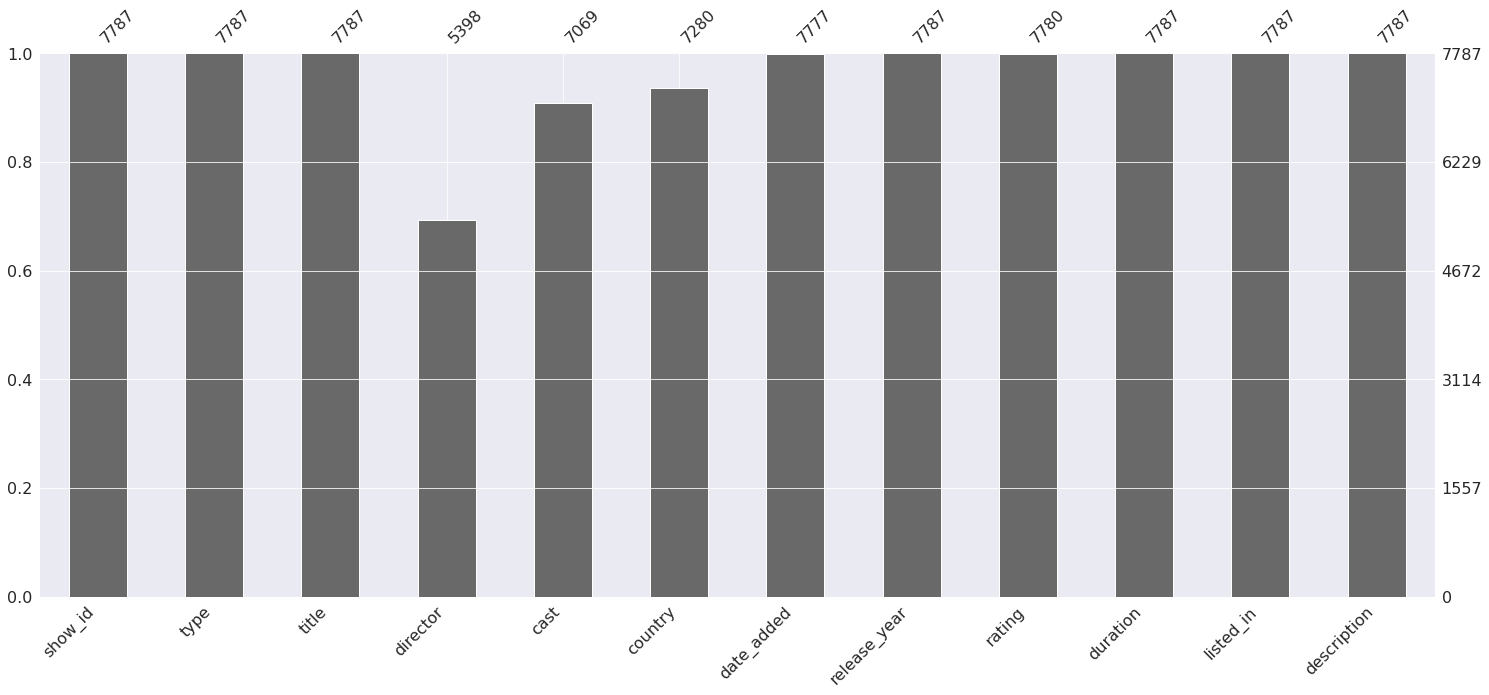

In [678]:
# Visualizing the missing values
msno.bar(Dataset)

### What did you know about your dataset?

1.There are 7787 observations in the dataset and has 12 columns.

2.There are no duplicate values in the dataset.

3.There are 3631 missing values in the dataset, 2389 null values in director column, 718 null values in cast column, 507 null values in country column, 10 in date_added and 7 in rating.

## ***2. Understanding Your Variables***

In [679]:
# Dataset Columns
Dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [680]:
# Dataset Describe
Dataset.describe(include='all')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

### Variables Description 

**show_id** : Unique ID for every Movie / Tv Show

**type** : Identifier - A Movie or TV Show

**title**: Title of the Movie / Tv Show

**director** : Director of the Movie

**cast** : Actors involved in the movie / show

**country**: Country where the movie / show was produced

**date_added** : Date it was added on Netflix

**release_year** : Actual Releaseyear of the movie / show

**rating**: TV Rating of the movie / show

**duration** : Total Duration - in minutes or number of seasons

**listed_in** : Genere

**description**: The Summary description

### Check Unique Values for each variable.

In [681]:
# Check Unique Values for each variable.
Dataset.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [682]:
# Write your code to make your dataset analysis ready.

# Handling Null Values
Dataset['cast'].fillna(value='No cast',inplace=True)
Dataset['country'].fillna(value='Country unavailable',inplace=True)
Dataset['director'].fillna(value='No director',inplace=True)


In [683]:
# 'date_added' and 'rating' contains an insignificant portion of the data so we will drop them from the dataset
Dataset.dropna(subset=['date_added','rating'],inplace=True)

In [684]:
# Again checking is there any null values are not
Dataset.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [685]:
Dataset.shape

(7770, 12)

In [686]:
Dataset['date_added'] = pd.to_datetime(Dataset['date_added'])
Dataset['year_added'] = Dataset['date_added'].dt.year
Dataset.head()

show_id     type  title           director  \
0      s1  TV Show     3%        No director   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year_added  
0  In a future where the elite inhabit an island ...        2020  
1  After a devastating earthquake hits Mexico Cit...        2016  
2  When an army recruit is found dead, his fellow...        2018  
3  In a postapocalyptic world, rag-doll robots hi...        2017  
4  A brilliant group of students become card-coun...        2020

In [687]:
Netflix_tv_shows_df = Dataset[Dataset['type'] == 'TV Show']
Netflix_movies_df = Dataset[Dataset['type'] == 'Movie']

### What all manipulations have you done and insights you found?

Since “director”, “cast” and “country” contain the majority of null values, we chose to treat each missing value is unavailable. The other two label “date_added” and “rating” contain an insignificant portion of the data, so it drops from the dataset. Finally, we can see that there are no more missing values in the data frame.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

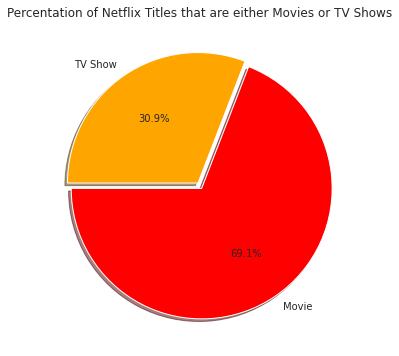

In [688]:
# Chart - 1 visualization code
plt.figure(figsize=(12,6))
plt.title('Percentation of Netflix Titles that are either Movies or TV Shows')
g = plt.pie(Dataset.type.value_counts(),explode=(0.025,0.025), labels=Dataset.type.value_counts().index, colors=['red','orange'], autopct='%1.1f%%', shadow=True, startangle=180)
plt.show()

In [689]:
Dataset['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

##### 1. Why did you pick the specific chart?

To visualize the number of Movies and TV Shows in this dataset to know which one is the majority..

##### 2. What is/are the insight(s) found from the chart?

There are 5372 Movies and 2398 TV Shows, with movies being the majority.

 There are far more Movie titles (69.1%) than TV Shows titles (30.9%) in terms of title.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

 Yes, the gained insights will help creating a positive business impact.

There are not any insights that lead to negative growth.


#### Chart - 2

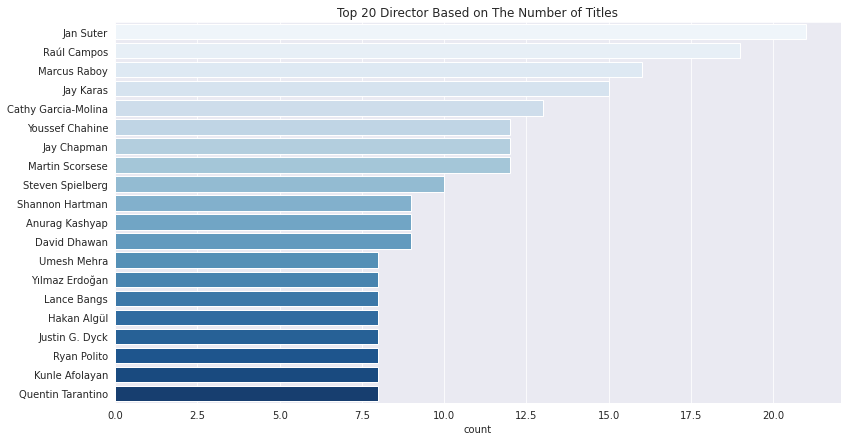

In [690]:
# Chart - 2 visualization code
filtered_directors = Dataset[Dataset.director != 'No director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 20 Director Based on The Number of Titles')
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:20], palette='Blues')
plt.show()

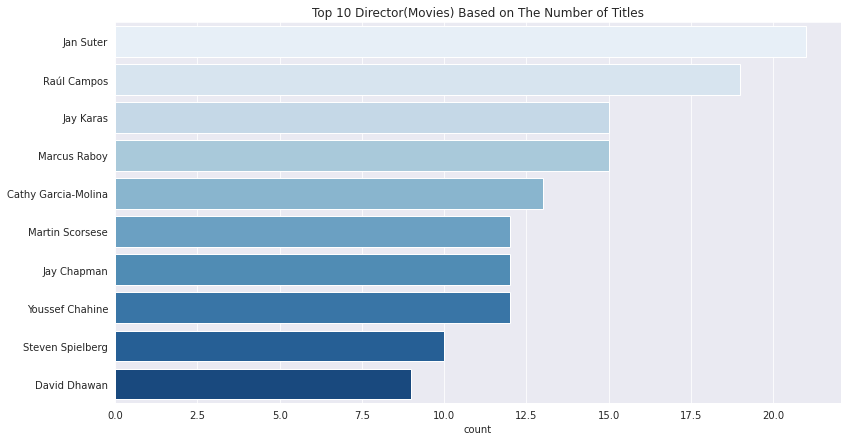

In [691]:
filtered_directors = Netflix_movies_df[Dataset.director != 'No director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Director(Movies) Based on The Number of Titles')
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='Blues')
plt.show()

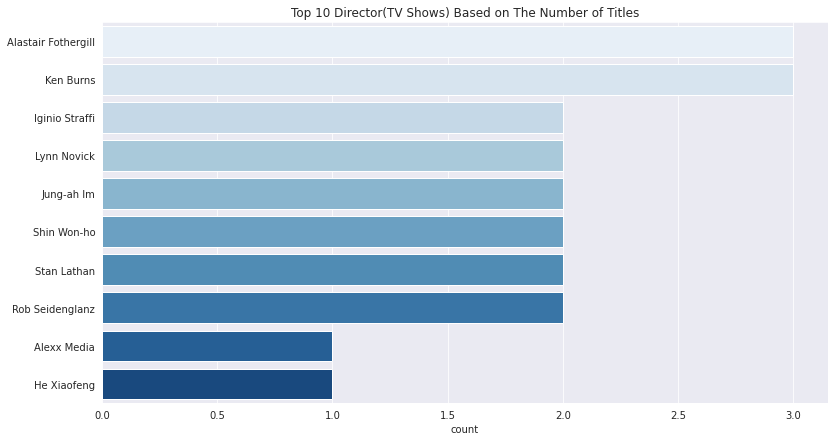

In [692]:
filtered_directors = Netflix_tv_shows_df[Dataset.director != 'No director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Director(TV Shows) Based on The Number of Titles')
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='Blues')
plt.show()

##### 1. Why did you pick the specific chart?

To visualize the most popular directors of movies/tv shows on netflix with their number of movies/tv shows.

##### 2. What is/are the insight(s) found from the chart?

The above bar graph shows top 10 directors based on number of titles.

From the bar graph, we know that Jan Sutar is at the first position, followed by Raul Campos and Marcus Raboy. Hence, Jan Suter is the most popular director on Netflix.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The gained insights will help to creat a positive business impact.


#### Chart - 3

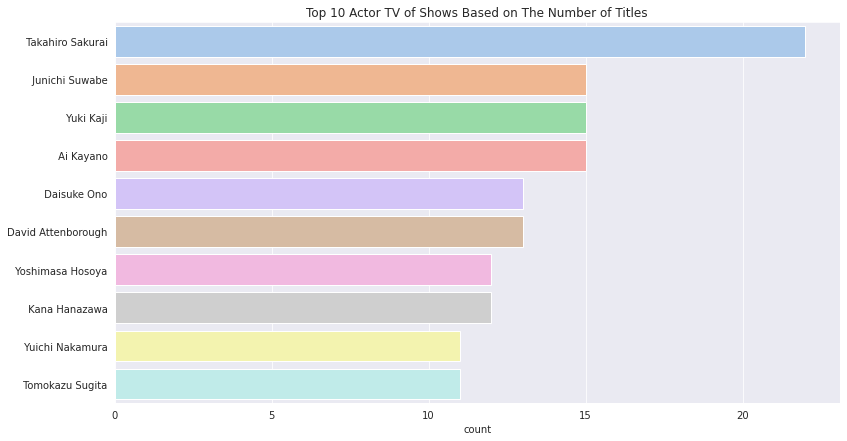

In [693]:
# Chart - 3 visualization code
filtered_cast_shows = Netflix_tv_shows_df[Netflix_tv_shows_df.cast != 'No cast'].set_index('title').cast.str.split(',', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor TV of Shows Based on The Number of Titles')
sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10], palette='pastel')
plt.show()

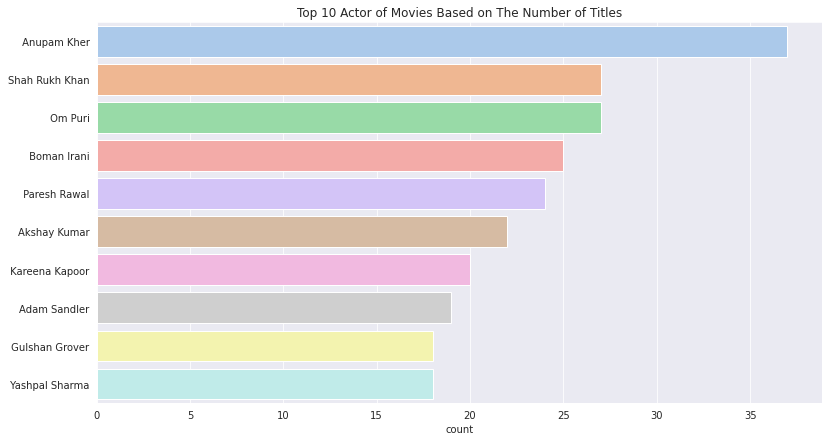

In [694]:
filtered_cast_movies = Netflix_movies_df[Netflix_movies_df.cast != 'No cast'].set_index('title').cast.str.split(',', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor of Movies Based on The Number of Titles')
sns.countplot(y = filtered_cast_movies, order=filtered_cast_movies.value_counts().index[:10], palette='pastel')
plt.show()

##### 1. Why did you pick the specific chart?

To visualize the top actors of tv shows and movies on Netflix.

##### 2. What is/are the insight(s) found from the chart?

* First bar graph shows top 10 actors of TV Shows based on number of titles.

 From the bar graph, we know that Takahiro Sakurai is at the first position, followed by Junichi Suwabe and Yuki Kaji. So, Takahiro Sakurai is the top actor of TV Shows on Netflix.
* Second bar graph shows top 10 actors of Movies based on number of titles.

 From the bar graph, we know that Anupam Kher is at the first position, followed by Shah Rukh Khan and Om Puri.So, Anupam Kher is the top actor of Movies on Netflix.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

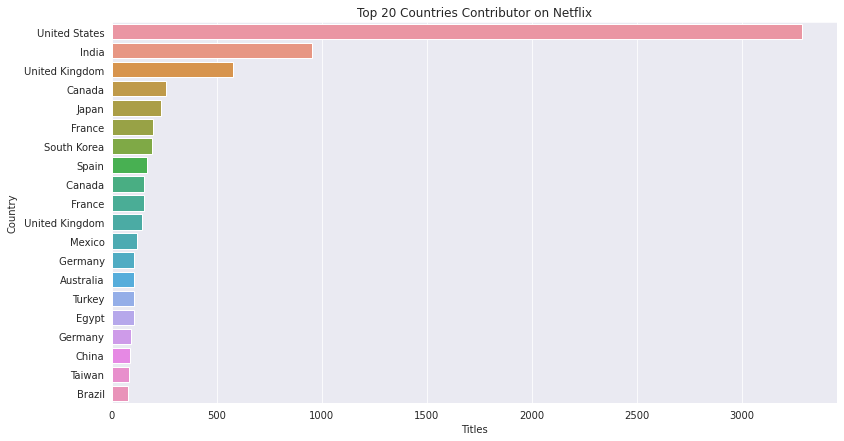

In [695]:
# Chart - 4 visualization code
filtered_countries = Dataset.set_index('title').country.str.split(',', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries.replace({' United States':'United States'}, inplace=True)
filtered_countries = filtered_countries[filtered_countries != 'Country unavailable']
plt.figure(figsize=(13,7))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:20])
plt.title('Top 20 Countries Contributor on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

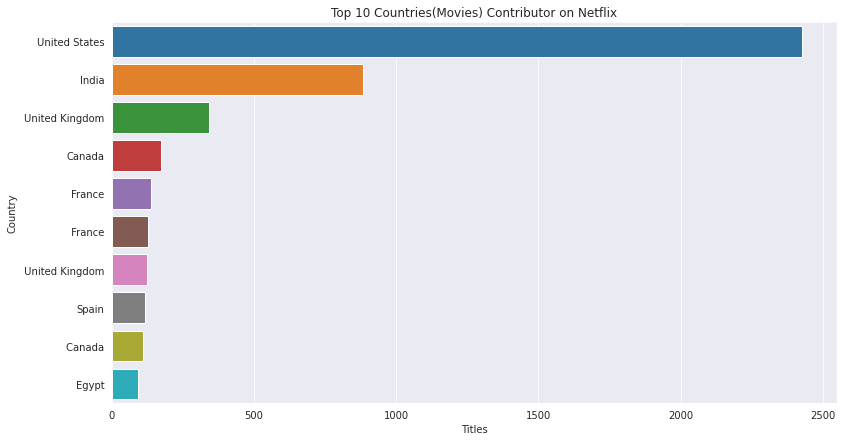

In [696]:
filtered_countries = Netflix_movies_df.set_index('title').country.str.split(',', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries.replace({' United States':'United States'}, inplace=True)
filtered_countries = filtered_countries[filtered_countries != 'Country unavailable']
plt.figure(figsize=(13,7))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:10])
plt.title('Top 10 Countries(Movies) Contributor on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

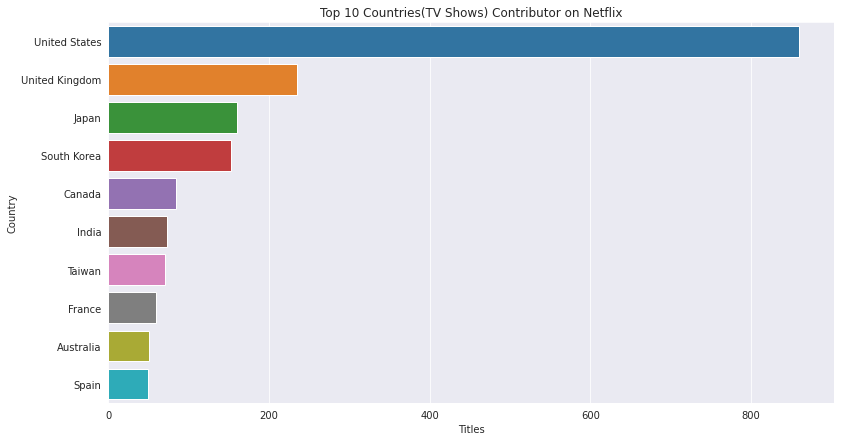

In [697]:
filtered_countries = Netflix_tv_shows_df.set_index('title').country.str.split(',', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries.replace({' United States':'United States'}, inplace=True)
filtered_countries = filtered_countries[filtered_countries != 'Country unavailable']
plt.figure(figsize=(13,7))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:10])
plt.title('Top 10 Countries(TV Shows) Contributor on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

##### 1. Why did you pick the specific chart?

 To visualize the countries by the amount of the produces content of Netflix.

##### 2. What is/are the insight(s) found from the chart?

The above bar graph shows the top 15 countries with most contents.

From the bar graph, we know that United States is at the first position, followed by India and United Kingdom. we can say, the country by the amount of the produces content is the United States.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

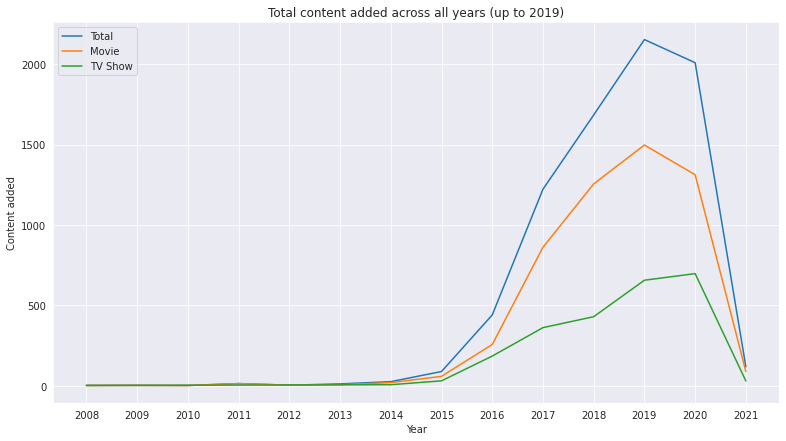

In [698]:
# Chart - 5 visualization code
fig, ax = plt.subplots(figsize=(13, 7))
sns.lineplot(x=Dataset.year_added.value_counts().index, y=Dataset.year_added.value_counts().values)
sns.lineplot(x=Netflix_movies_df.year_added.value_counts().index, y=Netflix_movies_df.year_added.value_counts().values)
sns.lineplot(x=Netflix_tv_shows_df.year_added.value_counts().index, y=Netflix_tv_shows_df.year_added.value_counts().values)
ax.set_xticks(np.arange(2008, 2022, 1))
plt.title('Total content added across all years (up to 2019)')
plt.legend(['Total','Movie','TV Show'])
plt.ylabel('Content added')
plt.xlabel('Year')
plt.show()

##### 1. Why did you pick the specific chart?

To visiaulize the content, which added across all the years(up to 2019).

##### 2. What is/are the insight(s) found from the chart?

From the  above line graph we conclude that
* Growth in the number of movies on Netflix is much higher than tv shows.
* From 2013 we can see a noticeable addition in the number of movies and tv shows uploaded by Netflix on its platform.
* The highest number of movies and tv shows got added in 2018 and 2019.
* The line plot shows very few movies and tv shows got added in 2021. It is due to very little data collected from the year 2021.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

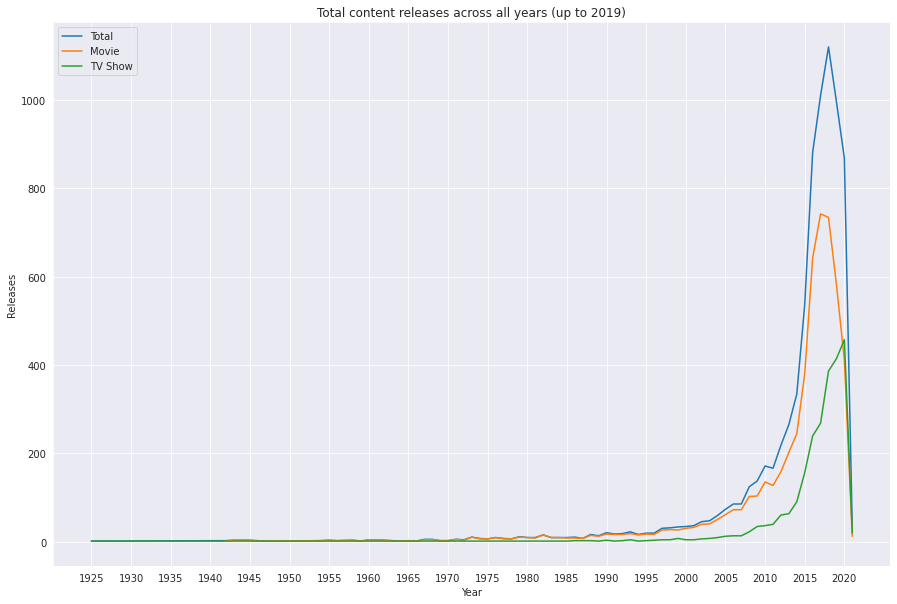

In [699]:
# Chart - 6 visualization code
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(x=Dataset.release_year.value_counts().index, y=Dataset.release_year.value_counts().values)
sns.lineplot(x=Netflix_movies_df.release_year.value_counts().index, y=Netflix_movies_df.release_year.value_counts().values)
sns.lineplot(x=Netflix_tv_shows_df.release_year.value_counts().index, y=Netflix_tv_shows_df.release_year.value_counts().values)
ax.set_xticks(np.arange(1925, 2021, 5))
plt.title('Total content releases across all years (up to 2019)')
plt.legend(['Total','Movie','TV Show'])
plt.ylabel('Releases')
plt.xlabel('Year')
plt.show()

##### 1. Why did you pick the specific chart?

To visiaulize the content, which released across all the years(up to 2019).

##### 2. What is/are the insight(s) found from the chart?

From the above line graph we conclude that
 *  The number of release have significantly increased after 2015 and have dropped 
in 2021 because of Covid 19.
 *  Growth in the number of released movies on Netflix is much higher than tv shows across all years.
 * The highest number of movies and tv shows got released in 2019 and 2020.
 * Before 2010 the production growth for Movies & Tv Shows were very less.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

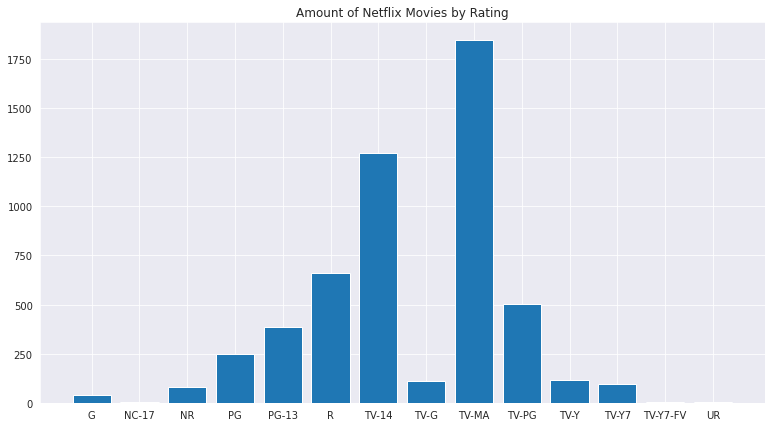

In [700]:
# Chart - 7 visualization code
order = Dataset.rating.unique()
count_movies = Netflix_movies_df.groupby('rating')['title'].count().reset_index()
count_shows = Netflix_tv_shows_df.groupby('rating')['title'].count().reset_index()
count_shows = count_shows.append([{"rating" : "NC-17", "title" : 0},{"rating" : "G", "title" : 0},{"rating" : "PG", "title" : 0},{"rating" : "PG-13", "title" : 0},{"rating" : "UR", "title" : 0}], ignore_index=True)
plt.figure(figsize=(13,7))
plt.title('Amount of Netflix Movies by Rating')
plt.bar(count_movies.rating, count_movies.title)
plt.show()

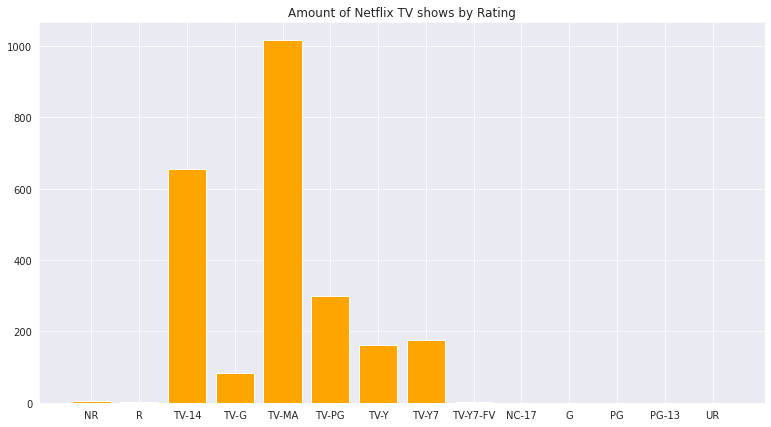

In [701]:
plt.figure(figsize=(13,7))
plt.title('Amount of Netflix TV shows by Rating')
plt.bar(count_shows.rating, count_shows.title, color=['orange'])
plt.show()

In [702]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

Dataset['rating'].replace(rating_map, inplace = True)
Dataset['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

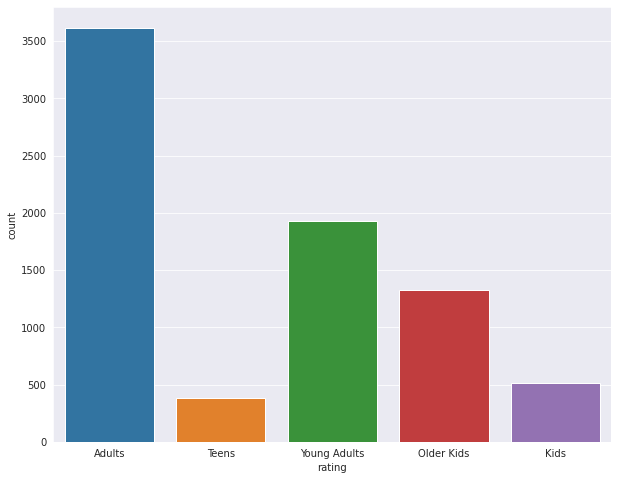

In [703]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,8))
sns.countplot(x='rating',data=Dataset)

##### 1. Why did you pick the specific chart?

To visualize the amount of Netflix Movies/TV Shows based on their rating.

##### 2. What is/are the insight(s) found from the chart?

* First bar graph shows the count of Netflix Movies by rating,whereas the second bar graph shows the count of Netflix TV Shows by rating.

* Highest number of Movies on Netflix rated as ''TV-MA'' followed by ''TV-14'' and ''R''.

* Highest number of TV Shows on Netflix rated as ''TV-MA'' followed by ''TV-14'' and TV-PG.

* The largest count of Netflix content is made with a ''TV-14'' rating. ''TV-14'' contains material that parents or adult guardians may find unsuitable for children under the age of 14.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The ratings can be changed to age restrictions that apply on certain movies and TV shows.

#### Chart - 8

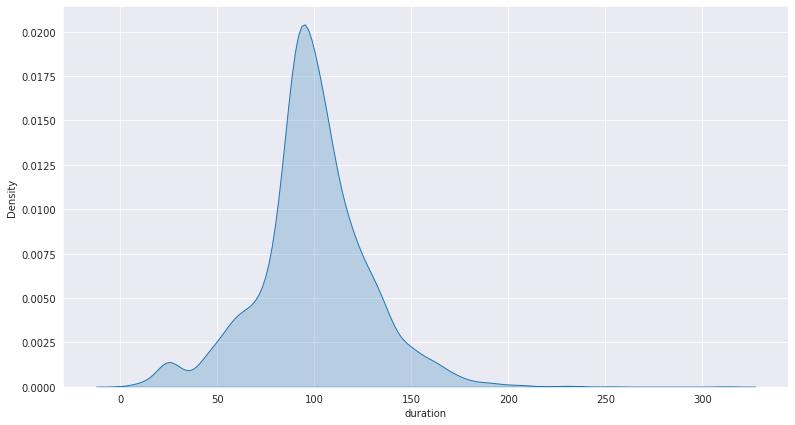

In [704]:
# Chart - 8 visualization code
Netflix_movies_df['duration']=Netflix_movies_df['duration'].str.replace(' min','')
Netflix_movies_df['duration']=Netflix_movies_df['duration'].astype(str).astype(int)
plt.figure(figsize=(13,7))
sns.kdeplot(data=Netflix_movies_df['duration'], shade=True)

In [705]:
# Movie statistics
Netflix_movies_df.duration.describe()

count    5372.000000
mean       99.330417
std        28.524206
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

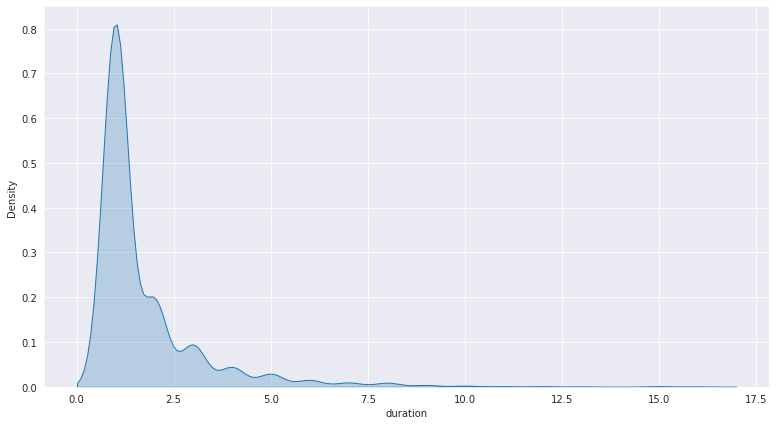

In [706]:
Netflix_tv_shows_df['duration']=Netflix_tv_shows_df['duration'].str.replace(' Season','')
Netflix_tv_shows_df['duration']=Netflix_tv_shows_df['duration'].str.replace(' Seasons','')
Netflix_tv_shows_df['duration']=Netflix_tv_shows_df['duration'].str.replace('s','')
Netflix_tv_shows_df['duration']=Netflix_tv_shows_df['duration'].astype(str).astype(int)
plt.figure(figsize=(13,7))
sns.kdeplot(data=Netflix_tv_shows_df['duration'], shade=True)

In [707]:
# TV Shows statistics
Netflix_tv_shows_df.duration.describe()

count    2398.000000
mean        1.761468
std         1.561099
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        16.000000
Name: duration, dtype: float64

##### 1. Why did you pick the specific chart?

To visualize the distribution of Movies/TV Shows by duration on Netflix.


##### 2. What is/are the insight(s) found from the chart?

First distribution plot shows the distribution of Movies by duration.
* Most of the Movies are about 70 to 120 min duration.
* There are very few Movies that have more than 160 min duration.

Secon distribution plot shows the distribution of TV shows by seassons.
* The TV Shows in the dataset have up to 16 seasons, however the bulk of them only have one session. This might mean that the majority of TV shows has only recently begun, and that further seasons are on the way.
* There are very few TV shows that have more than 8 seasons.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

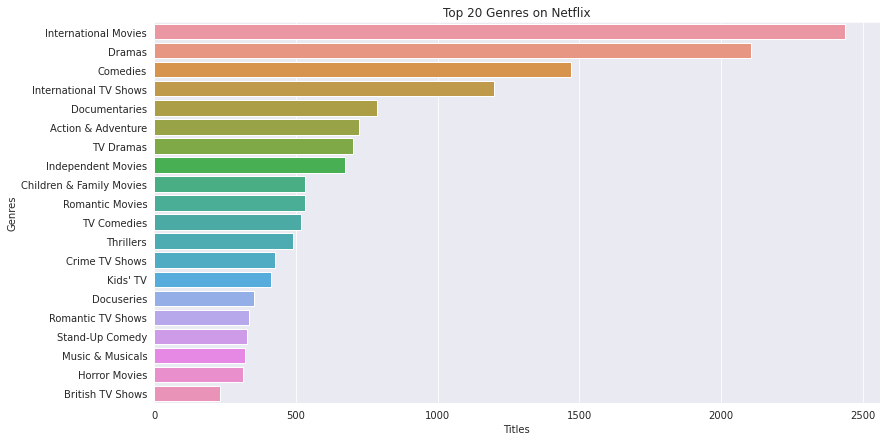

In [708]:
# Chart - 9 visualization code
filtered_genres = Dataset.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(13,7))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

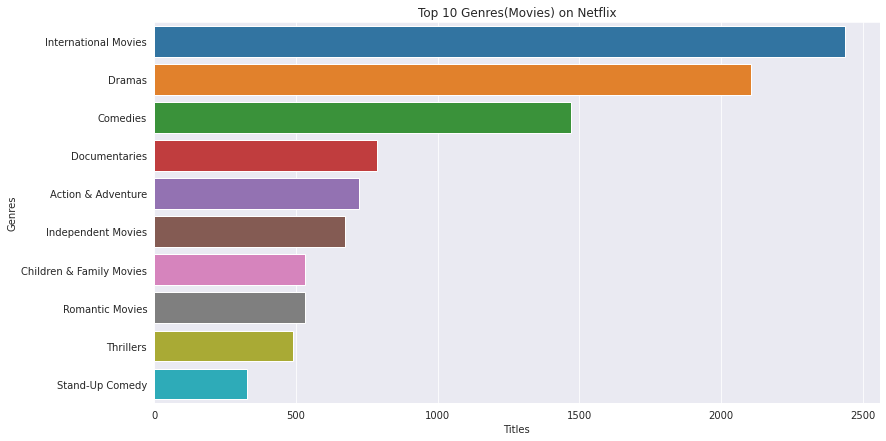

In [709]:
filtered_genres = Netflix_movies_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(13,7))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:10])
plt.title('Top 10 Genres(Movies) on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

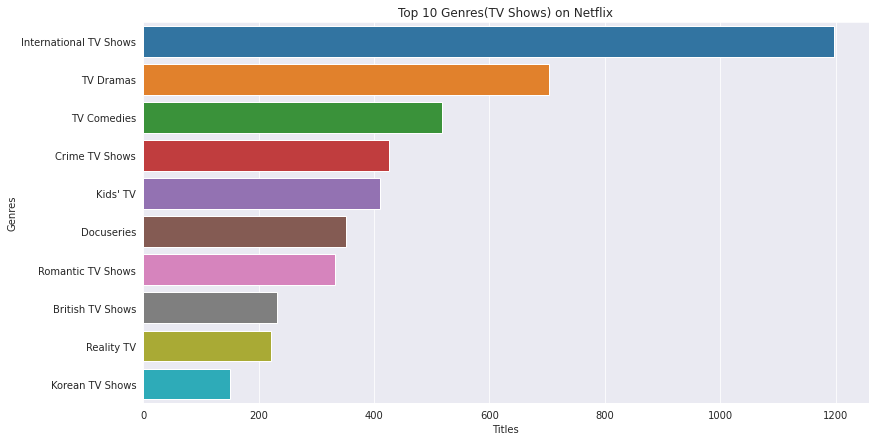

In [710]:
filtered_genres = Netflix_tv_shows_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(13,7))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:10])
plt.title('Top 10 Genres(TV Shows) on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

##### 1. Why did you pick the specific chart?

To visualize the top 20 Generes on Netflix.

##### 2. What is/are the insight(s) found from the chart?

From the above graph, we know that International Movies takes the first place, followed by Dramas and Comedies.So, we can say International Movies is most popular genere on Netflix. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [711]:
# Chart - 10 visualization code

#getting country wise genre trend
def get_genre_country_trends(df):
  def explode_country(country):
    try:
        return country.split(", ")
    except:
        return ""
  df['country_list'] = df.apply(lambda x: explode_country(x['country']),axis=1)
  df = df.explode('country_list')
  df['genre_list'] = df.apply(lambda x: explode_country(x['listed_in']),axis=1)
  df = df.explode('genre_list')
  df.groupby(['country_list','genre_list']).agg({'title':'count'})
  grouped_df_ = df.groupby(['country_list','genre_list']).agg({'title':'count'})
  grouped_df = grouped_df_.reset_index()
  grouped_df['country_list'].values
  grouped_df = grouped_df[grouped_df.country_list != '']
  genre_country_df = grouped_df.reset_index().drop("index", axis=1)
  list_of_countries = list(set(list(genre_country_df['country_list'].values)))
  for each in list_of_countries:
    genre_country_df[genre_country_df['country_list'] == each].sort_values("title",ascending=False).plot.bar(x = "genre_list", y="title", color="skyblue", rot=90, figsize=(9,5))
    plt.title(f"{each}")

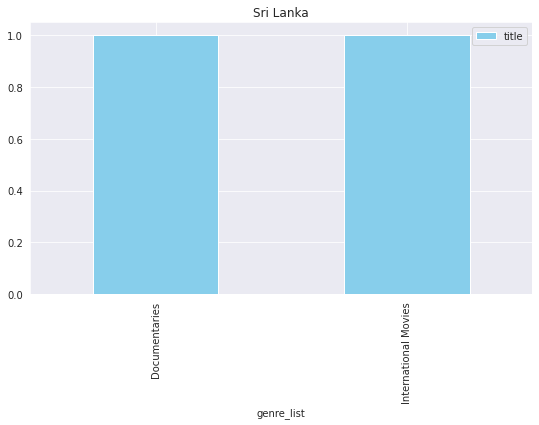

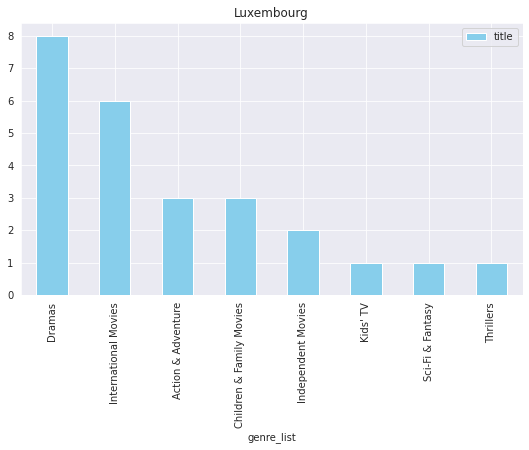

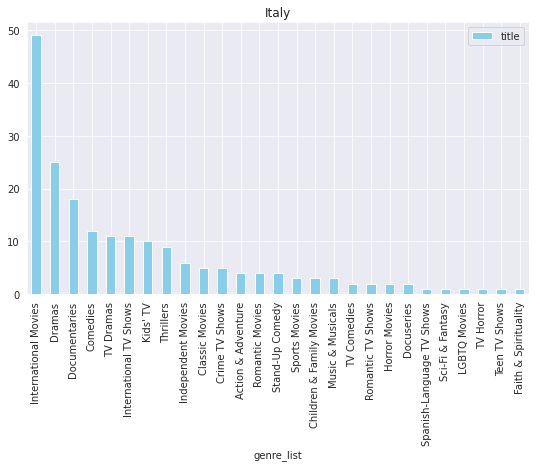

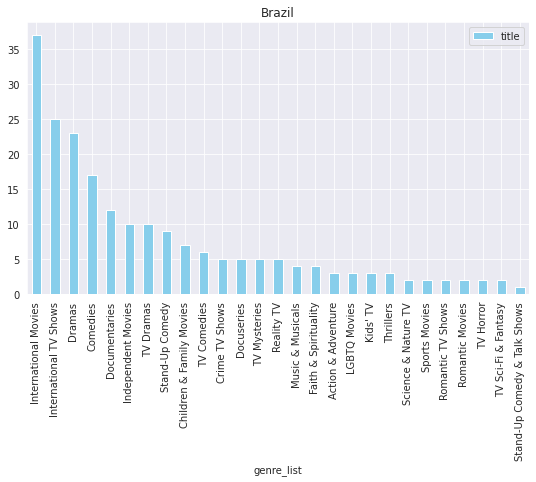

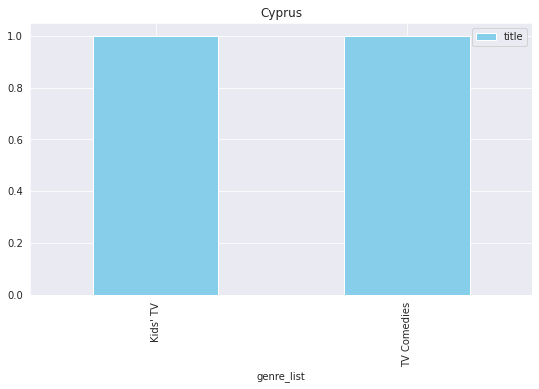

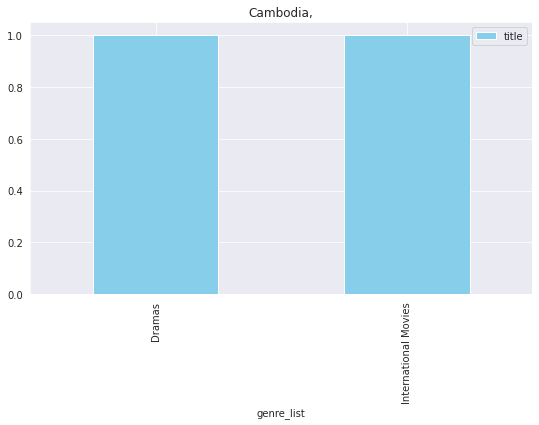

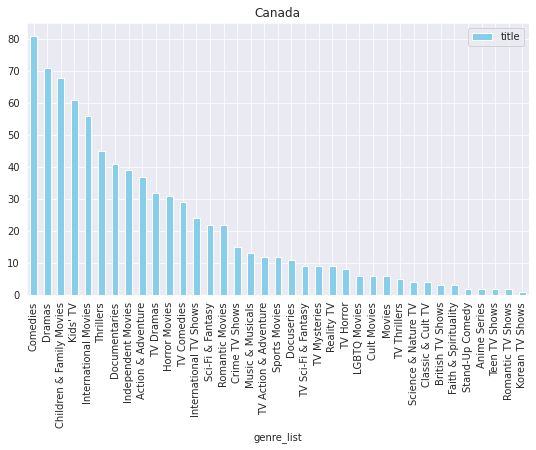

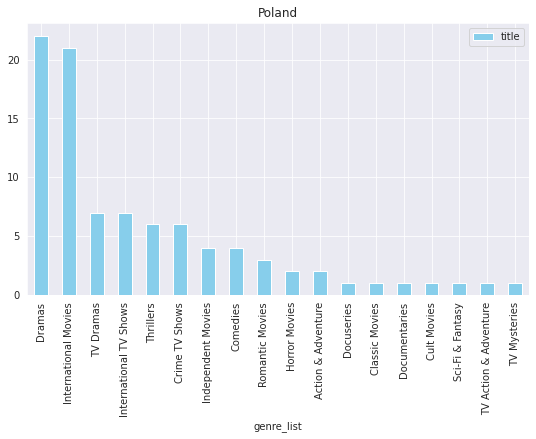

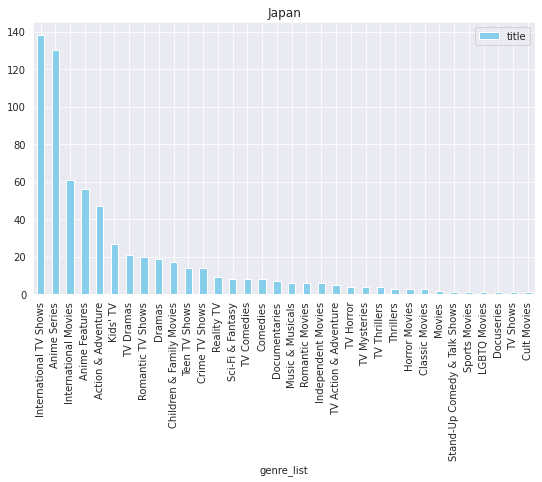

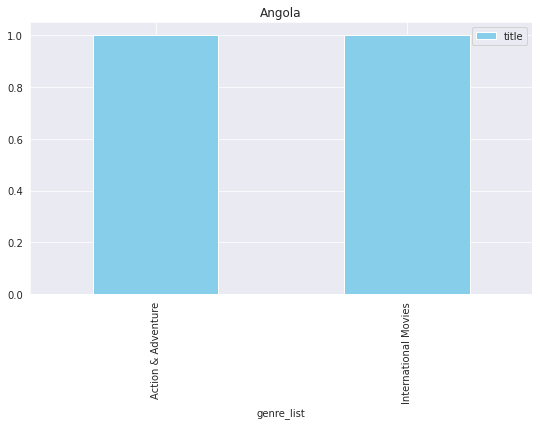

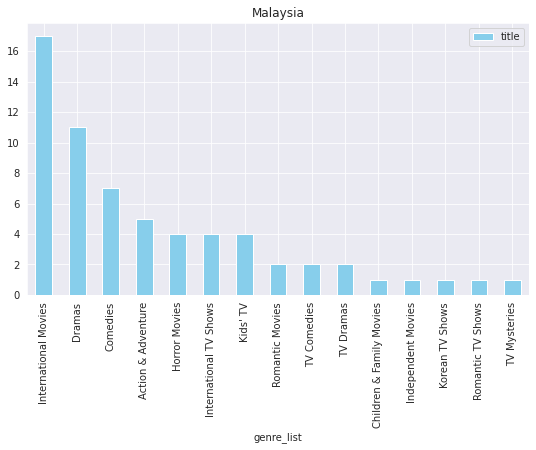

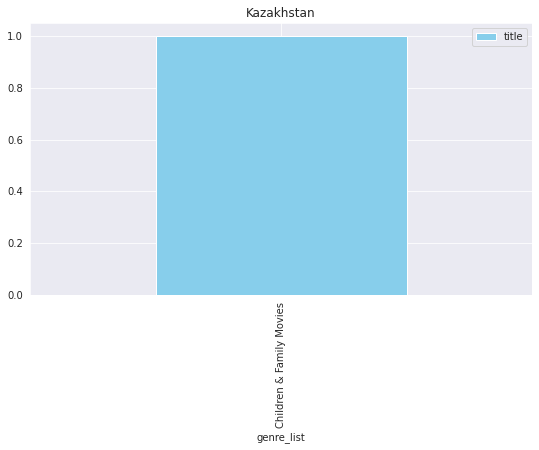

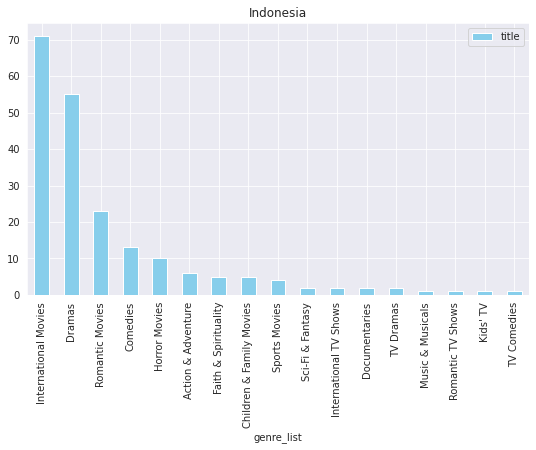

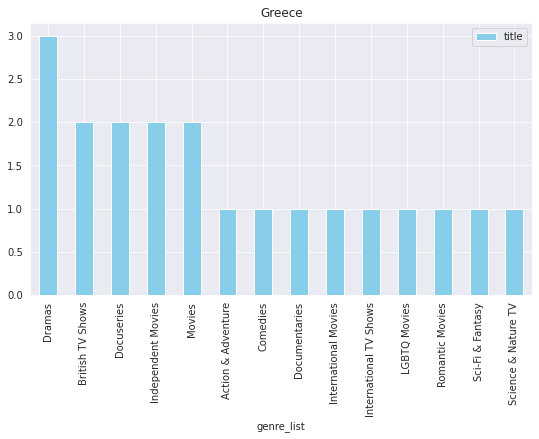

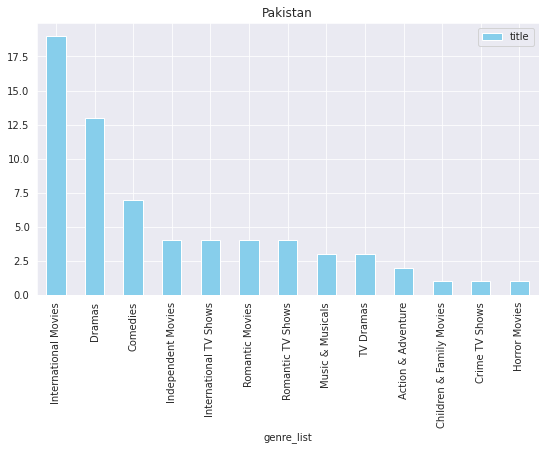

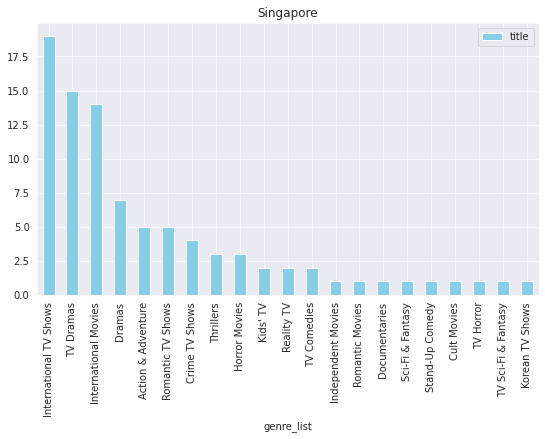

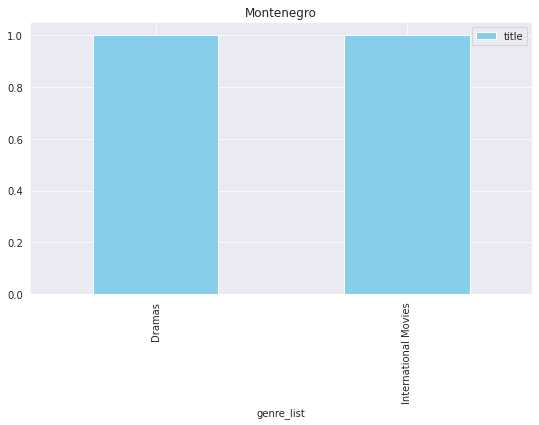

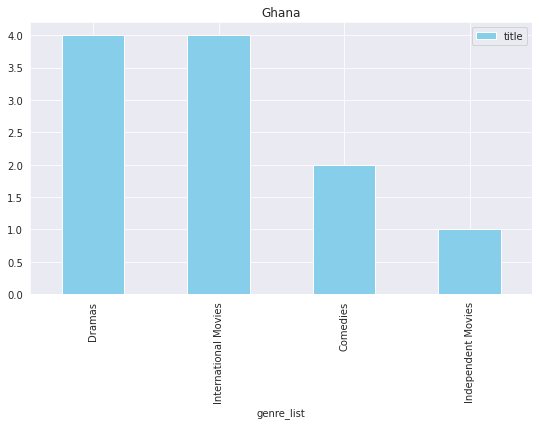

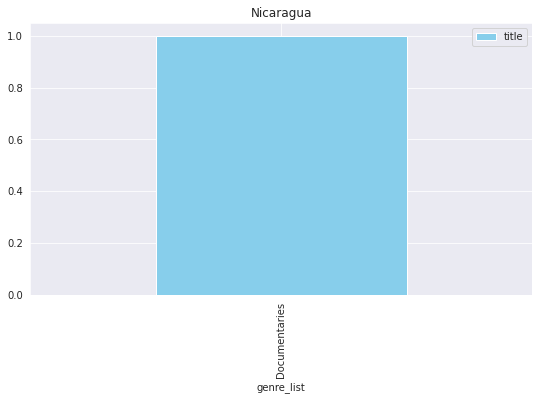

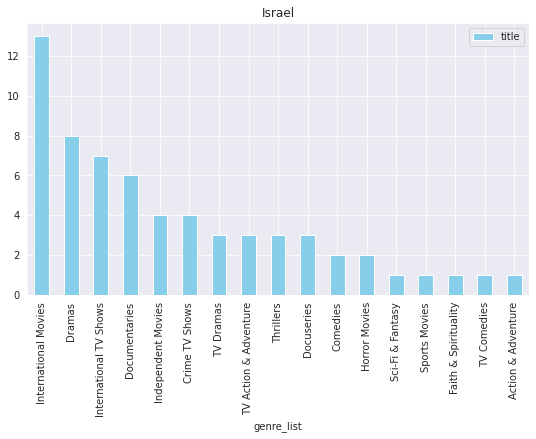

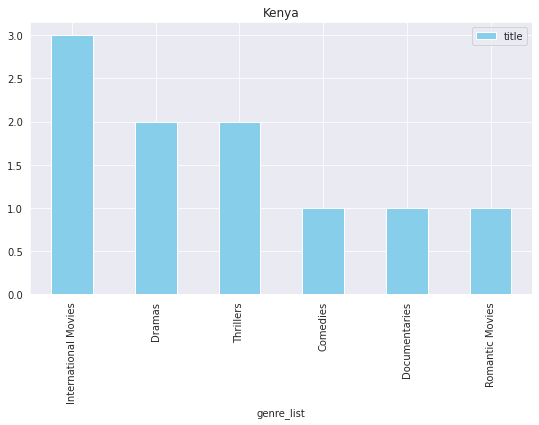

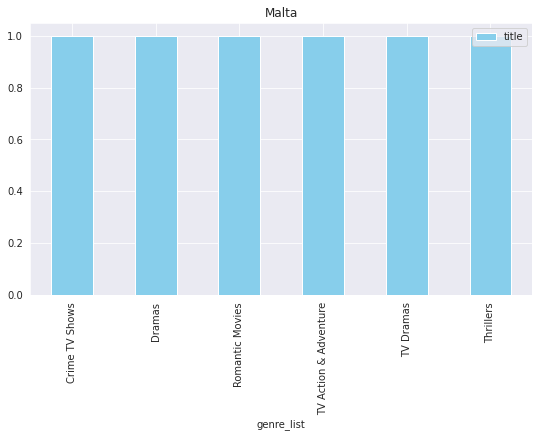

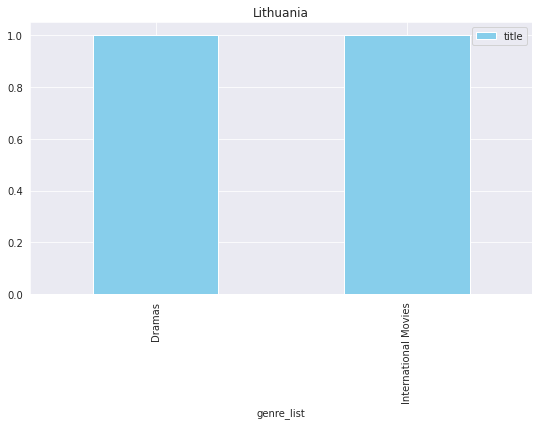

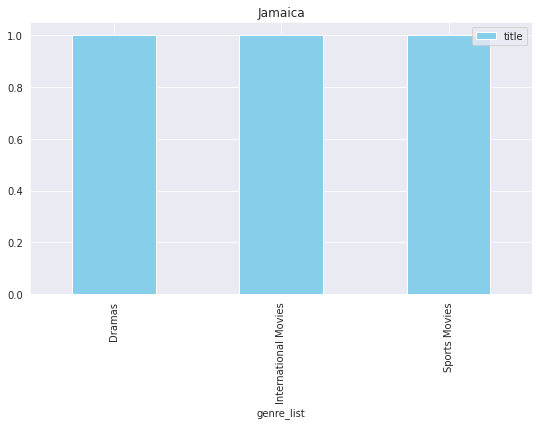

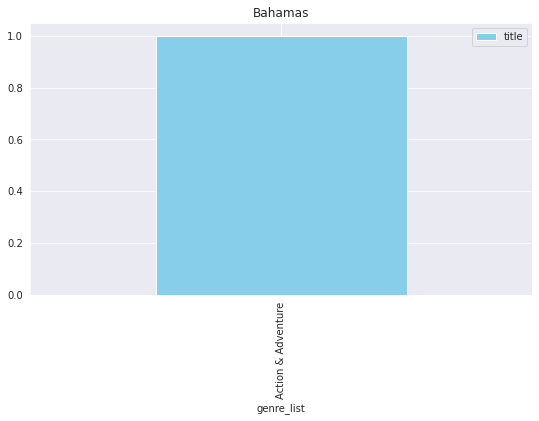

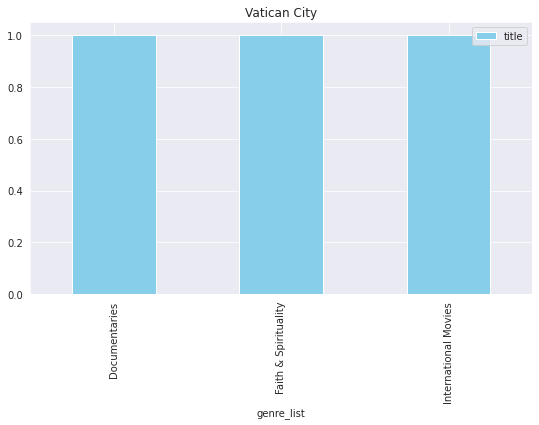

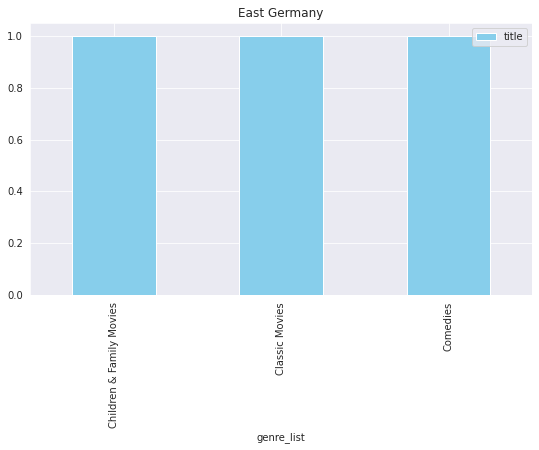

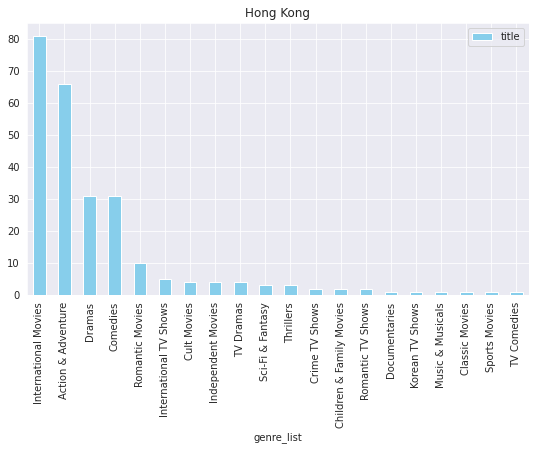

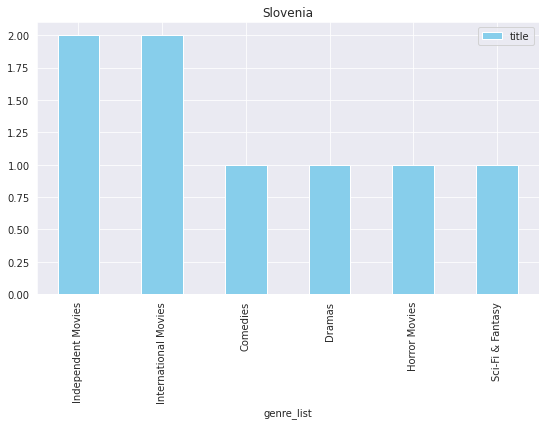

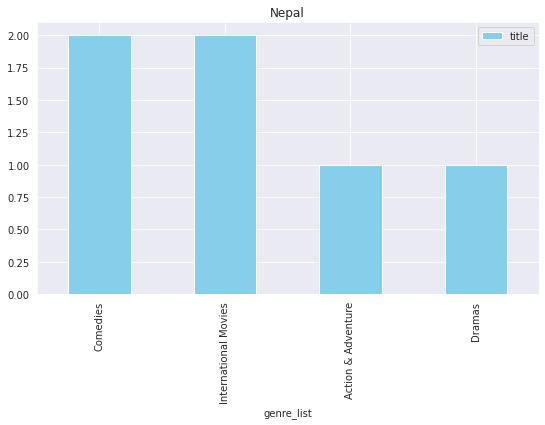

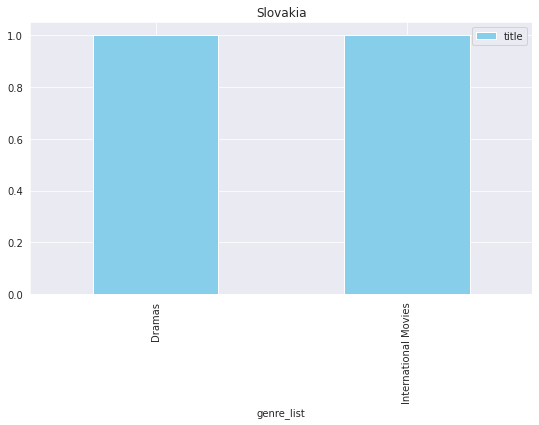

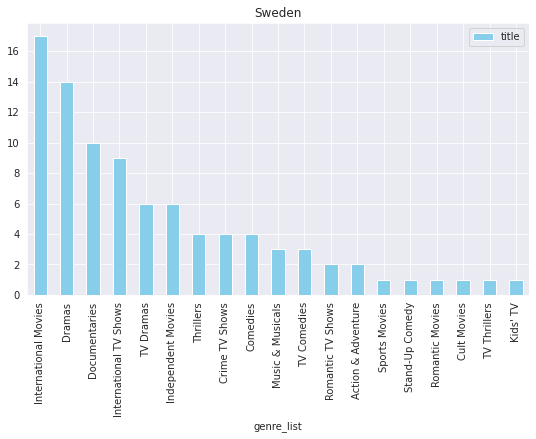

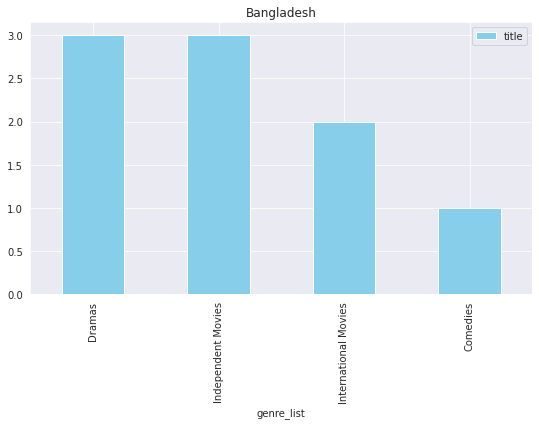

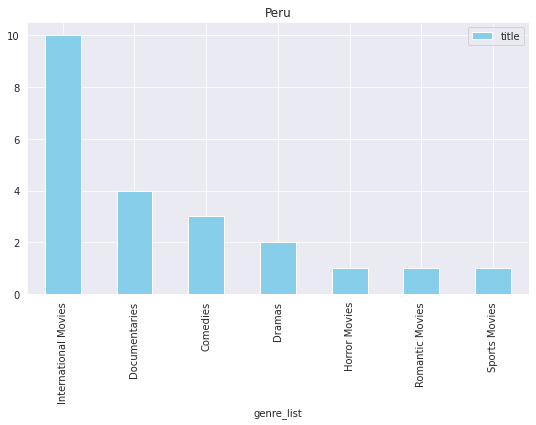

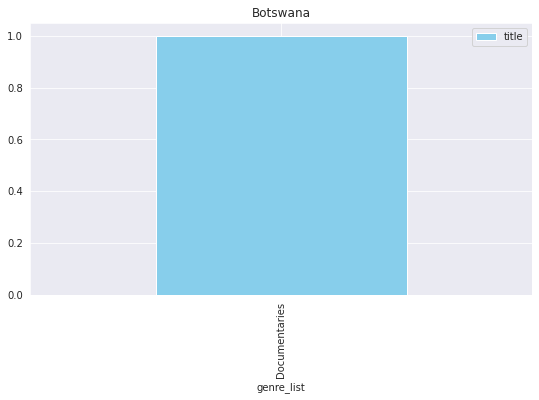

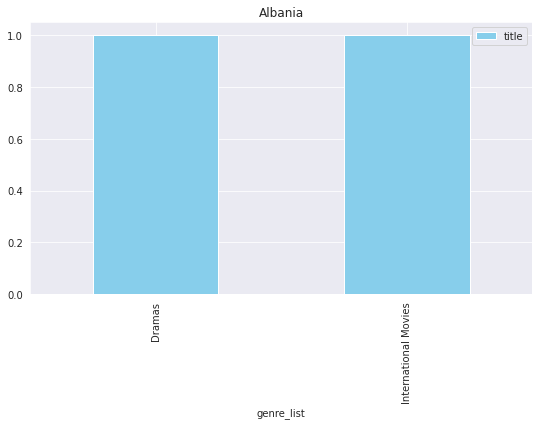

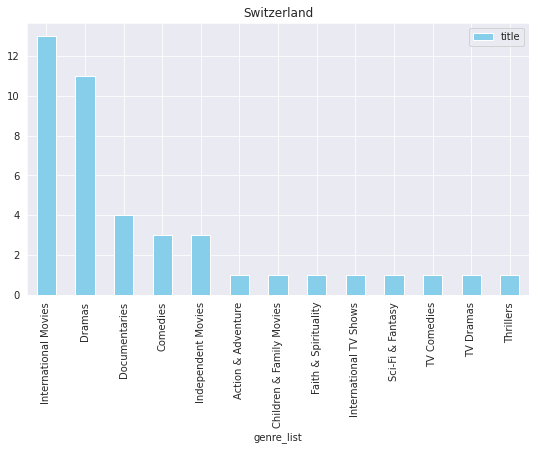

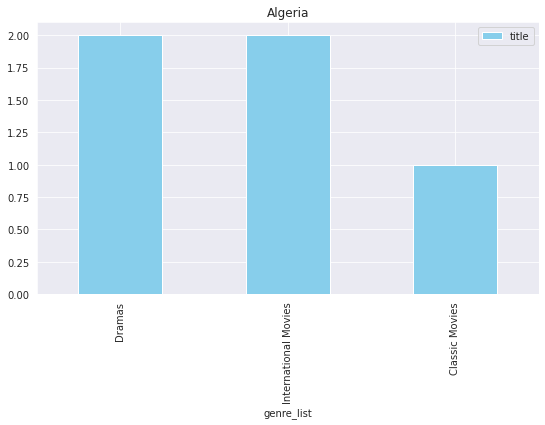

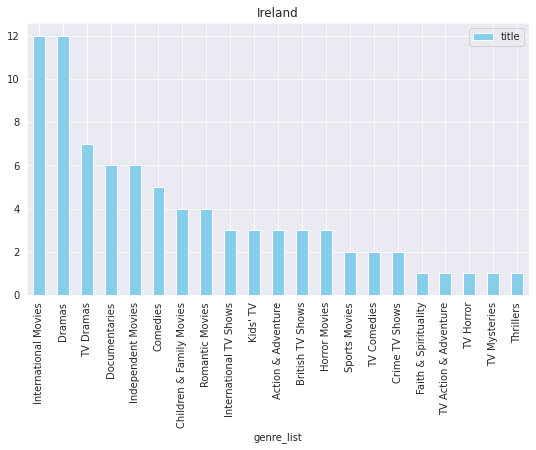

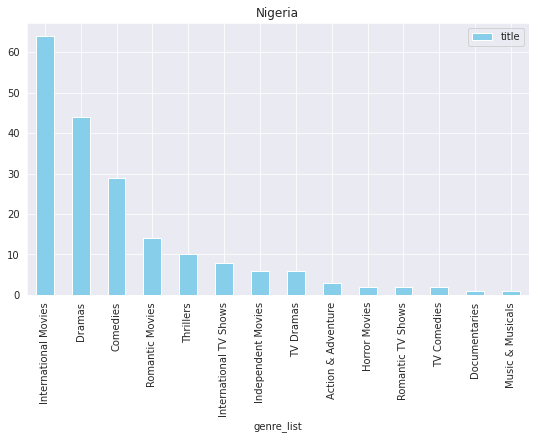

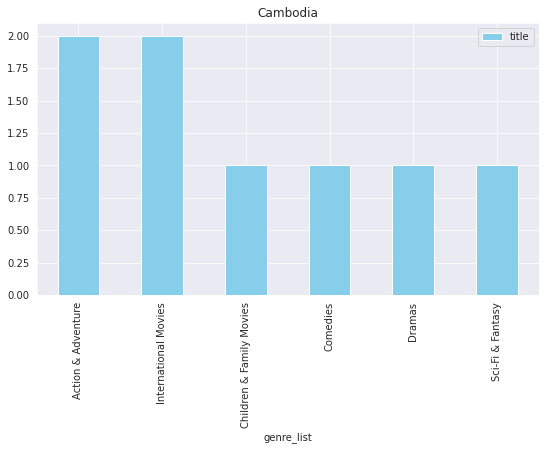

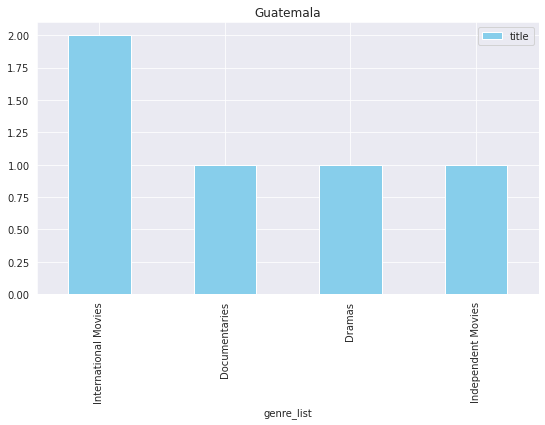

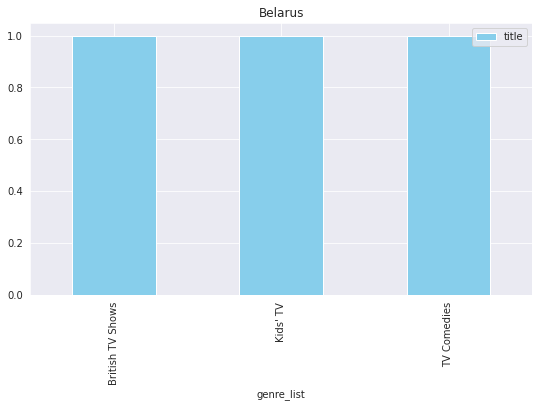

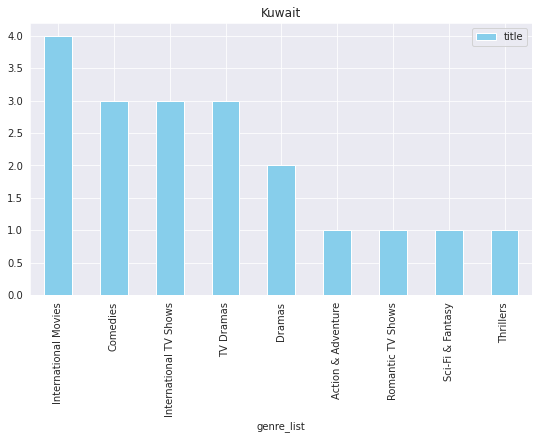

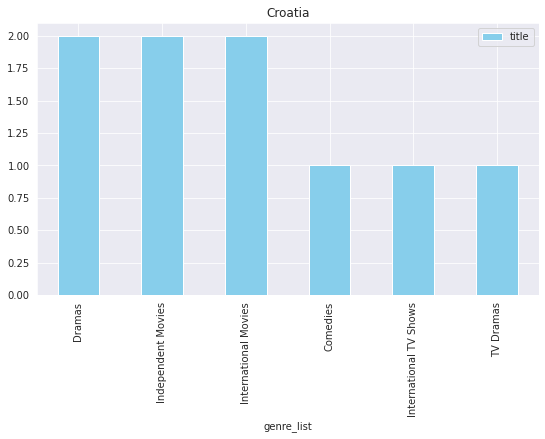

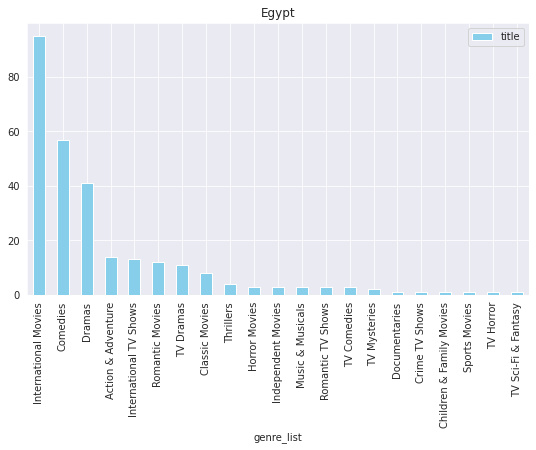

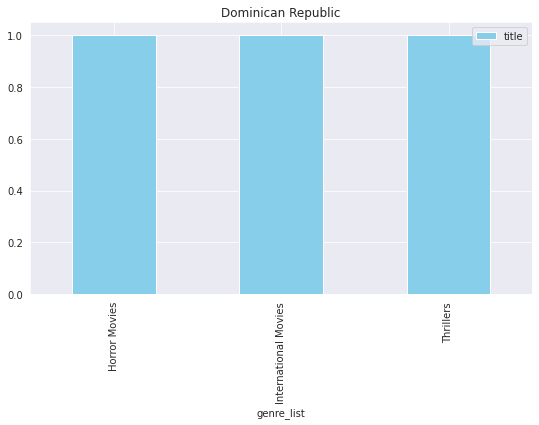

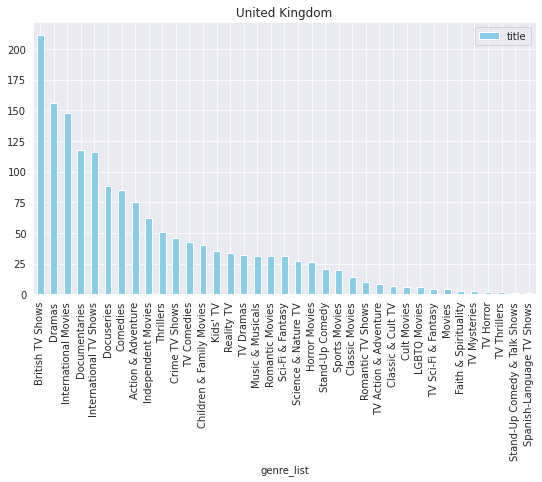

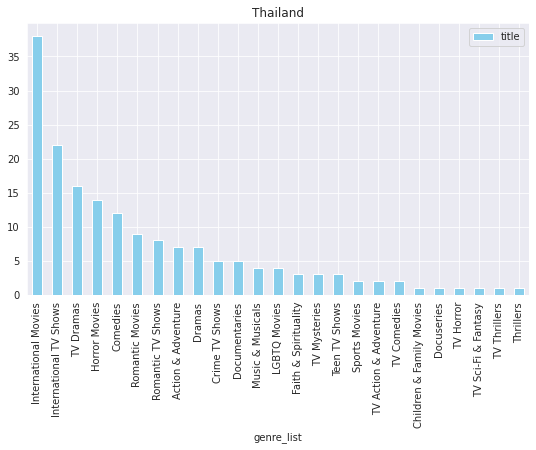

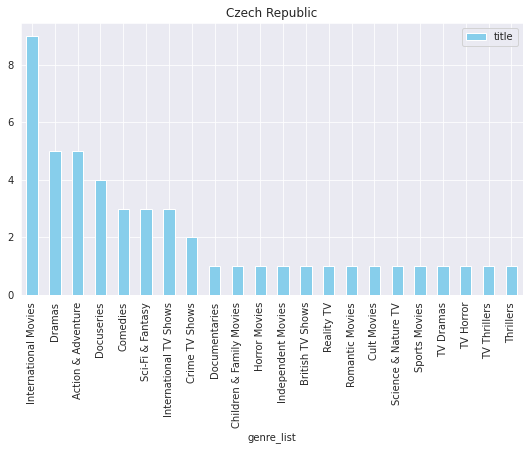

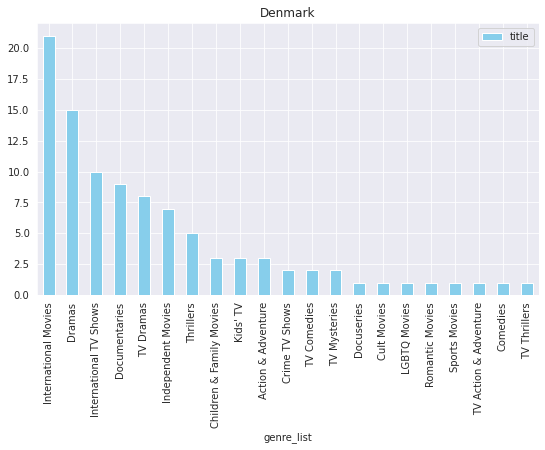

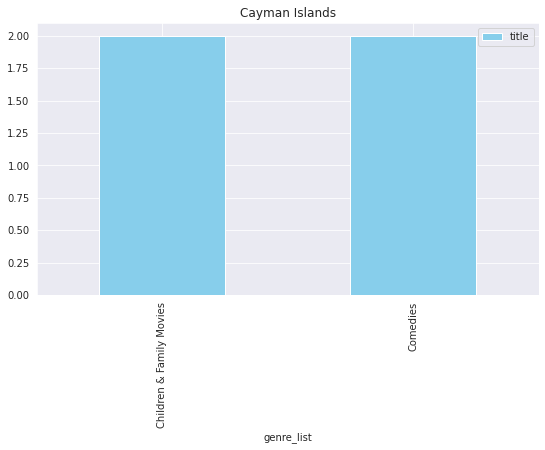

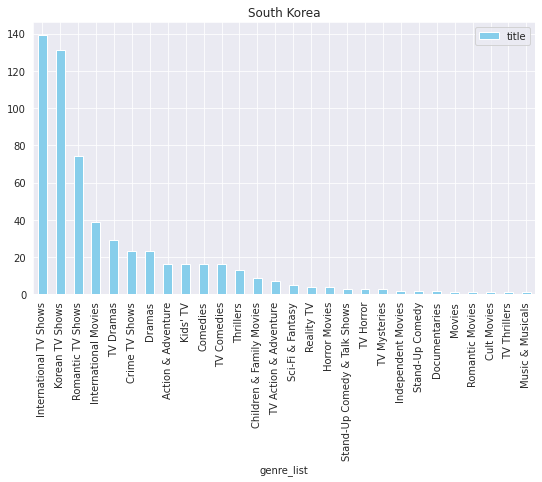

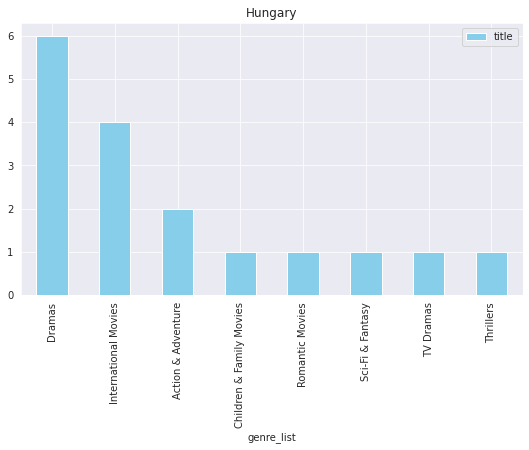

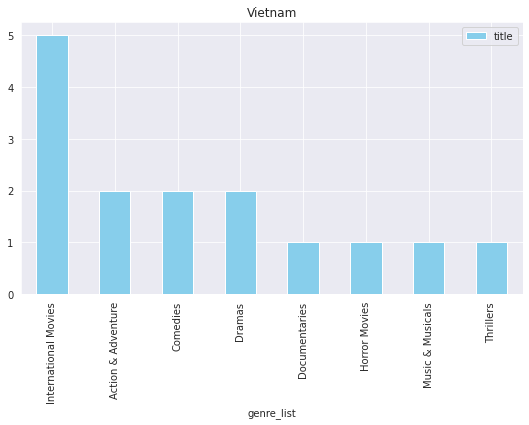

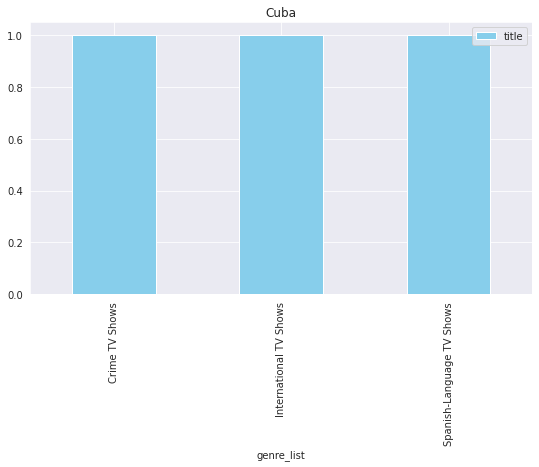

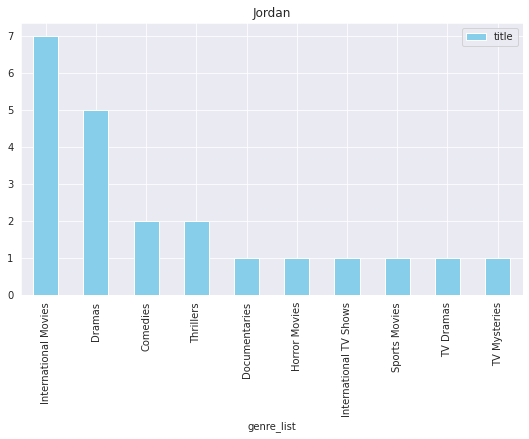

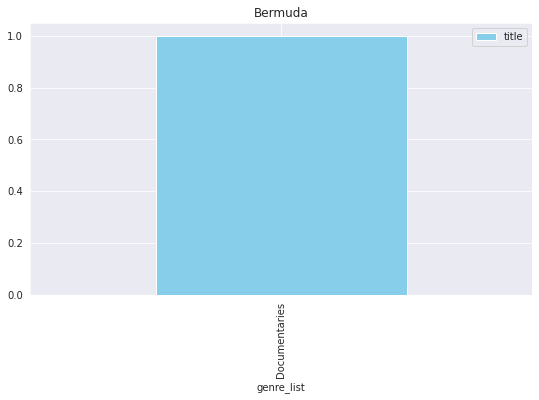

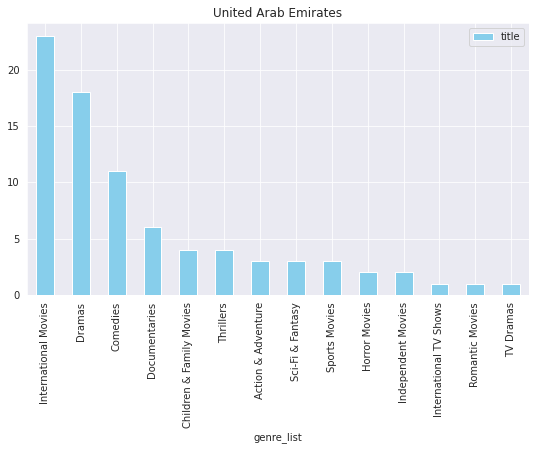

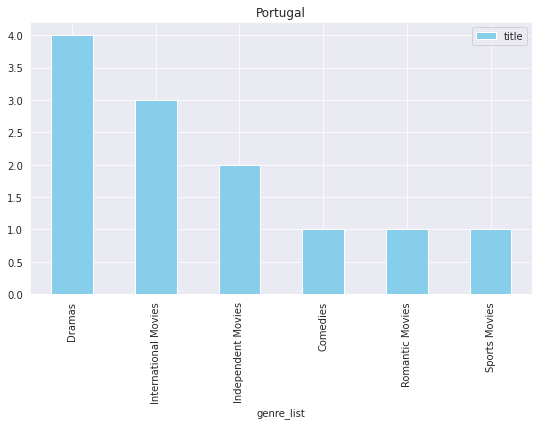

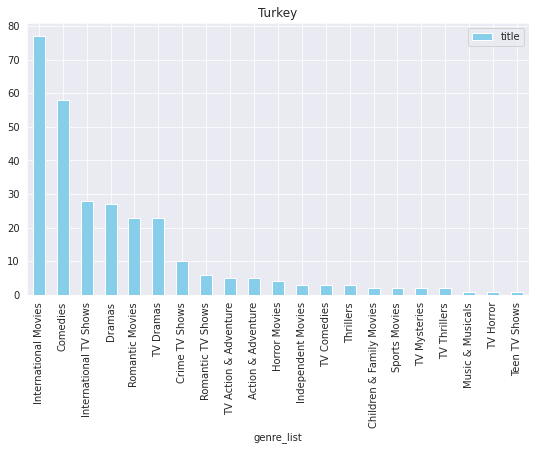

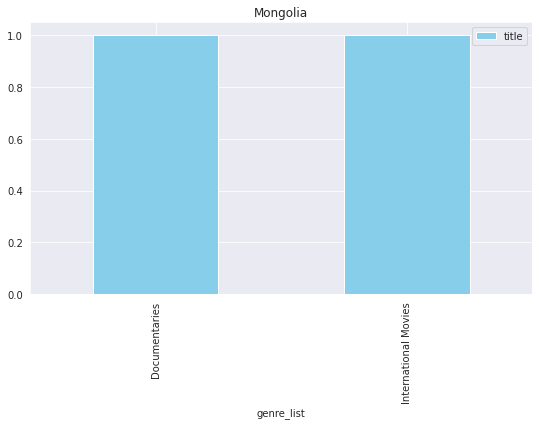

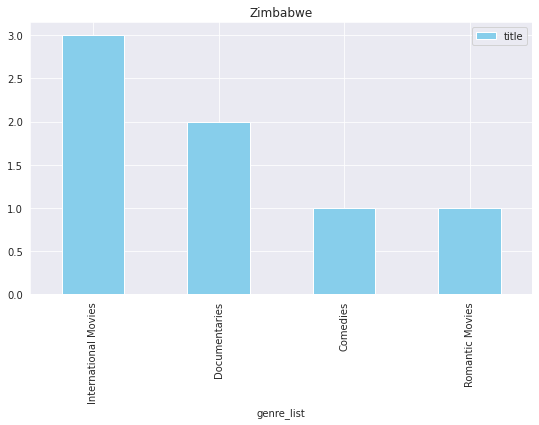

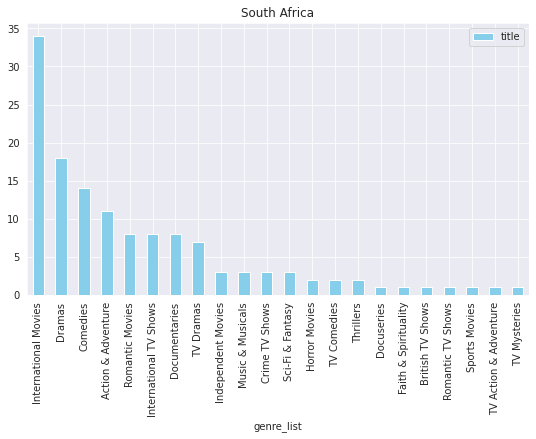

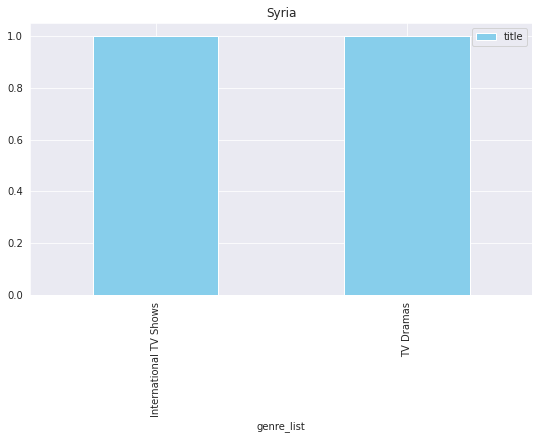

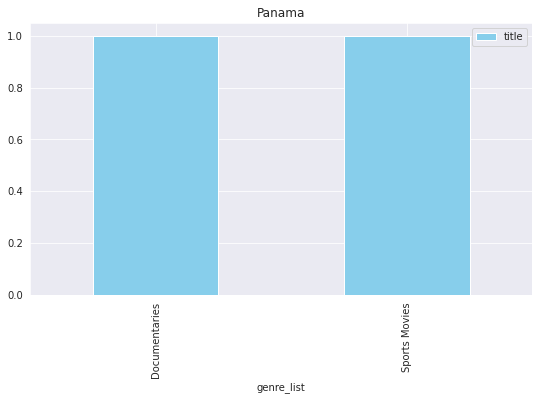

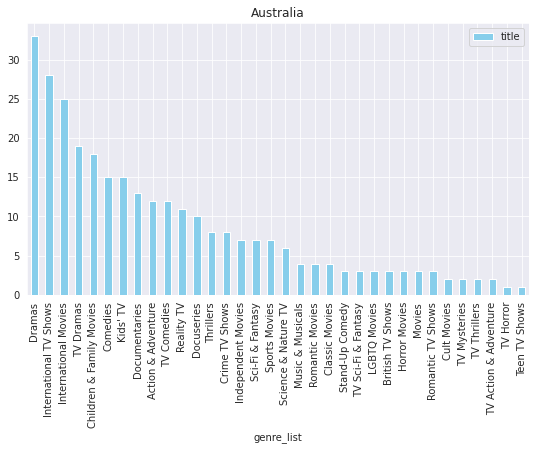

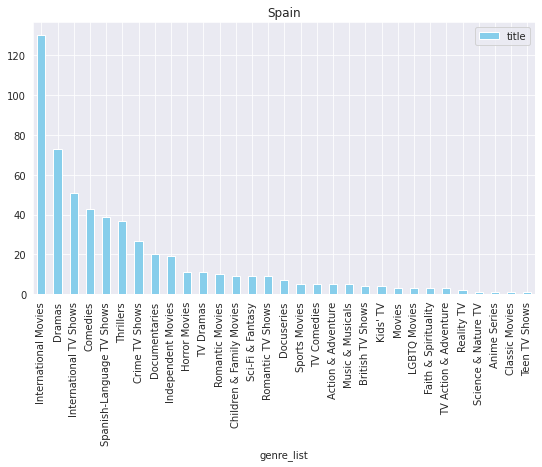

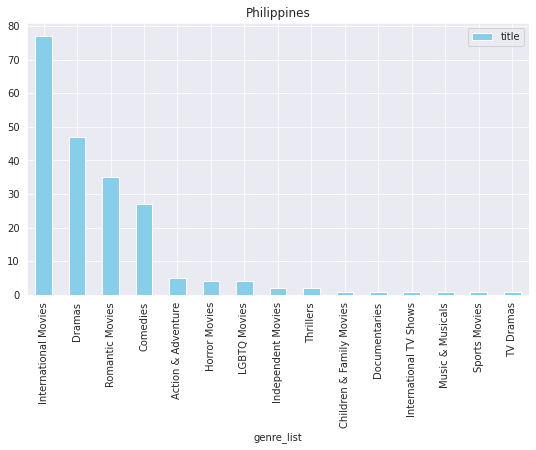

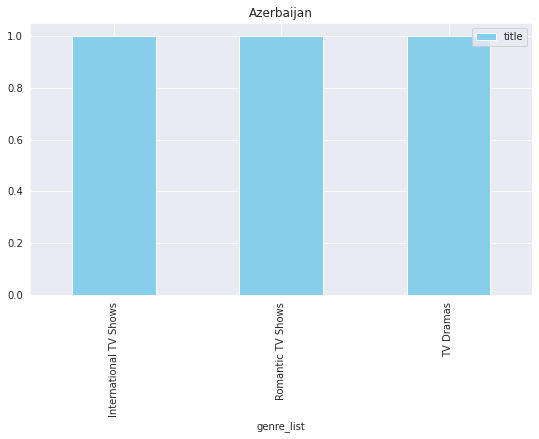

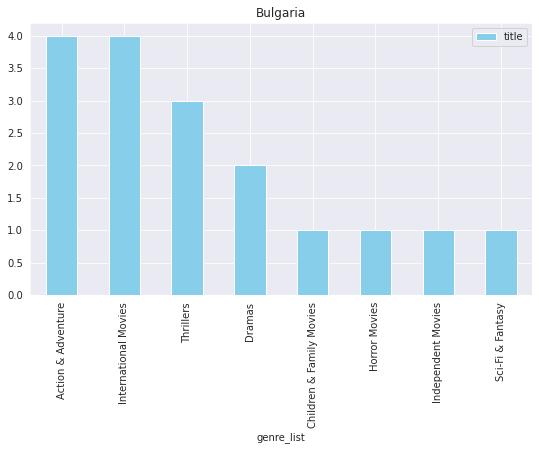

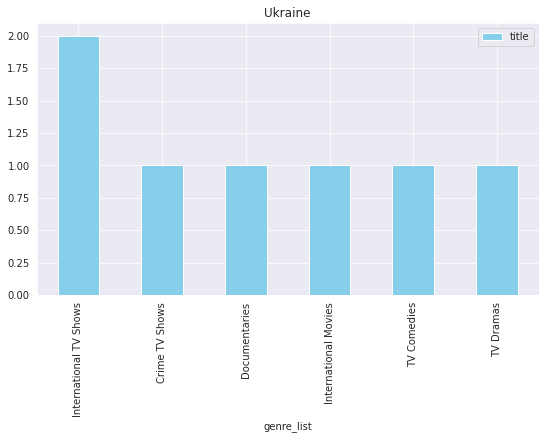

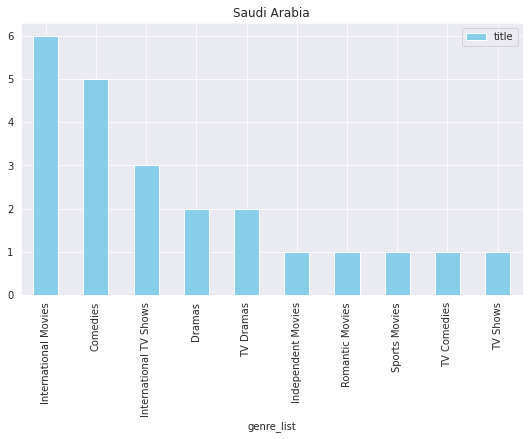

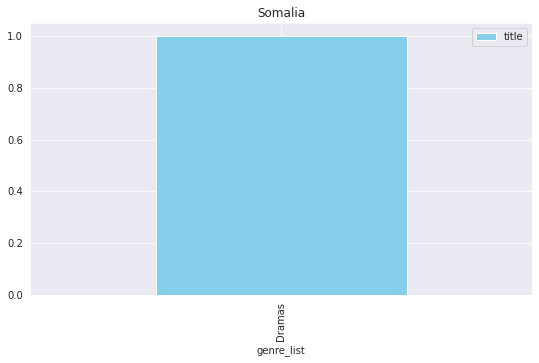

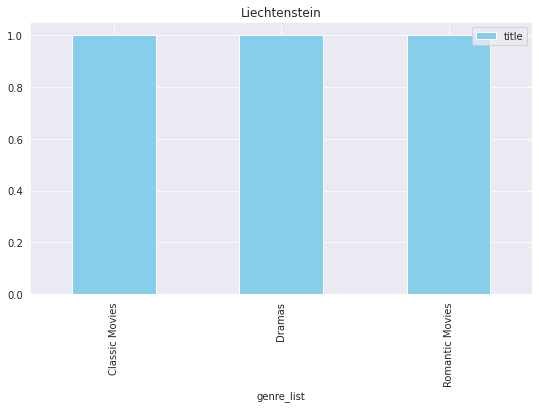

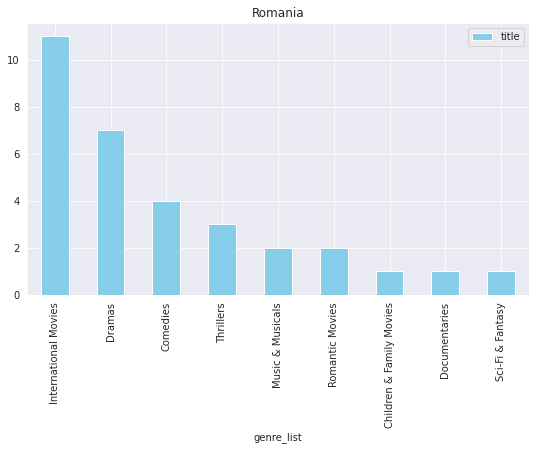

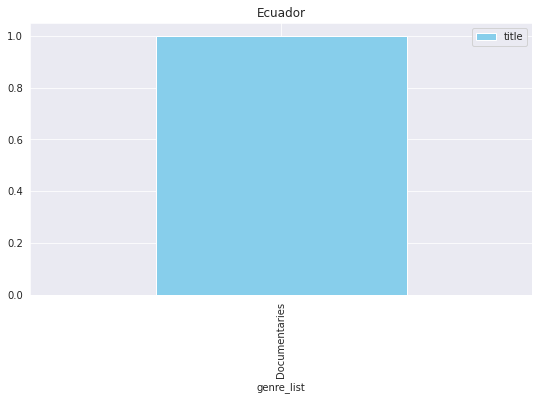

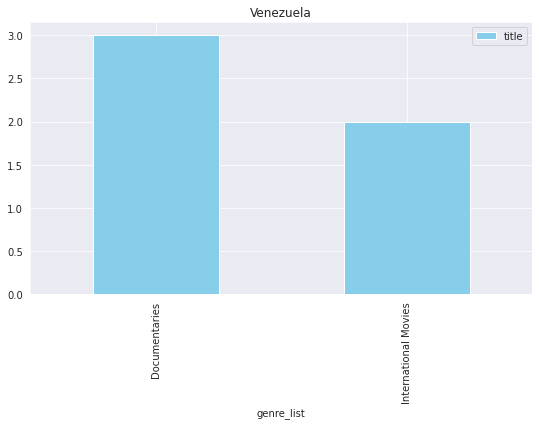

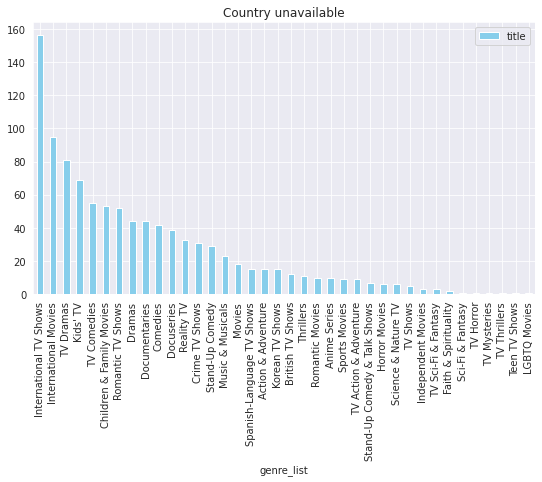

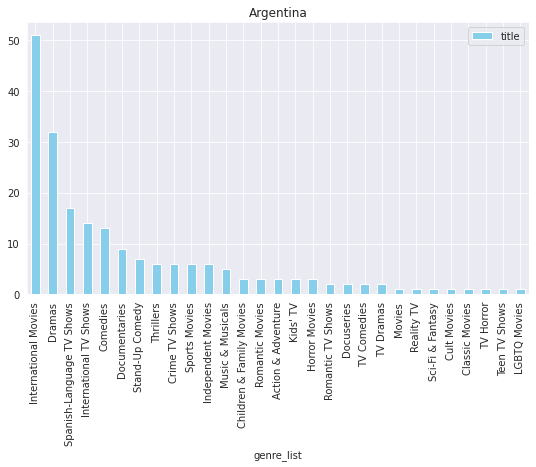

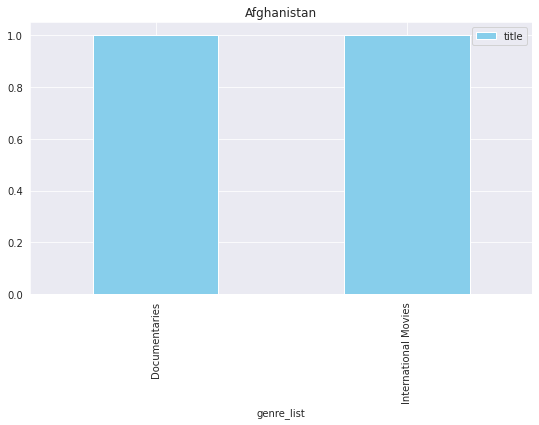

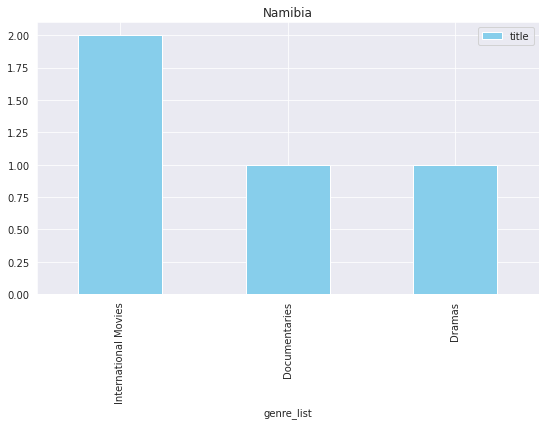

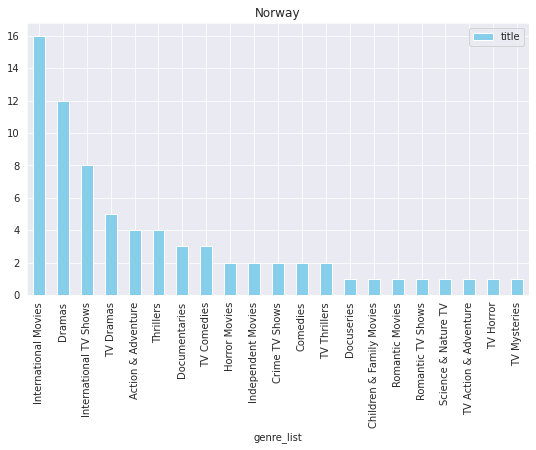

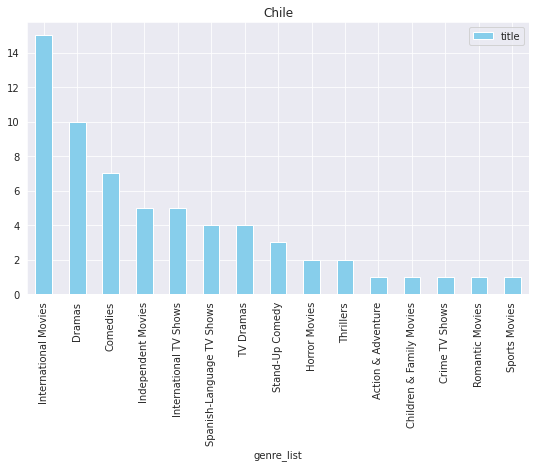

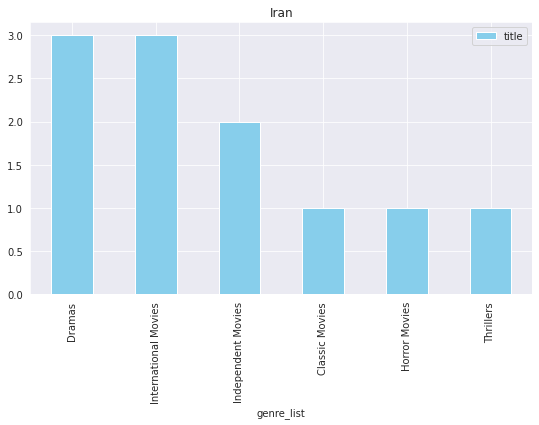

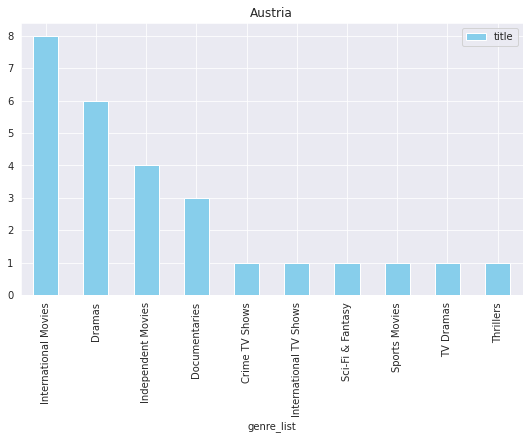

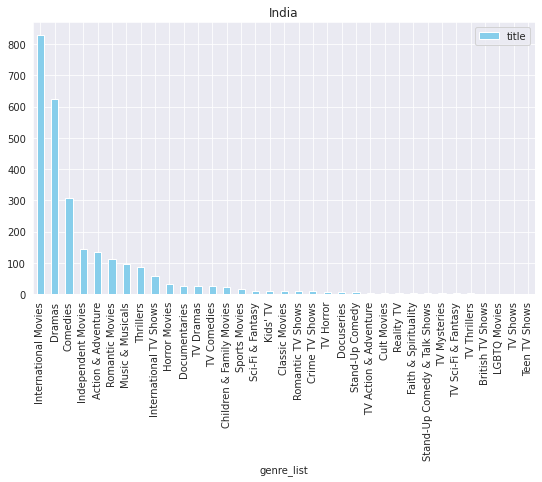

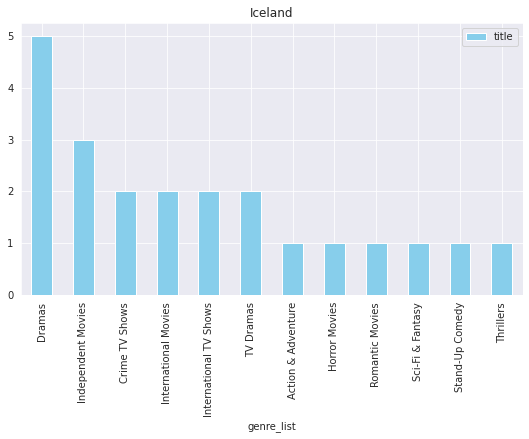

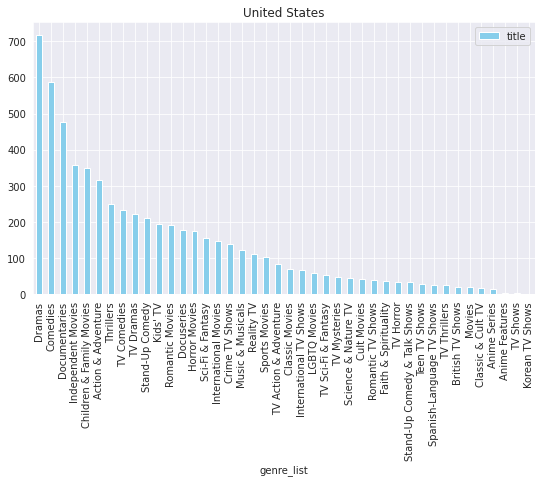

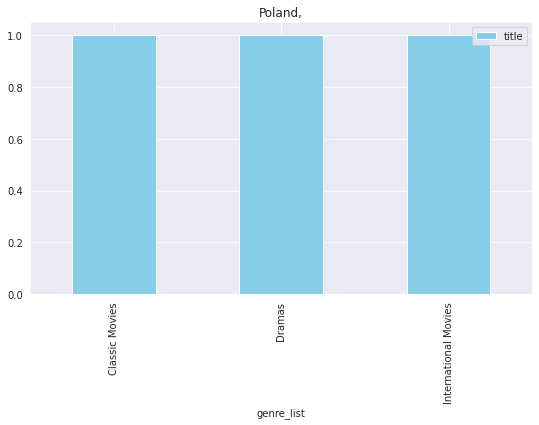

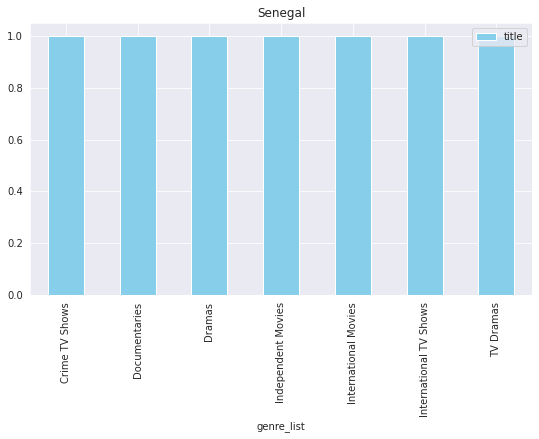

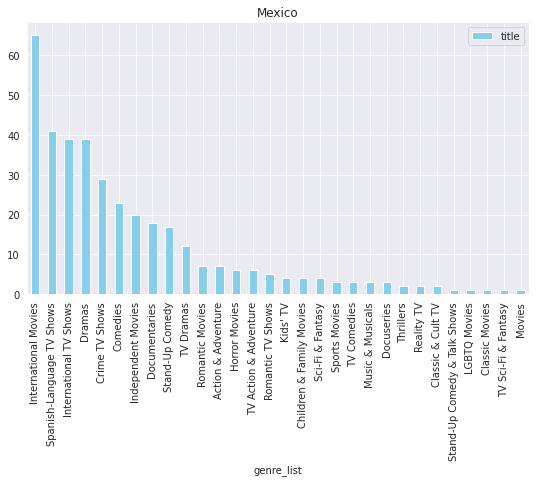

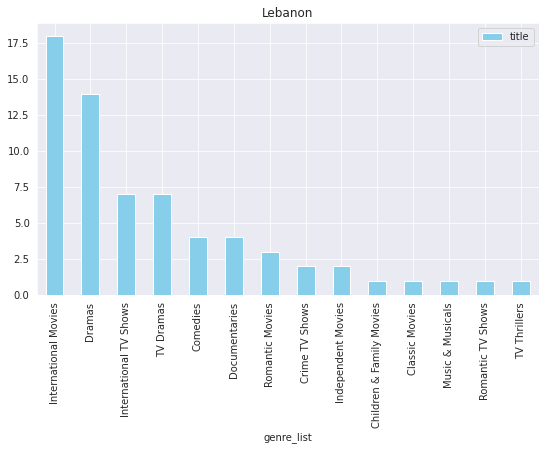

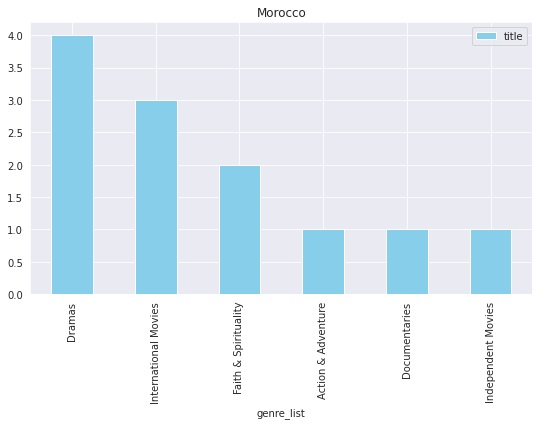

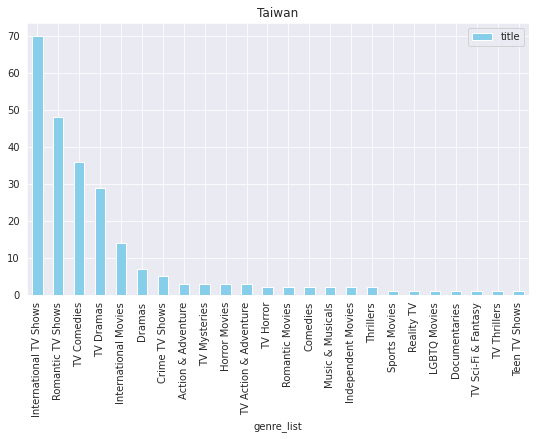

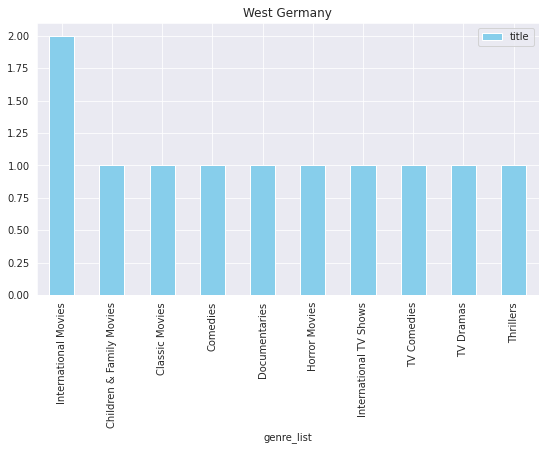

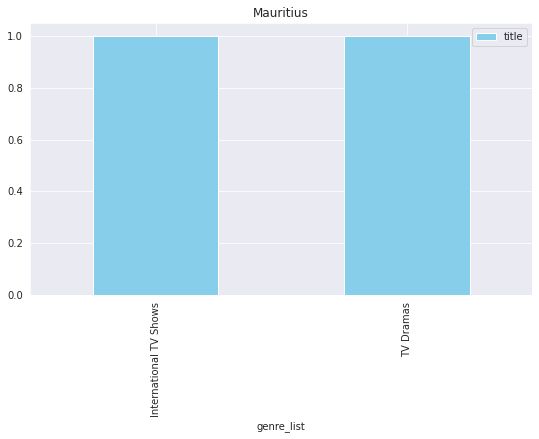

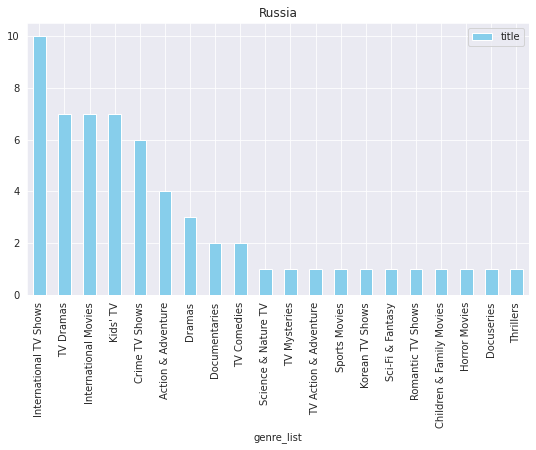

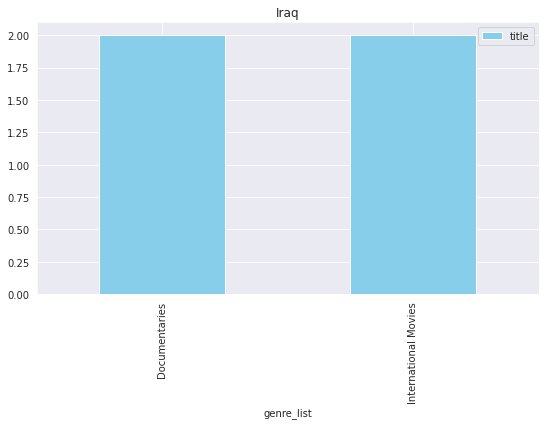

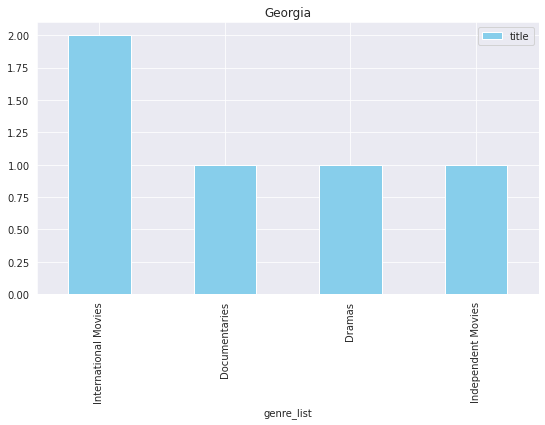

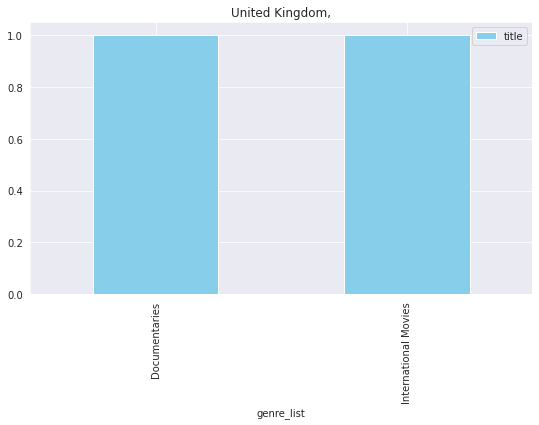

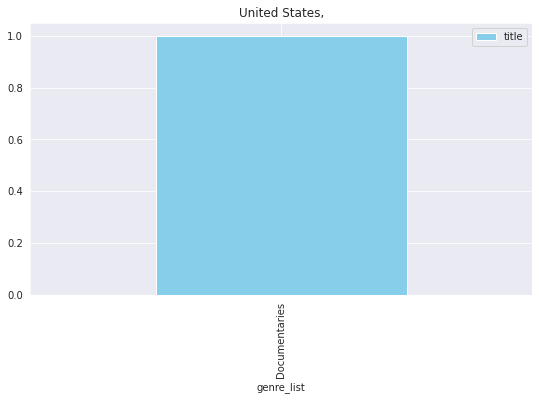

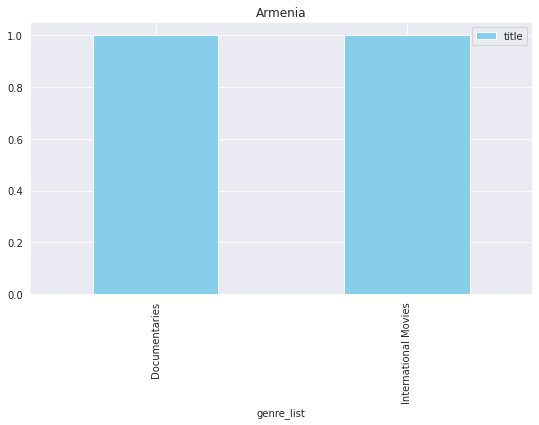

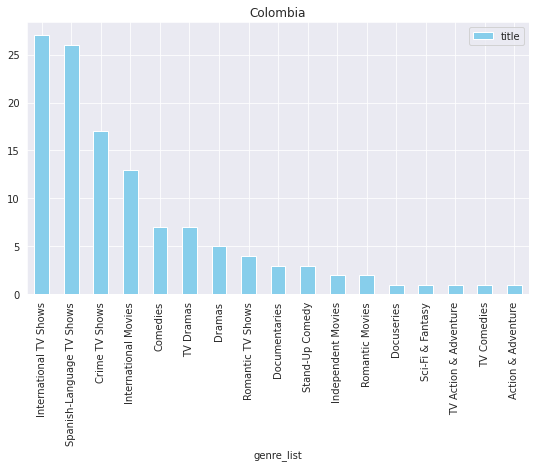

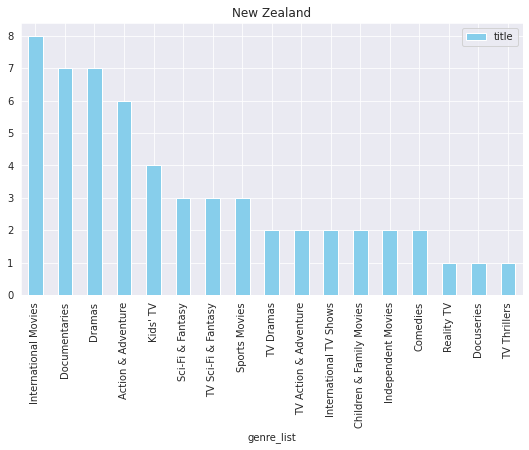

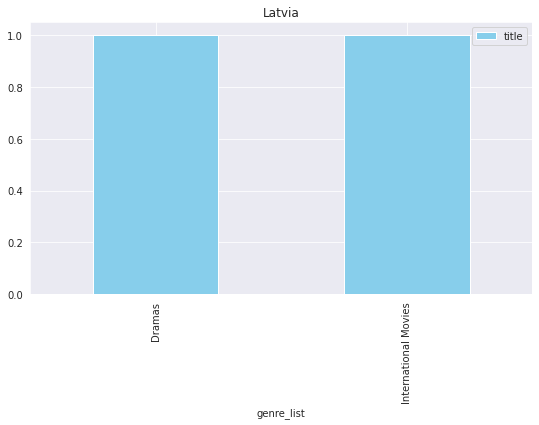

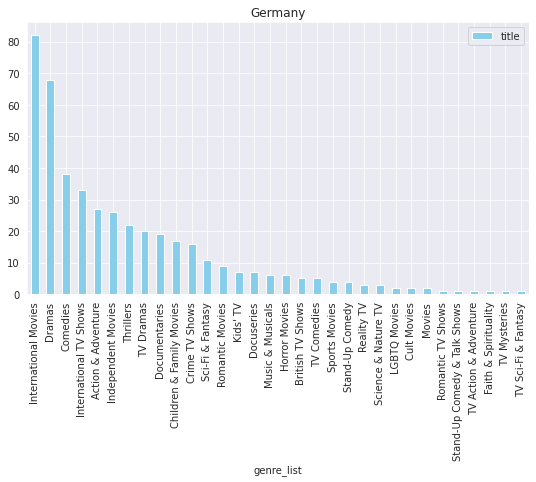

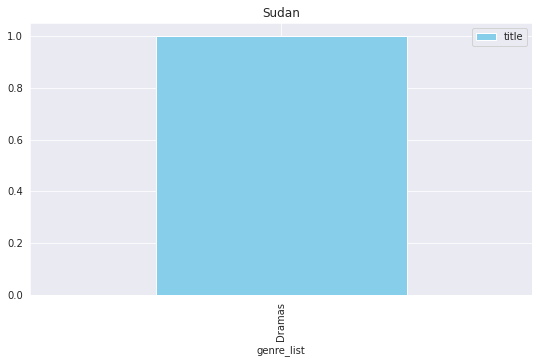

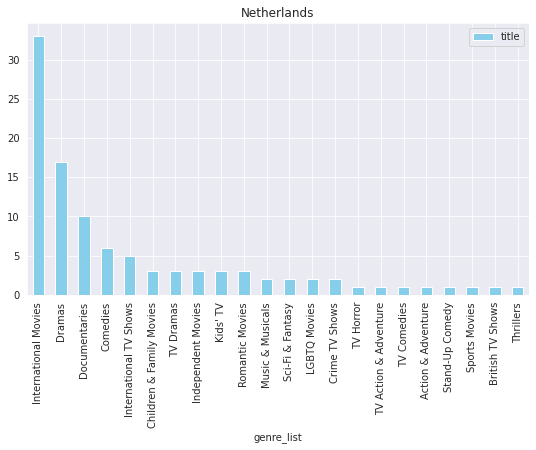

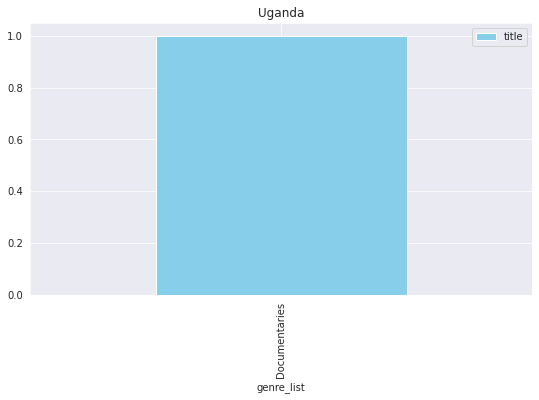

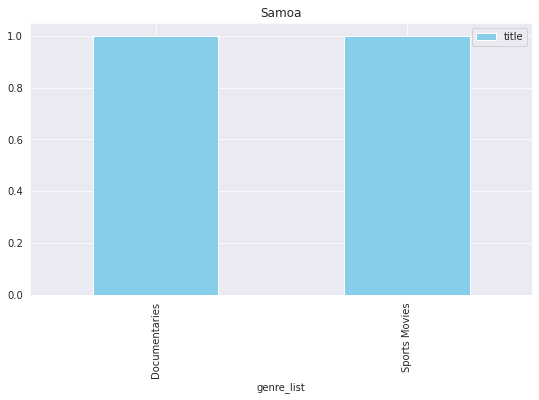

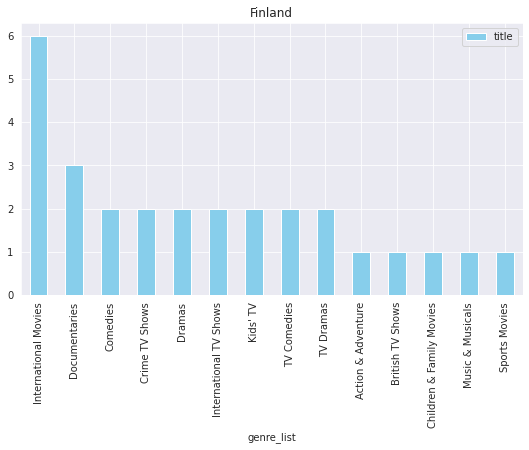

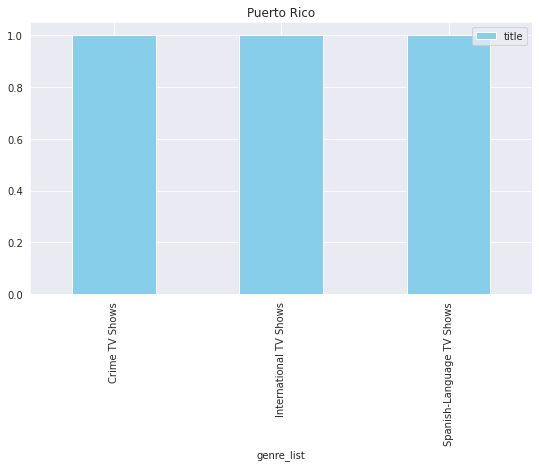

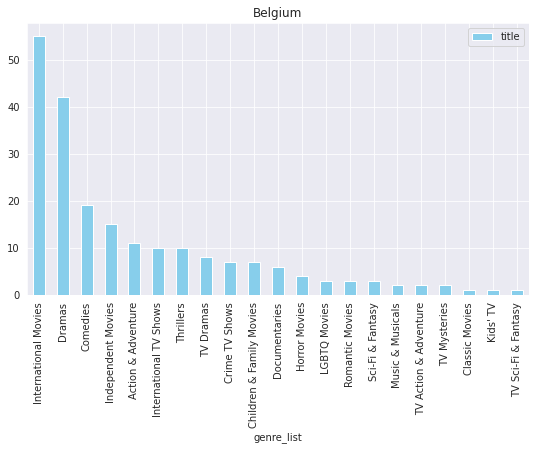

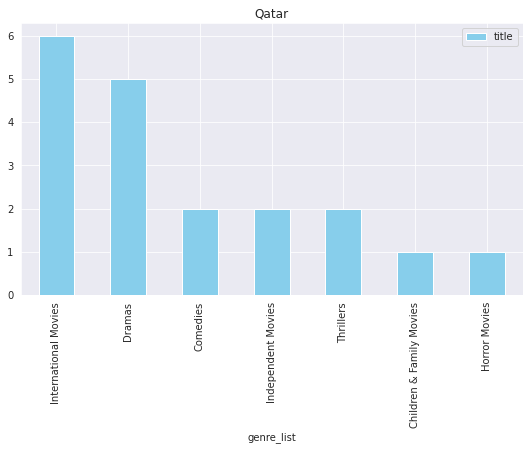

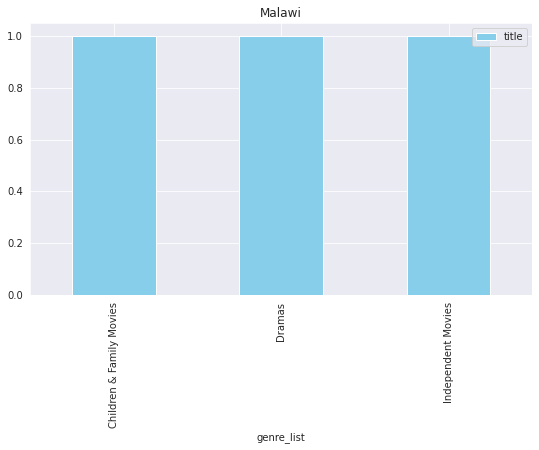

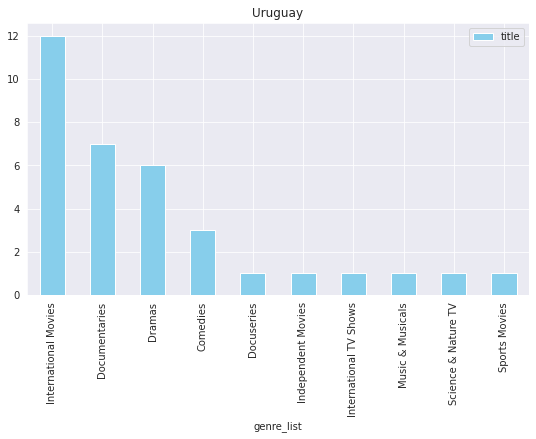

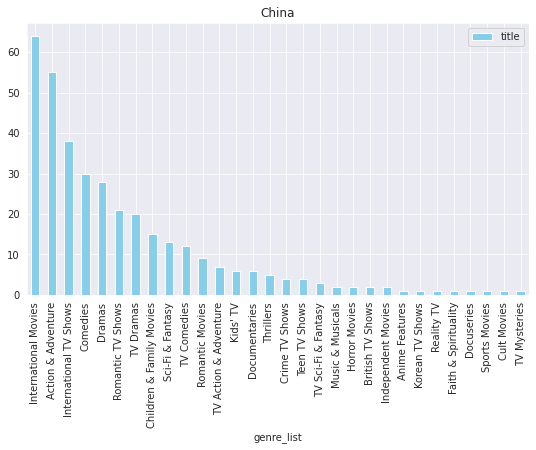

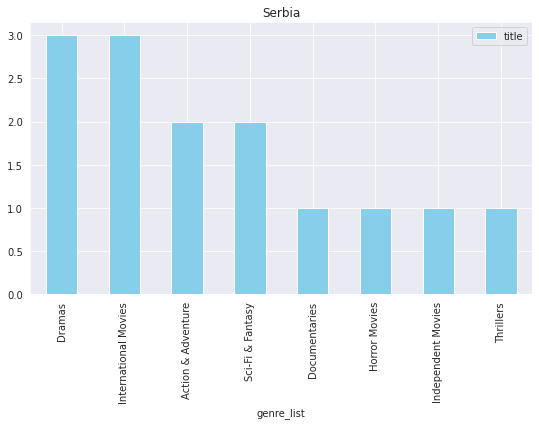

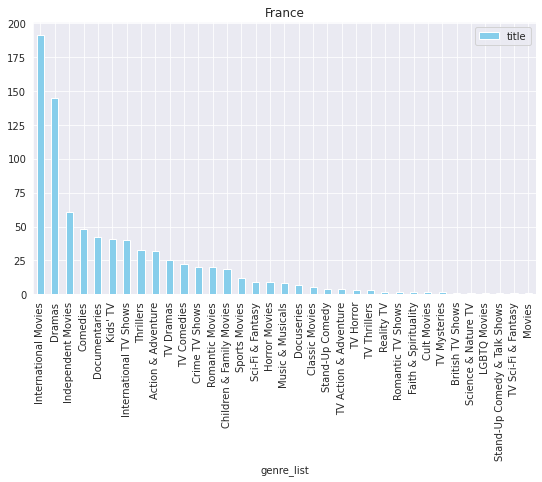

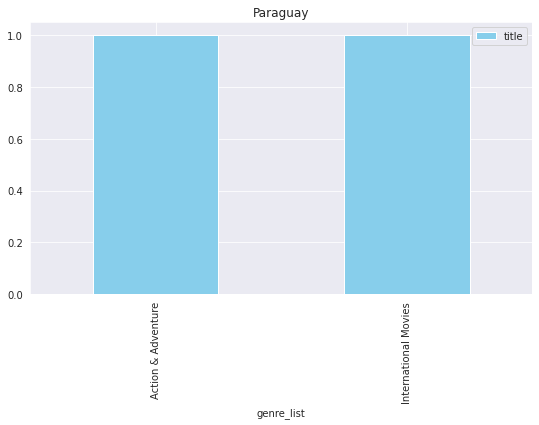

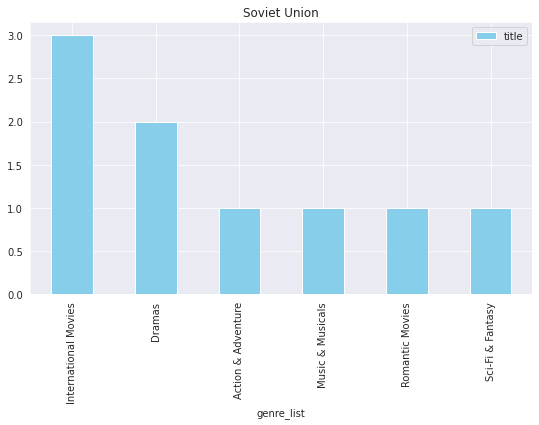

In [712]:
get_genre_country_trends(Dataset)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [713]:
# Chart - 11 visualization code

#getting country wise rating trend
def get_country_ratings_trends(df):
  def explode_country(country):
    try:
        return country.split(", ")
    except:
        return ""
  df['country_list'] = df.apply(lambda x: explode_country(x['country']),axis=1)
  df = df.explode('country_list')
  grouped_df_ = df.groupby(['country_list','rating']).agg({'title':'count'})
  grouped_df = grouped_df_.reset_index()
  grouped_df['country_list'].values
  grouped_df = grouped_df[grouped_df.country_list != '']
  rating_country_df = grouped_df.reset_index().drop("index", axis=1)
  list_of_countries = list(set(list(rating_country_df['country_list'].values)))
  for each in list_of_countries:
    rating_country_df[rating_country_df['country_list'] == each].sort_values("title",ascending=False).plot.bar(x = "rating", y="title", color="khaki", rot=45, figsize=(5,5))
    plt.title(f"{each}")

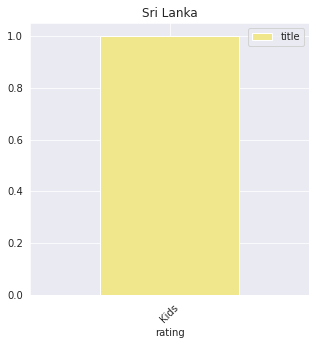

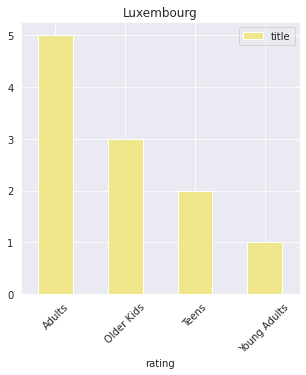

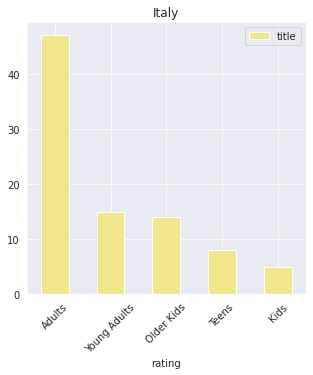

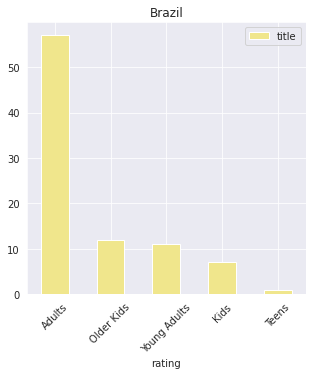

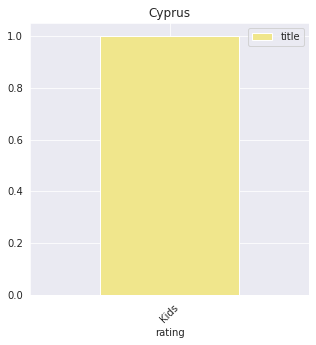

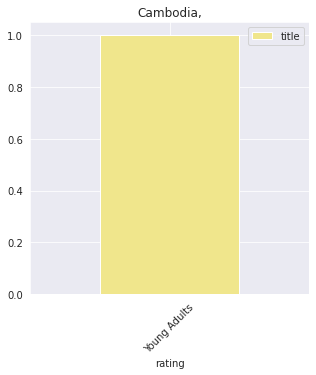

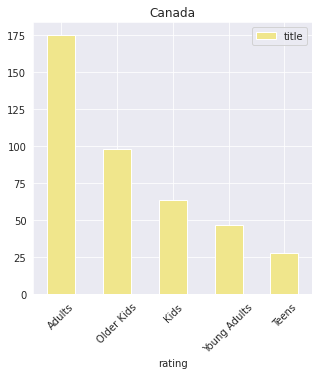

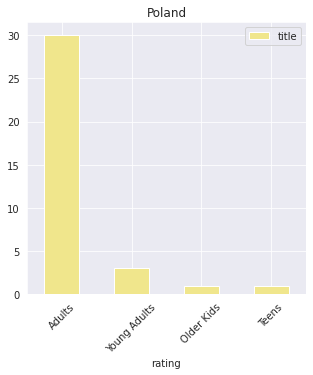

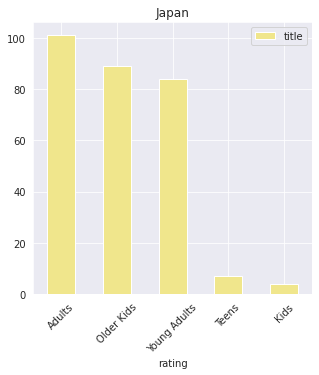

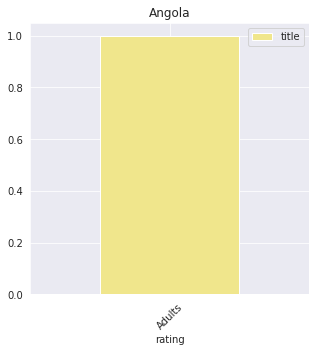

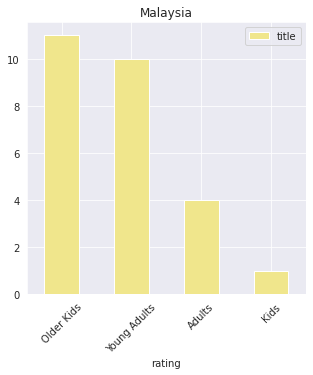

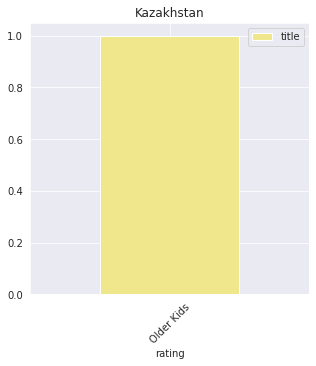

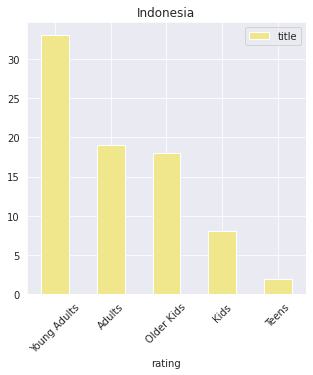

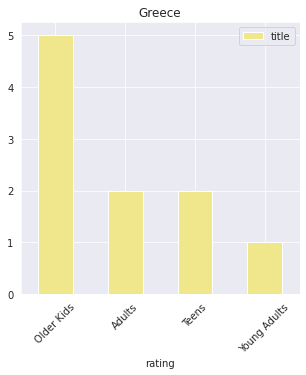

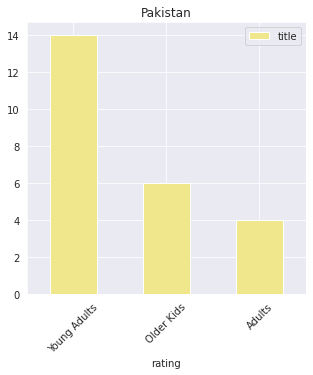

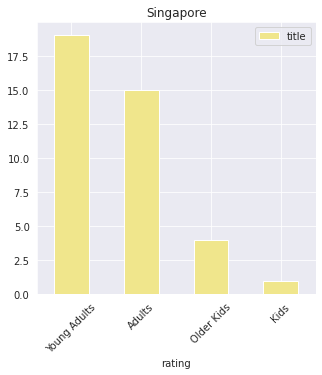

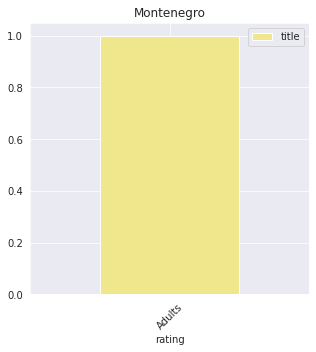

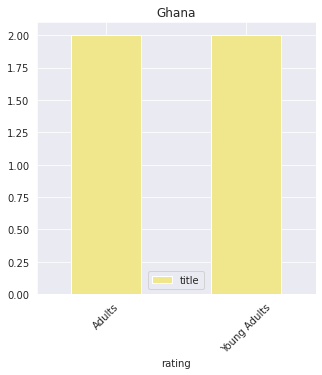

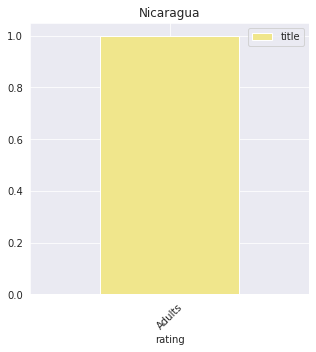

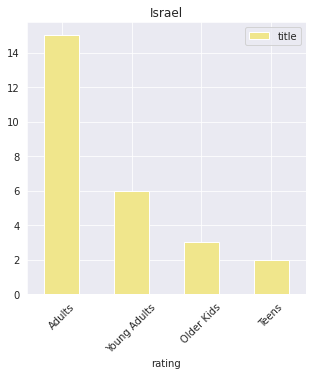

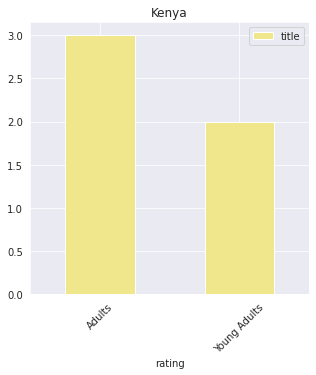

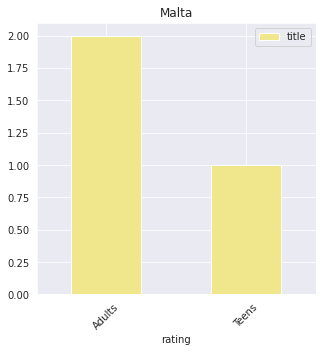

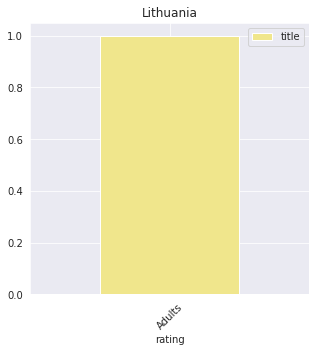

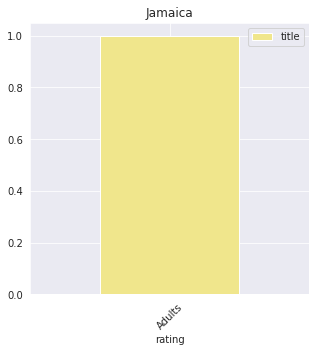

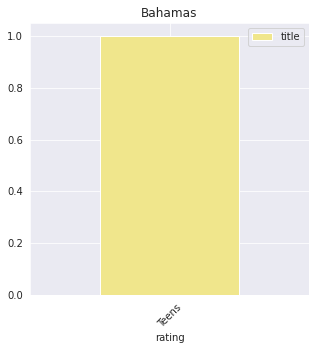

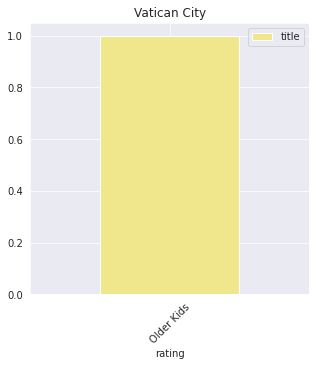

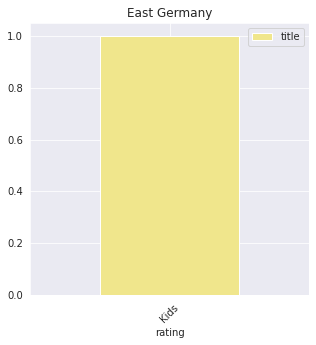

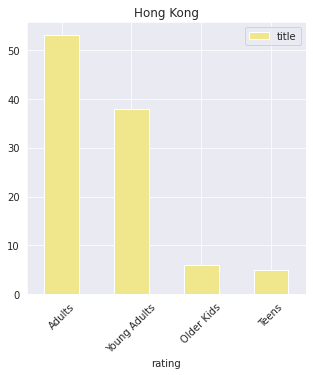

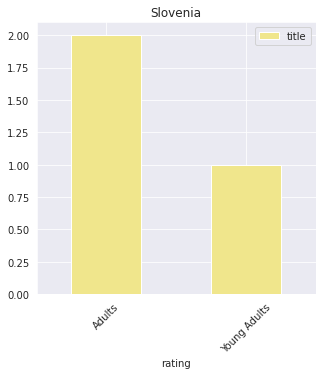

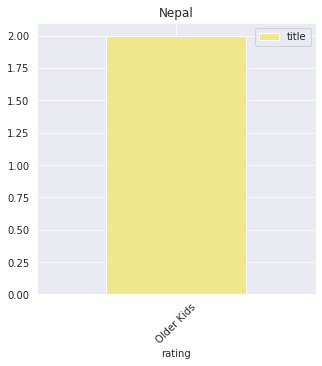

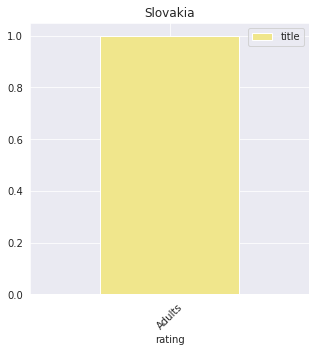

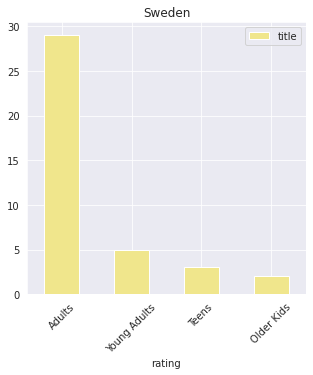

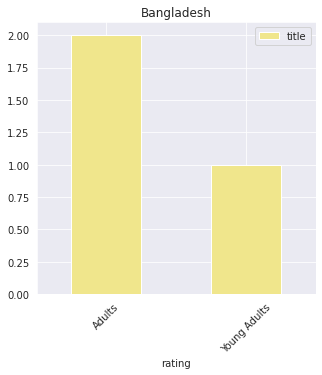

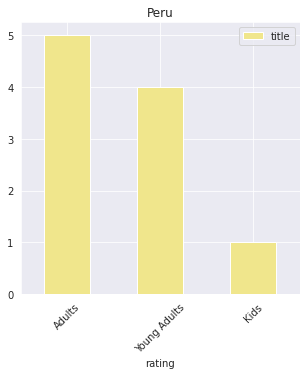

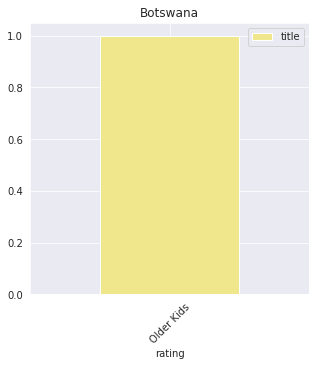

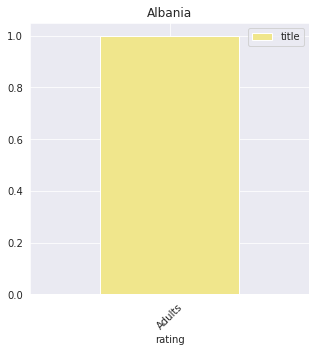

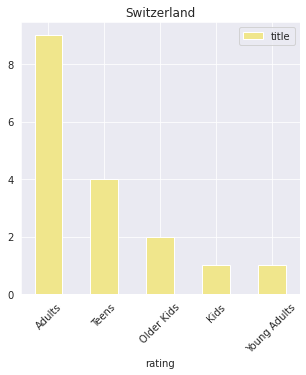

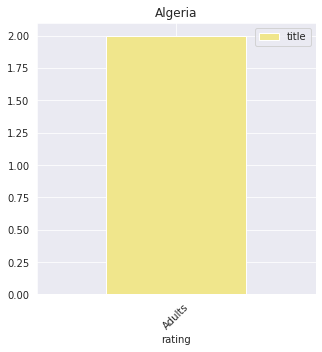

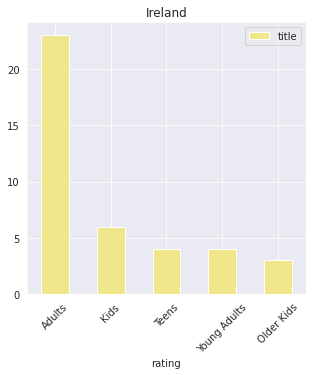

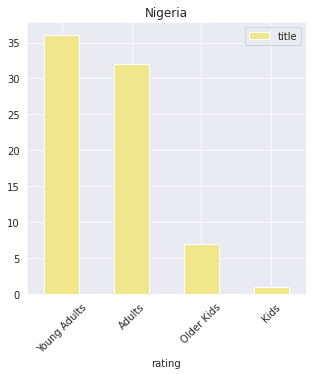

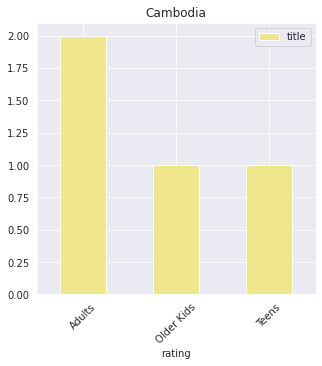

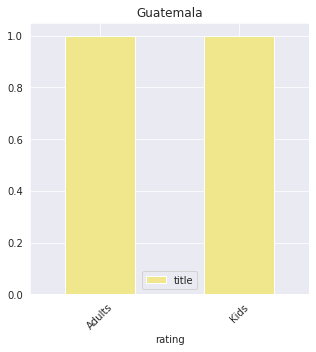

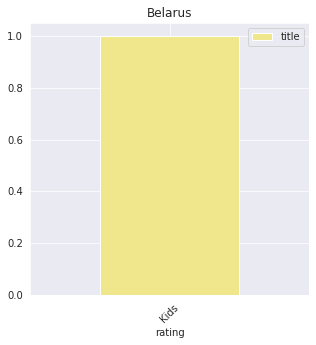

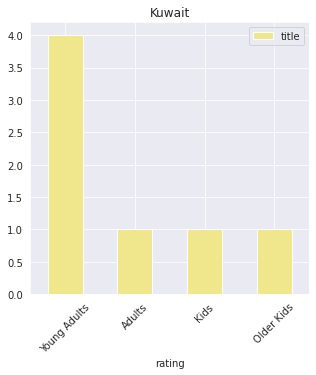

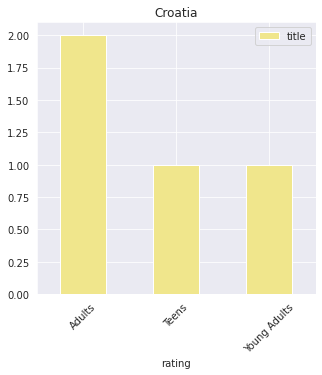

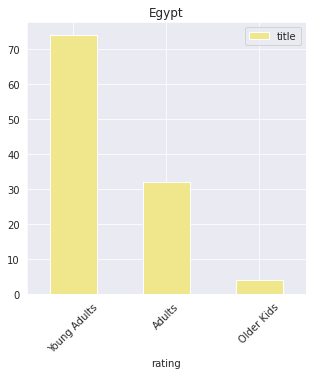

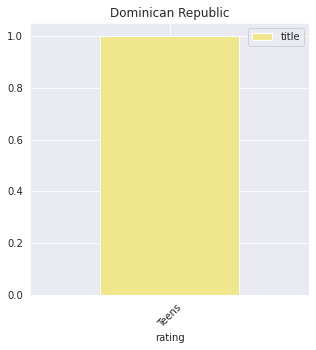

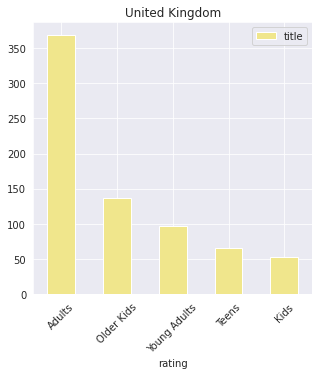

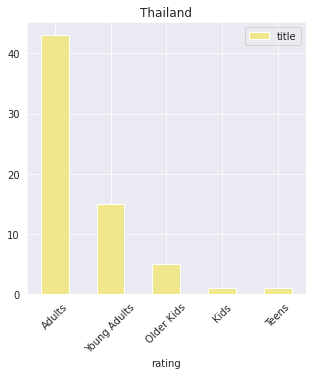

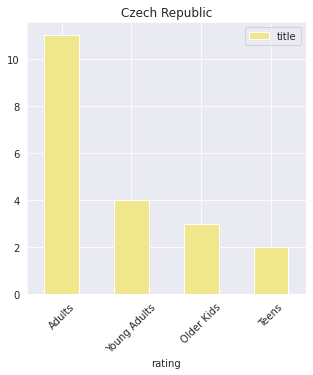

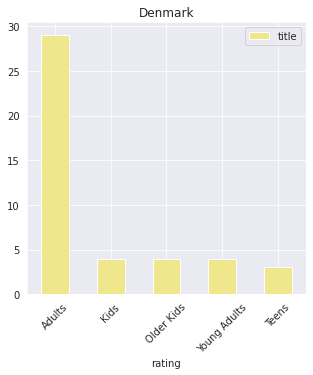

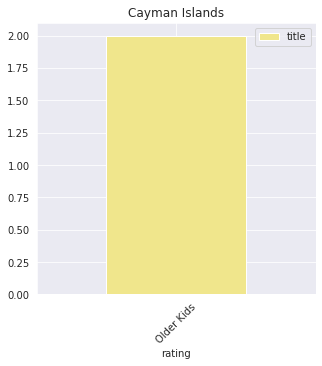

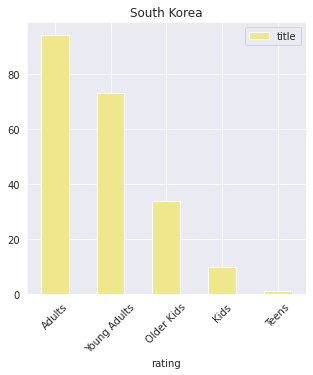

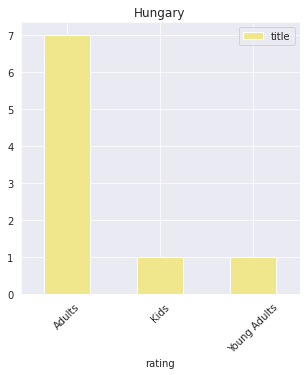

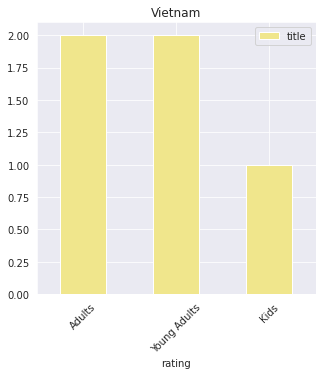

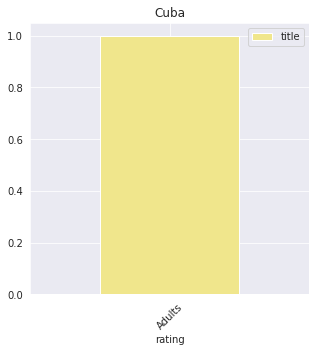

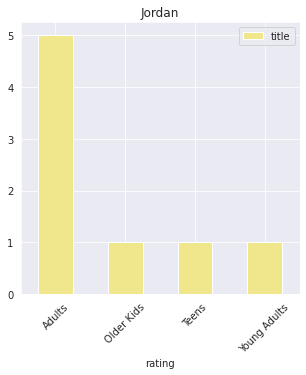

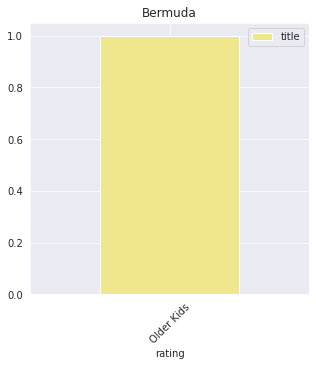

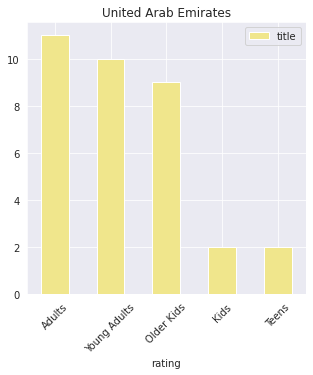

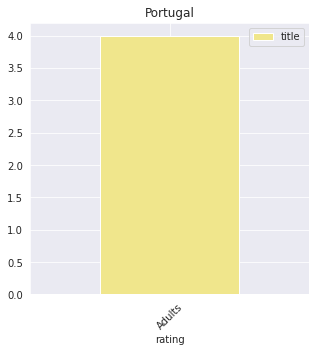

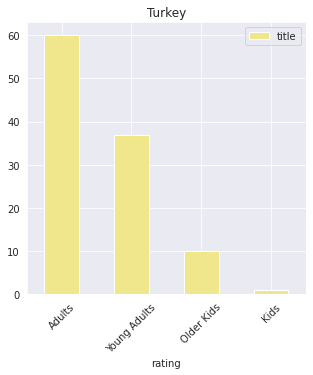

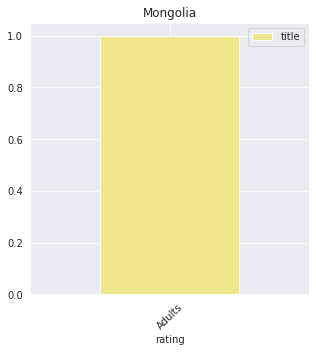

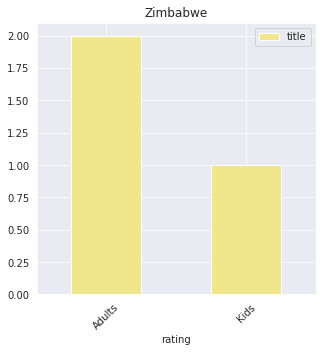

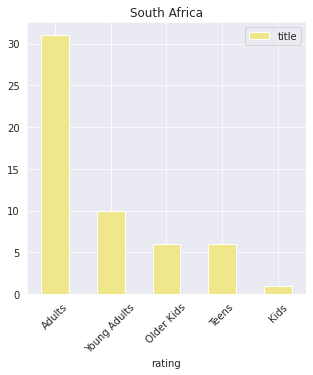

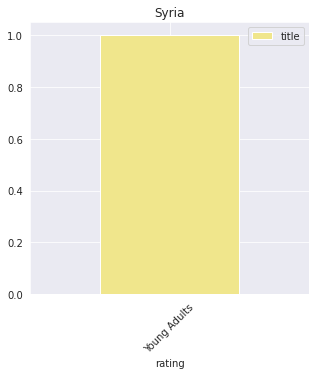

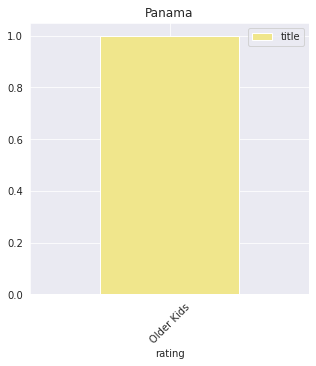

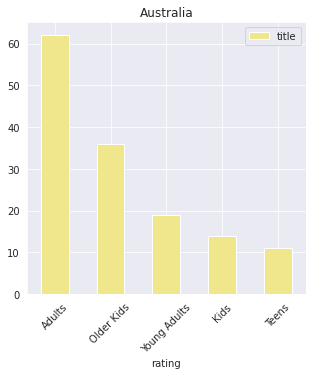

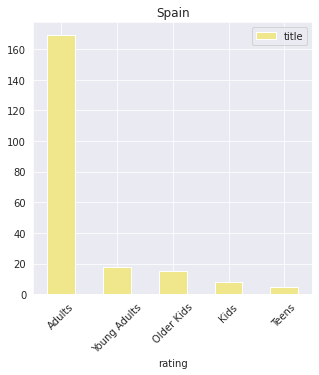

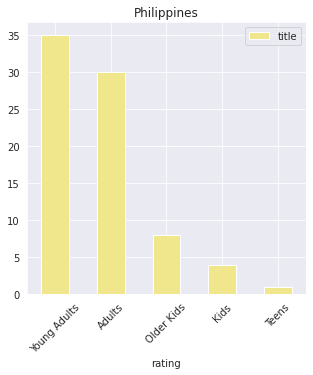

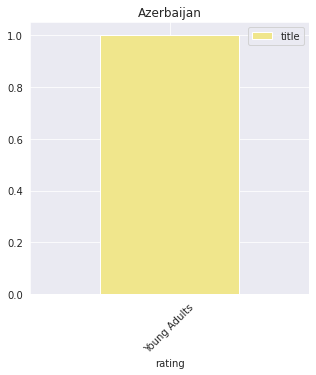

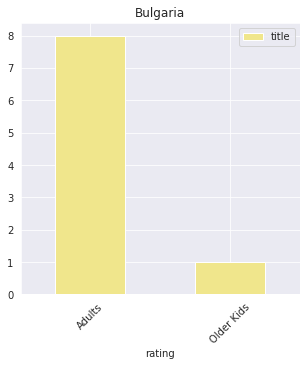

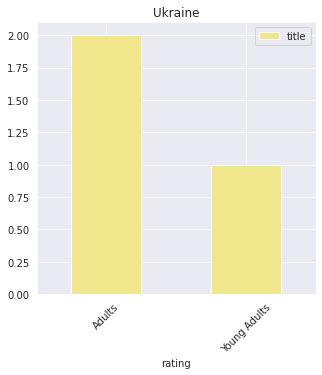

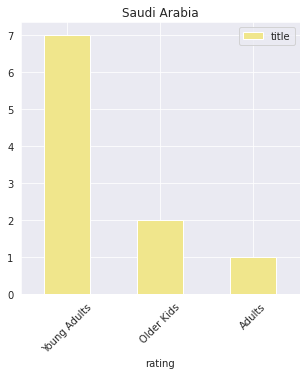

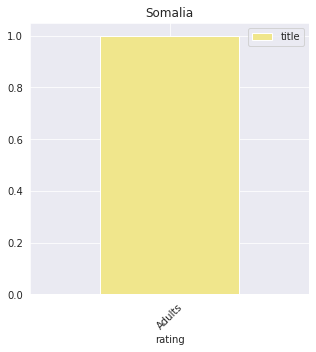

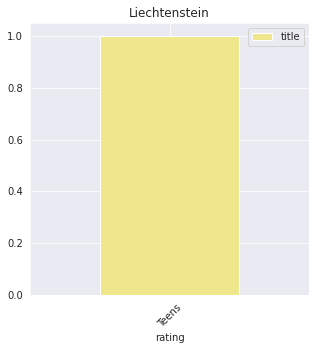

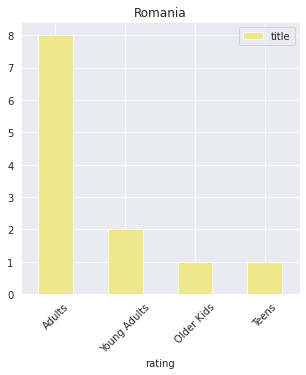

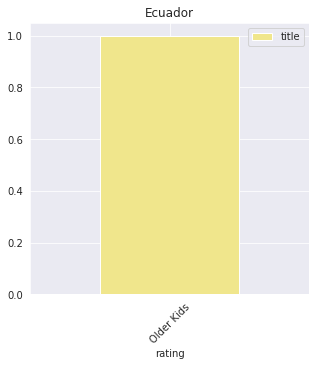

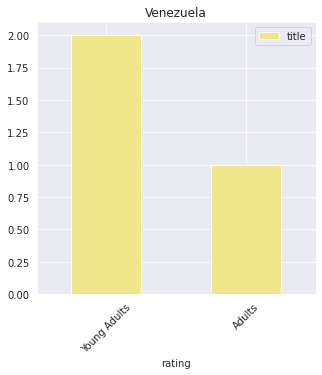

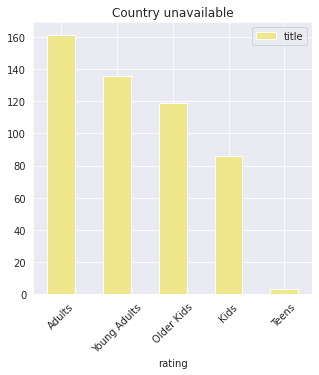

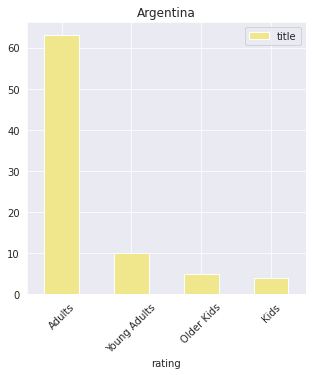

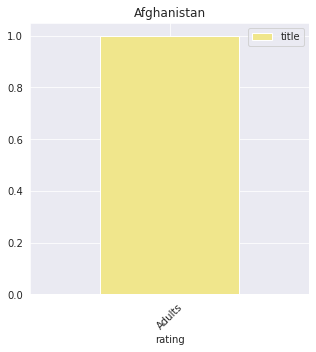

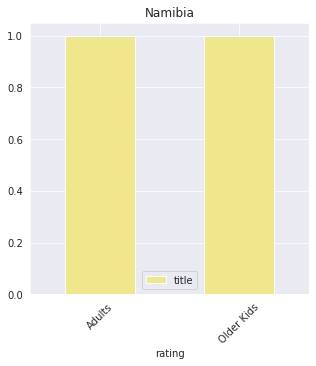

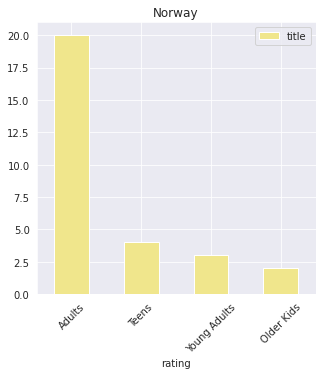

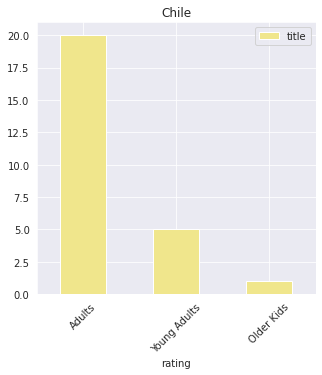

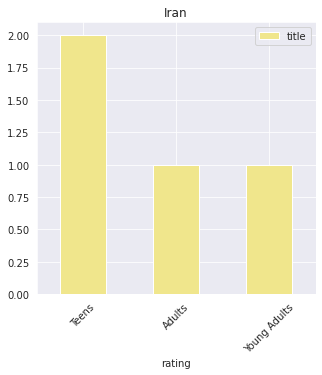

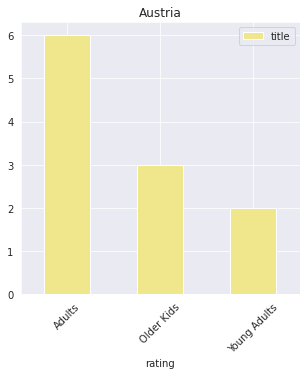

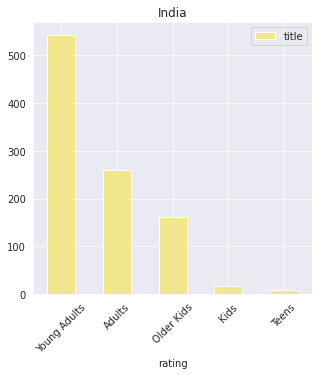

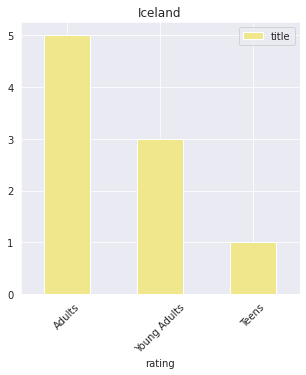

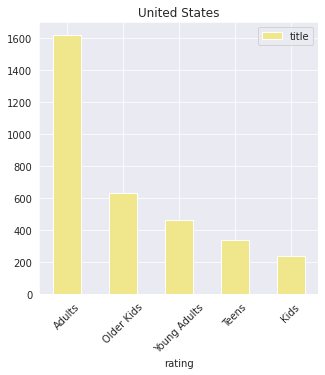

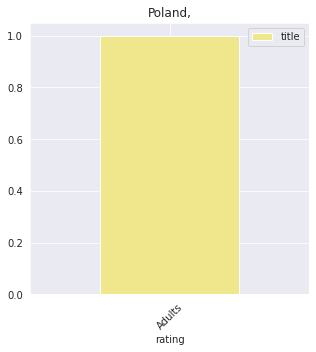

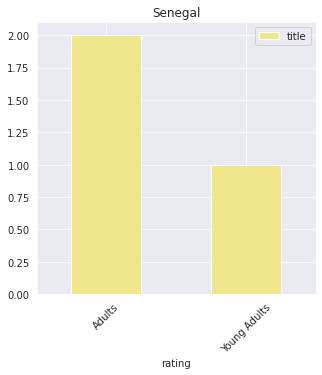

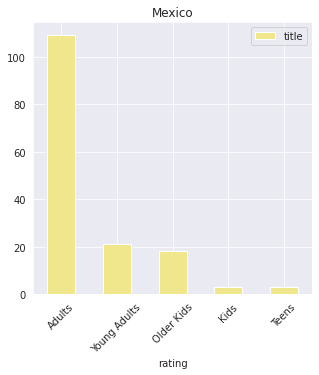

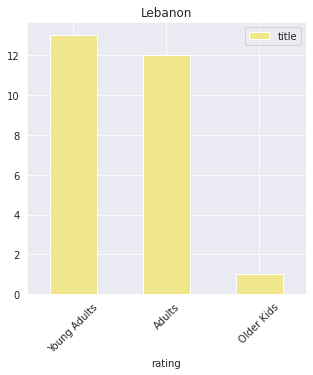

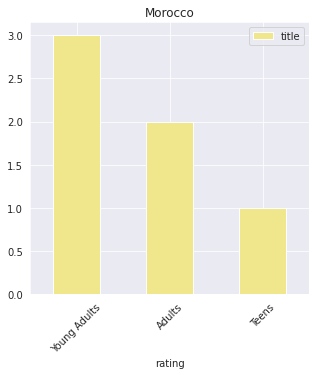

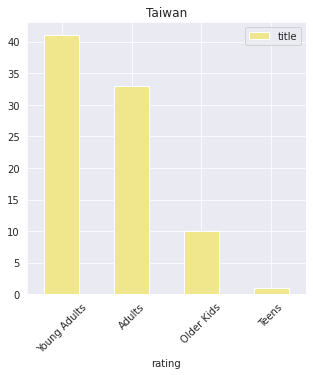

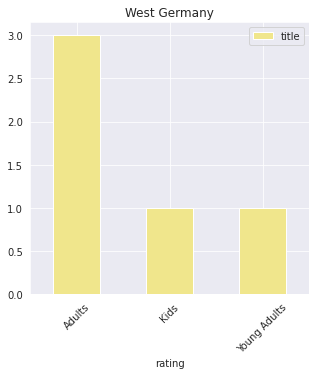

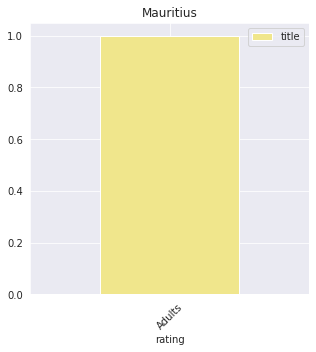

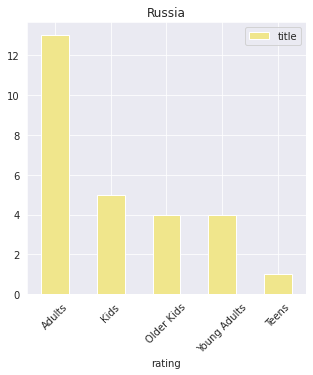

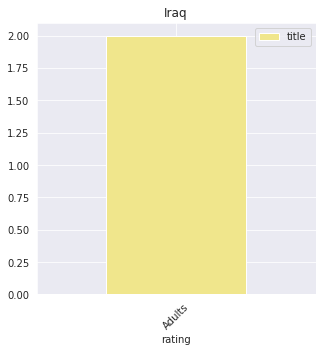

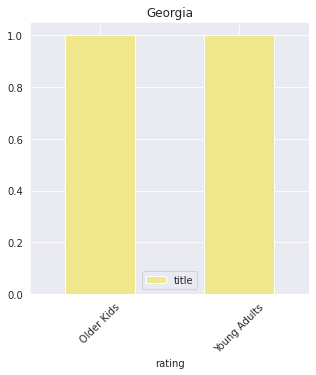

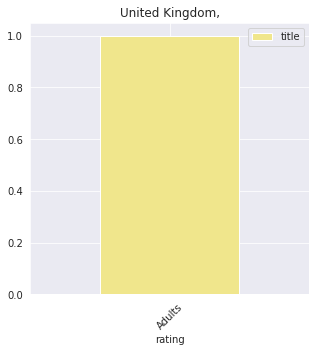

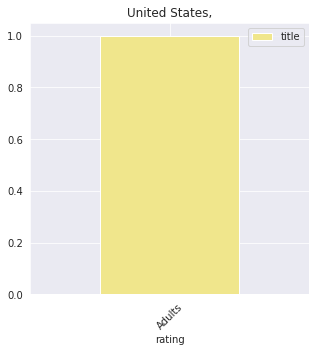

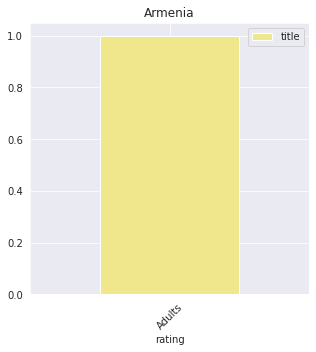

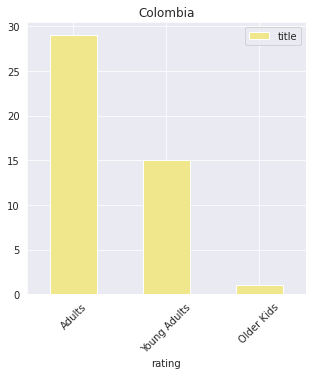

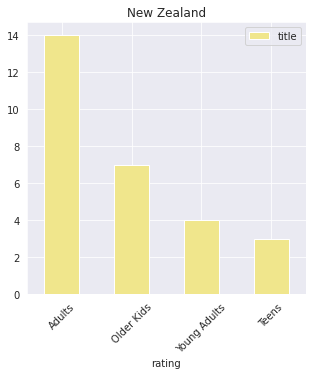

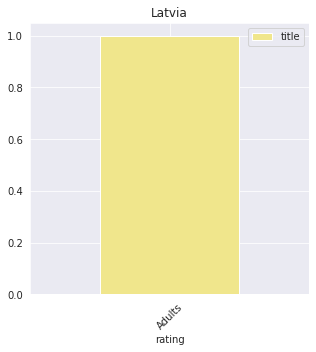

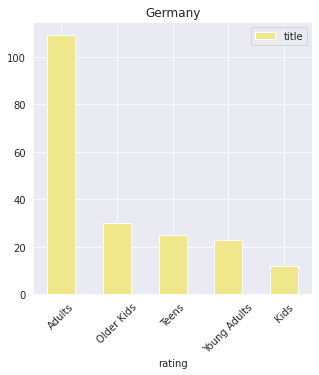

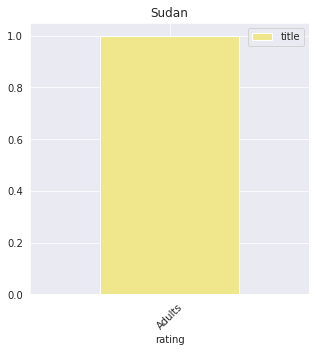

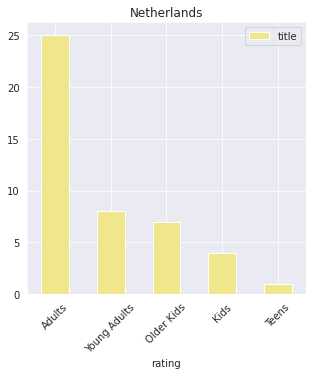

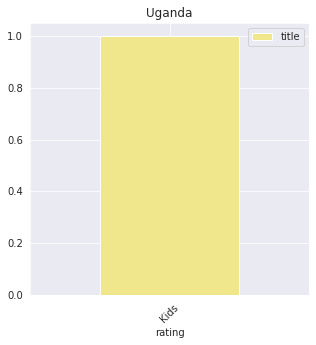

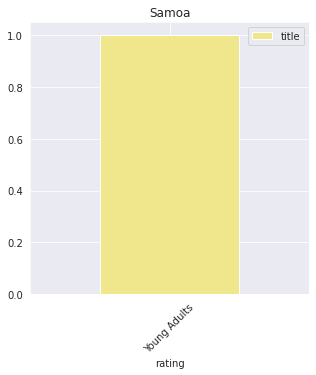

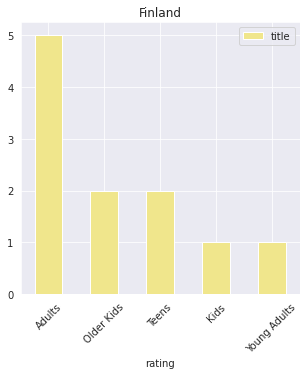

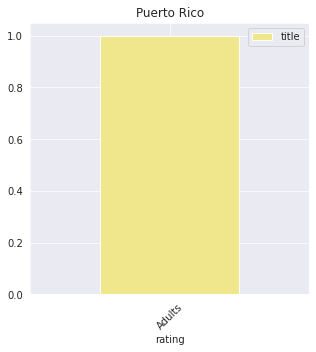

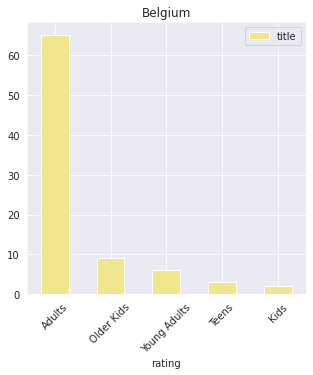

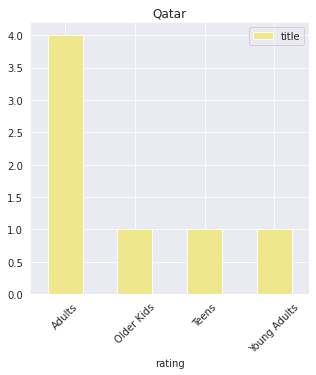

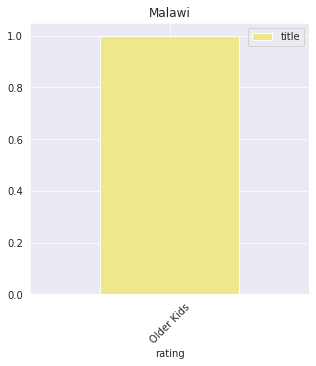

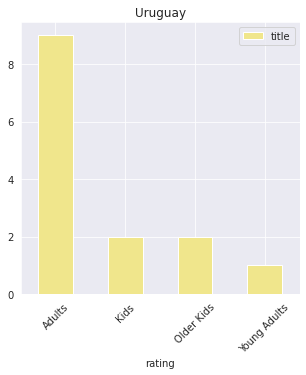

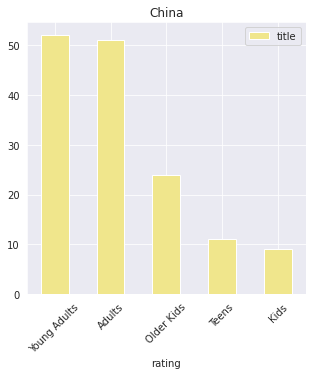

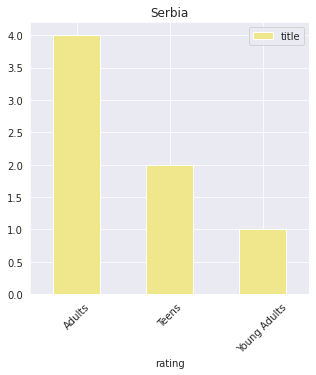

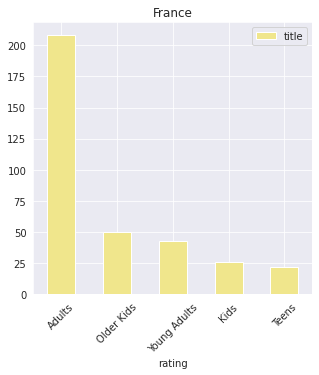

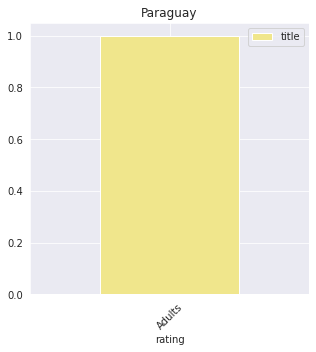

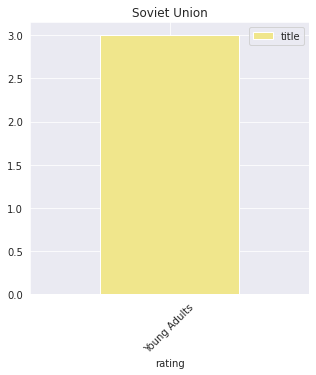

In [714]:
get_country_ratings_trends(Dataset)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [715]:
# Chart - 12 visualization code

#get all country type preference
def get_country_type_trends(df):
  def explode_country(country):
    try:
        return country.split(", ")
    except:
        return ""
  df['country_list'] = df.apply(lambda x: explode_country(x['country']),axis=1)
  df = df.explode('country_list')
  grouped_df_ = df.groupby(['country_list','type']).agg({'title':'count'})
  grouped_df = grouped_df_.reset_index()
  grouped_df['country_list'].values
  grouped_df = grouped_df[grouped_df.country_list != '']
  type_country_df = grouped_df.reset_index().drop("index", axis=1)
  list_of_countries = list(set(list(type_country_df['country_list'].values)))
  for each in list_of_countries:
    type_country_df[type_country_df['country_list'] == each].sort_values("title",ascending=False).plot.bar(x = "type", y="title", color="slateblue", rot=45, figsize=(5,5))
    plt.title(f"{each}")

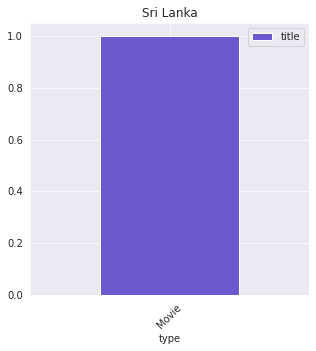

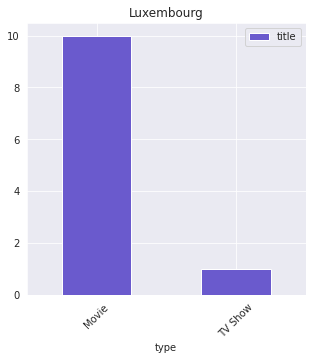

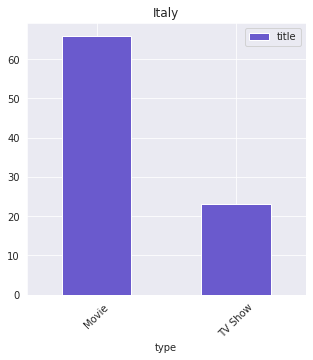

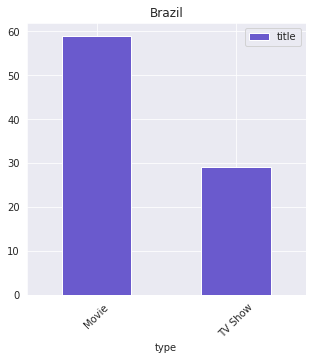

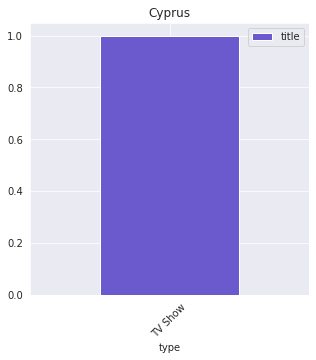

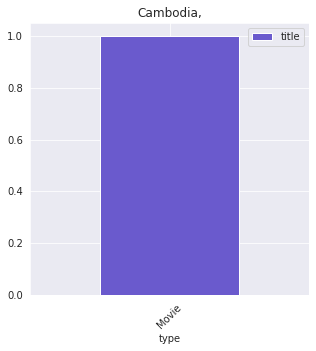

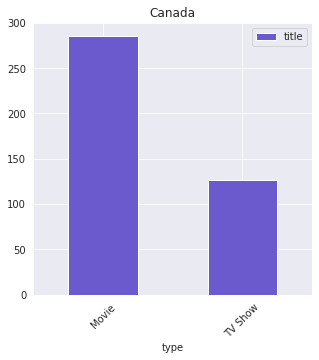

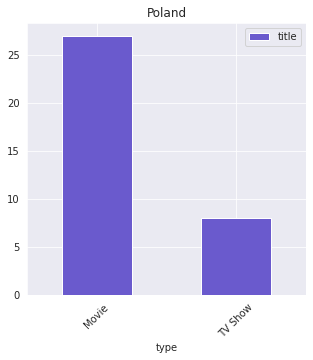

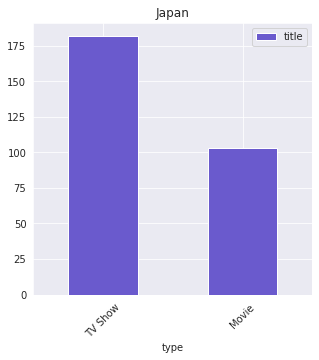

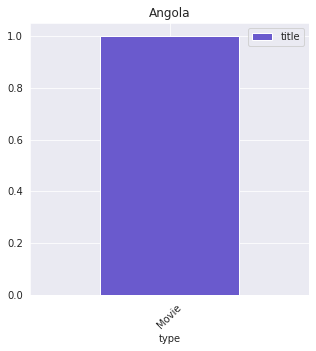

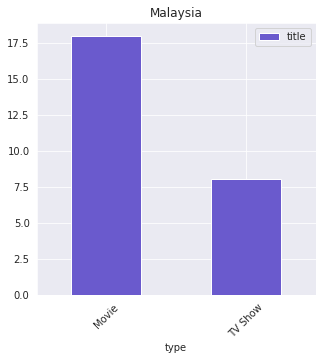

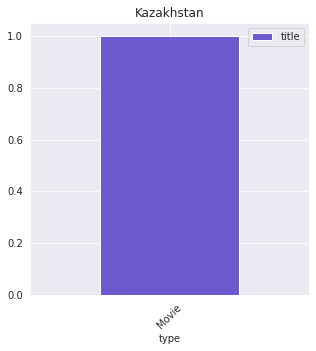

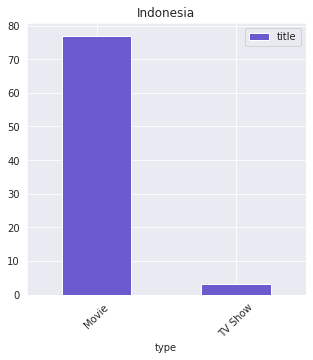

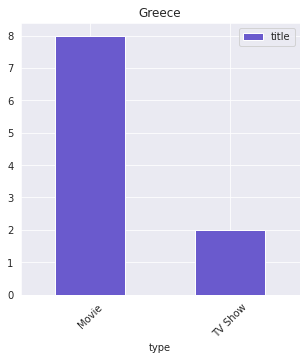

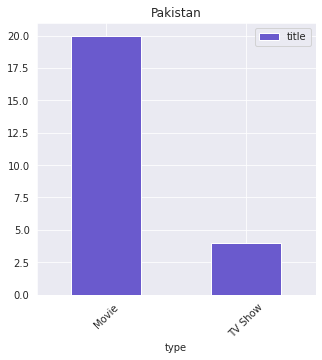

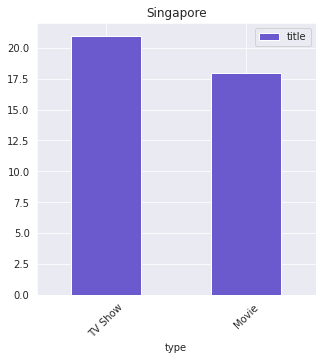

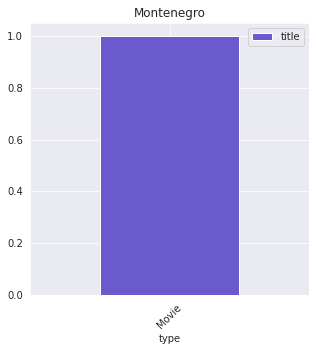

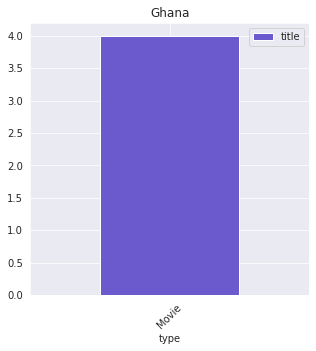

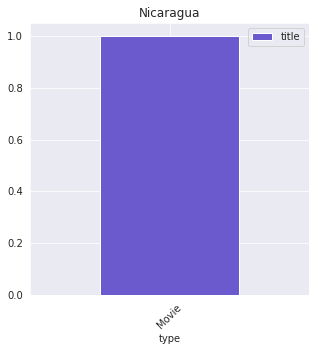

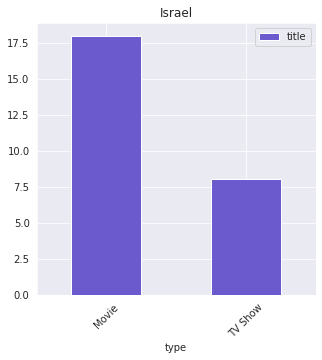

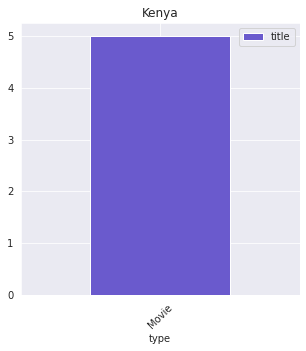

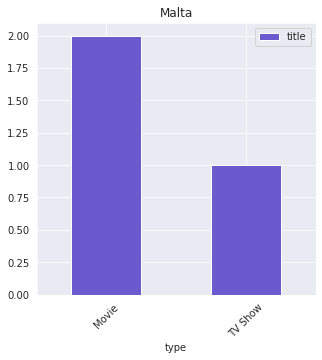

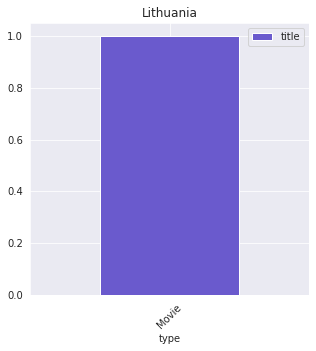

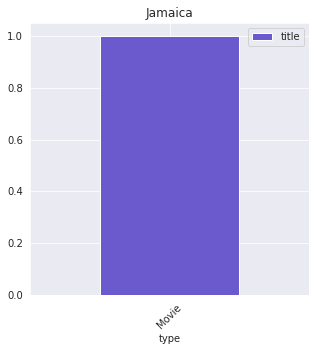

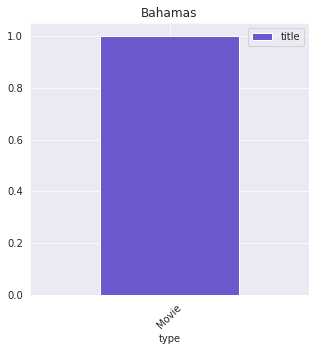

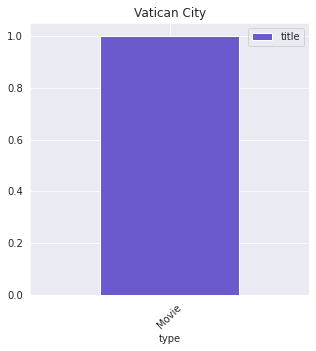

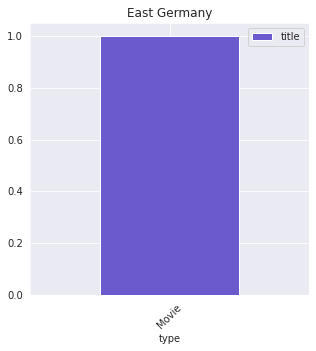

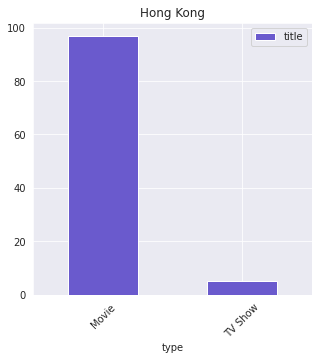

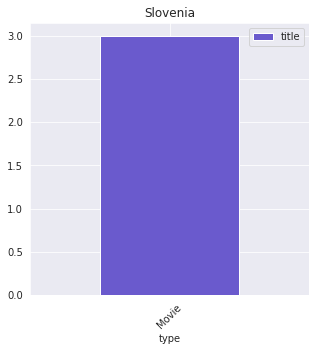

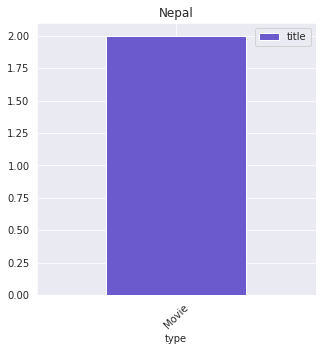

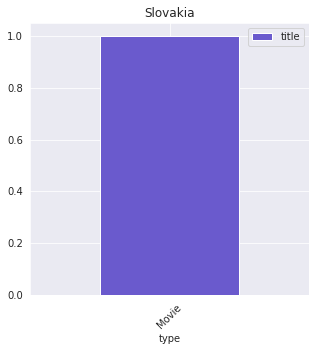

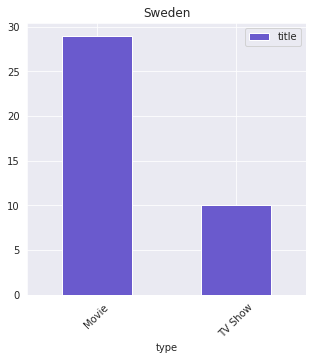

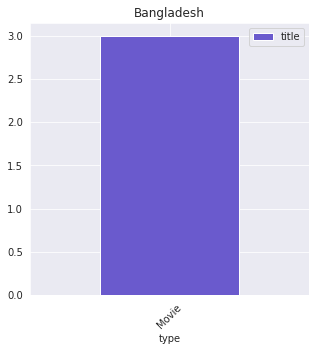

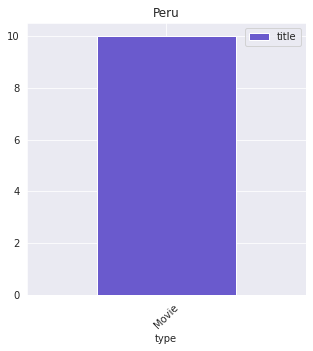

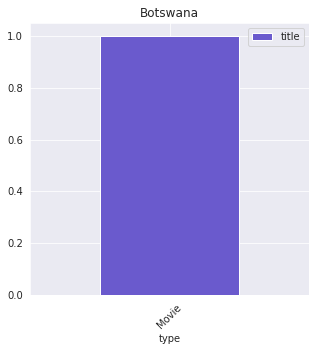

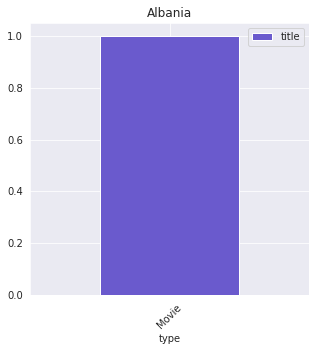

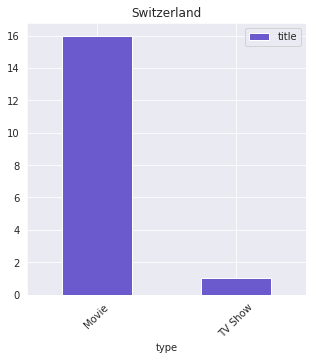

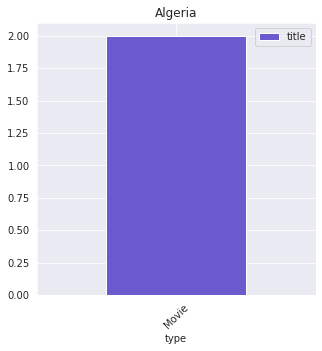

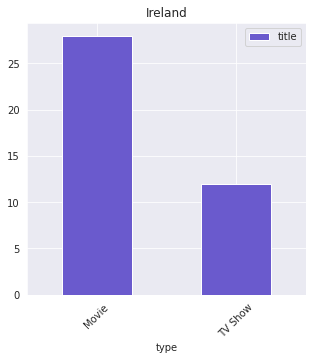

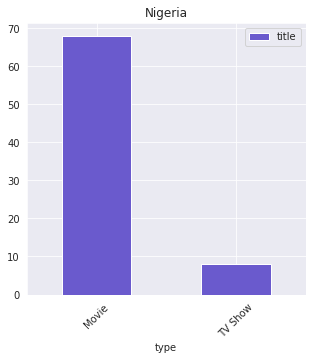

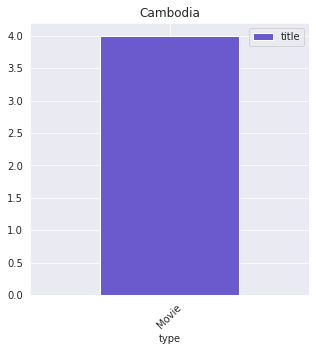

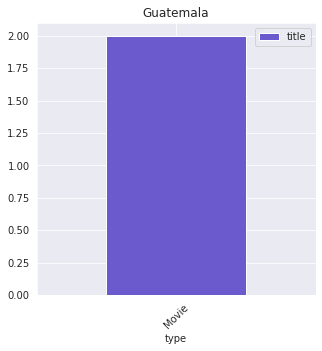

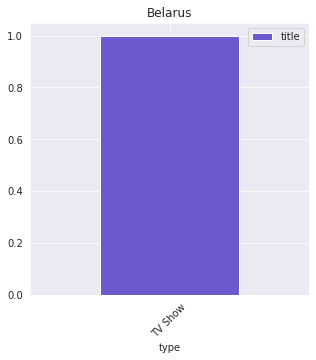

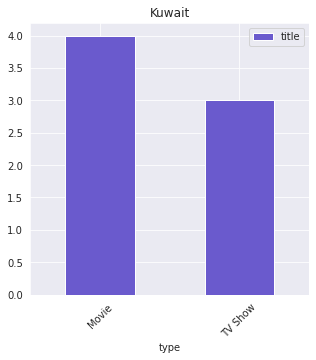

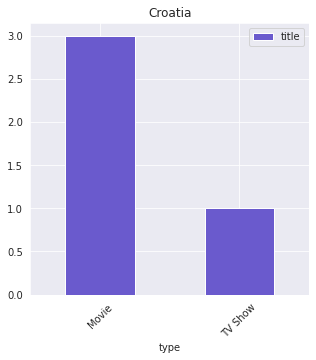

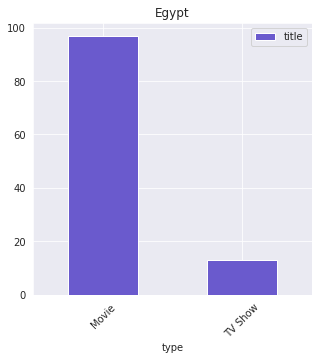

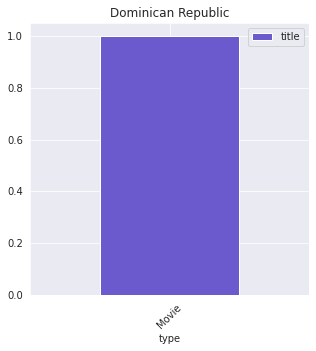

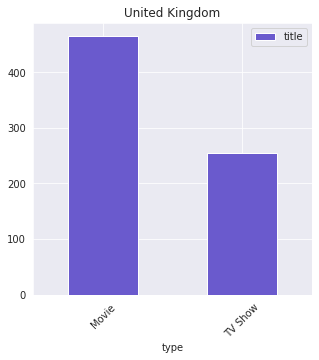

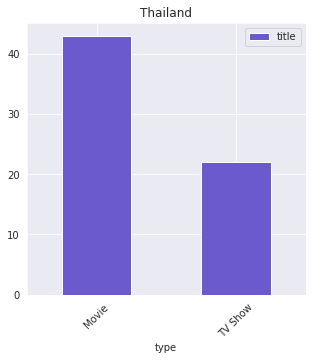

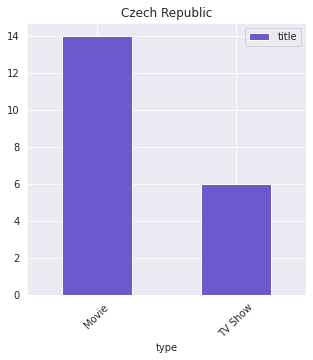

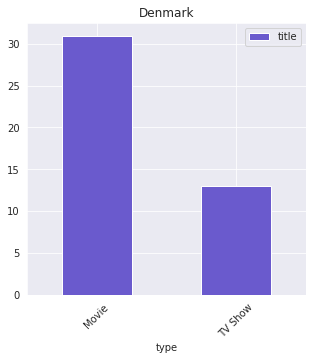

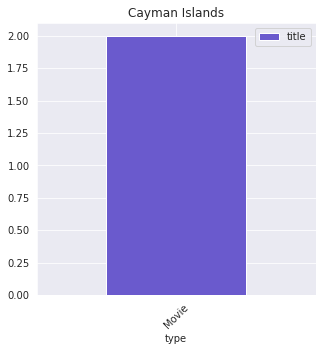

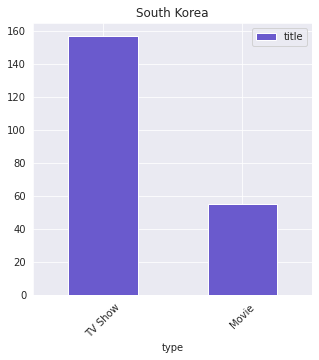

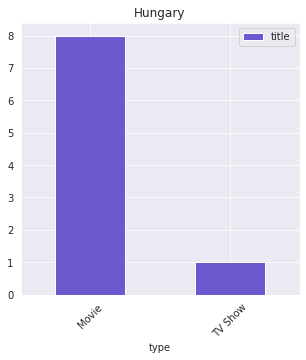

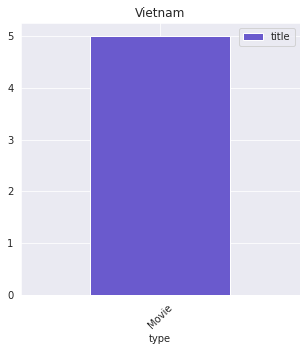

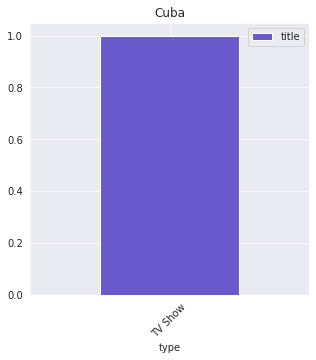

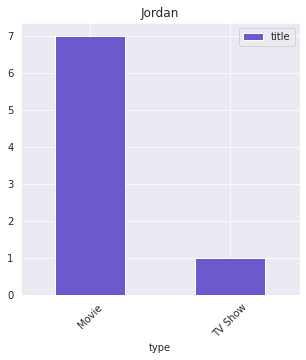

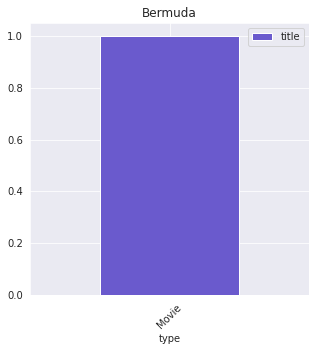

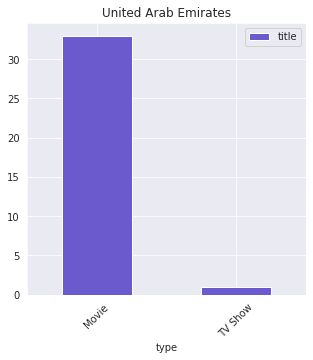

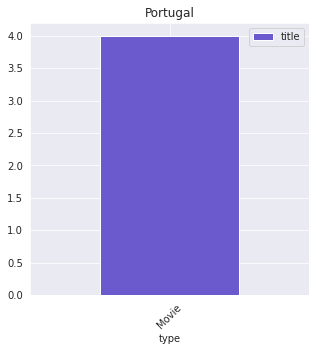

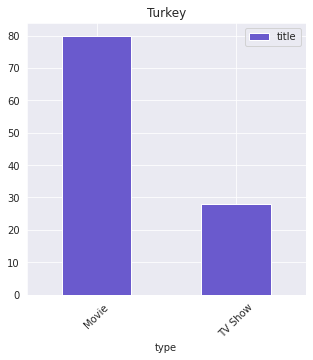

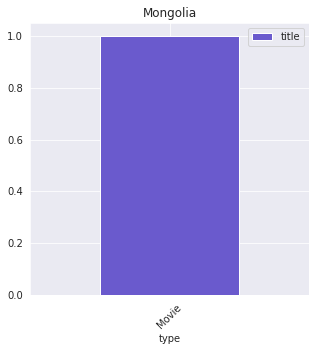

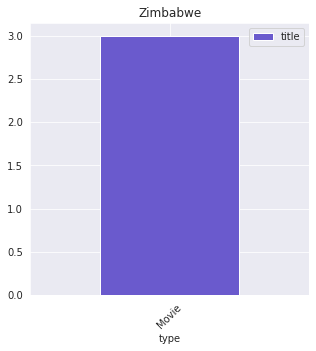

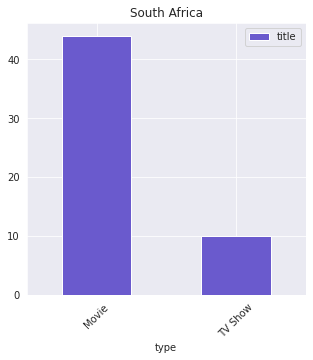

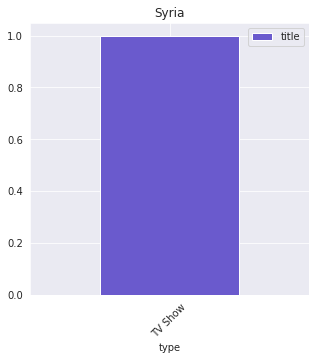

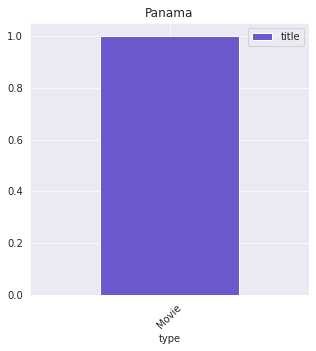

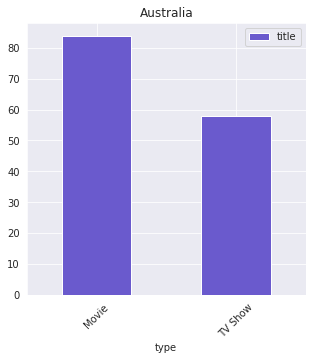

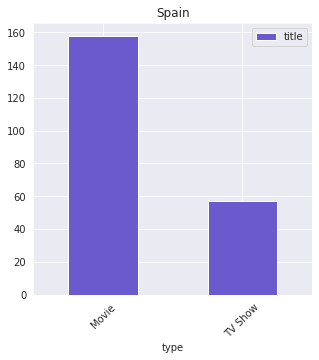

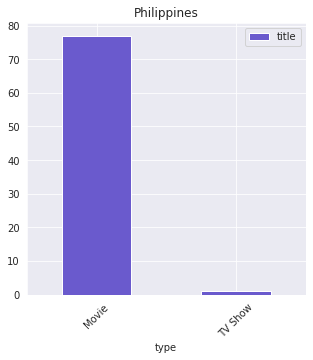

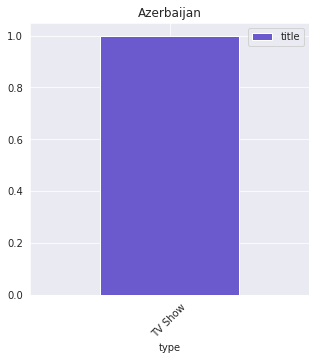

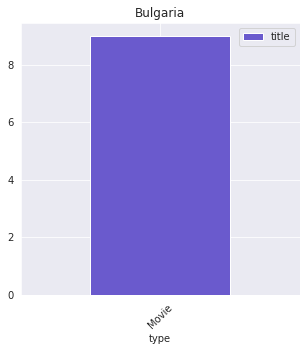

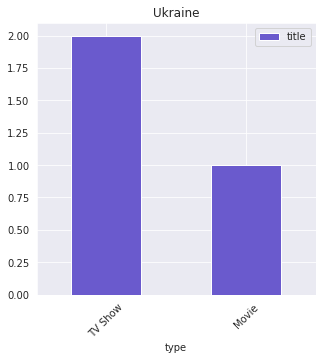

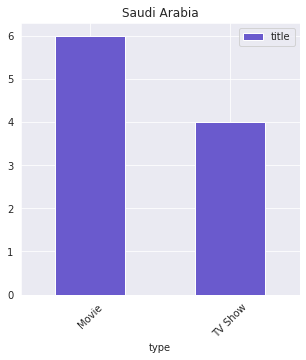

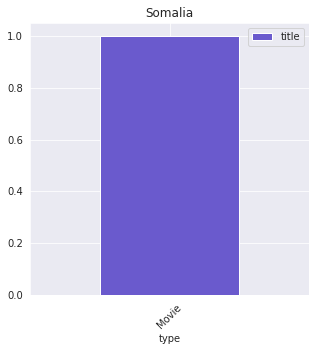

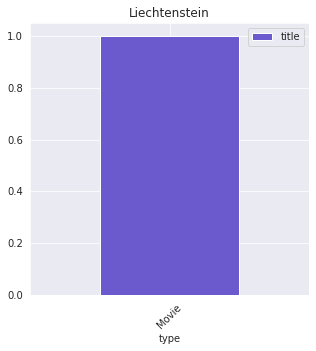

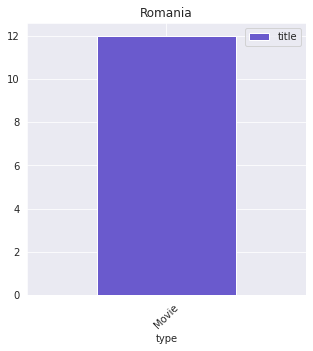

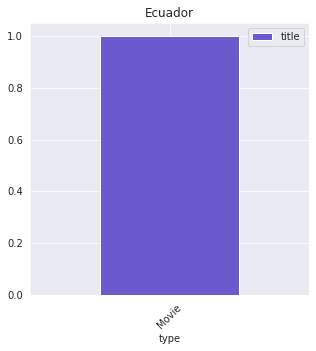

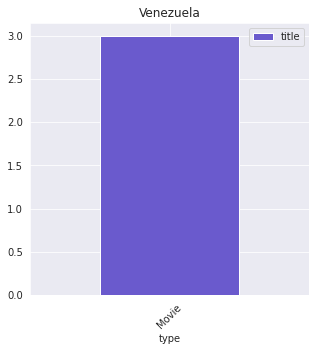

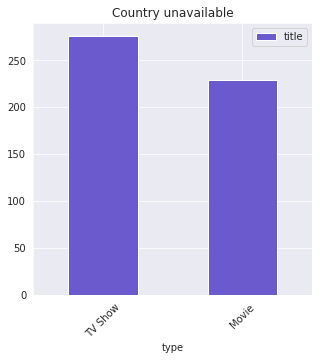

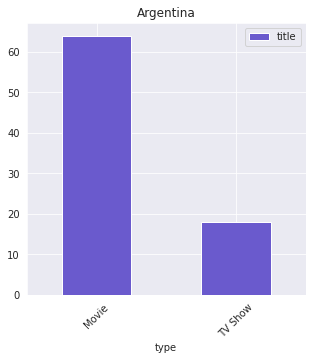

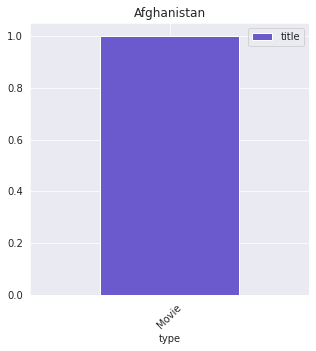

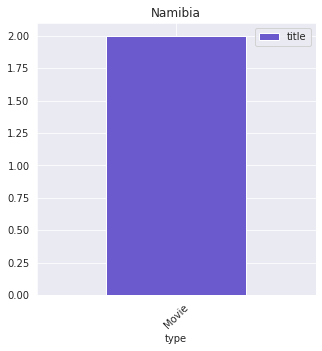

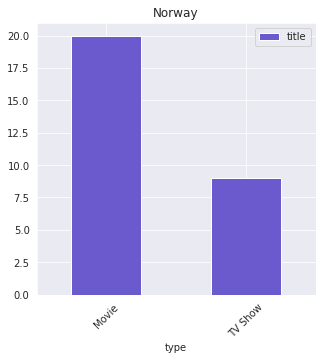

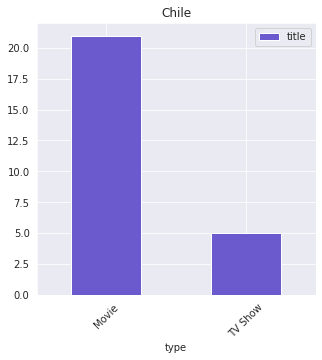

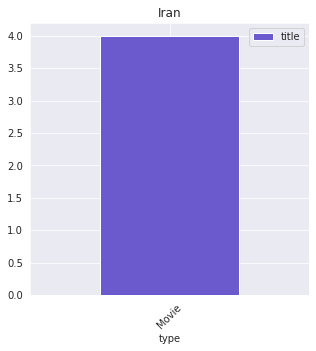

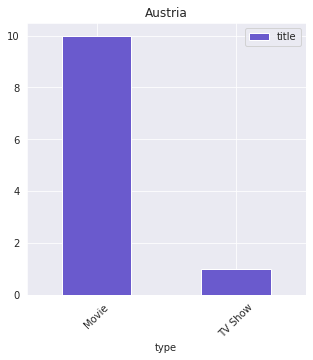

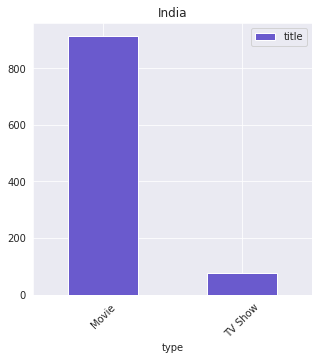

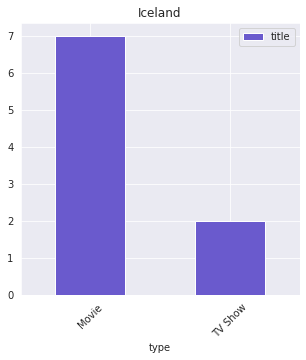

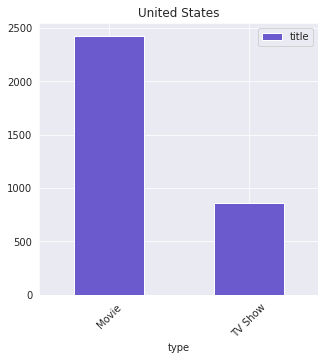

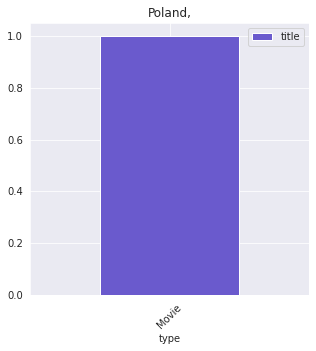

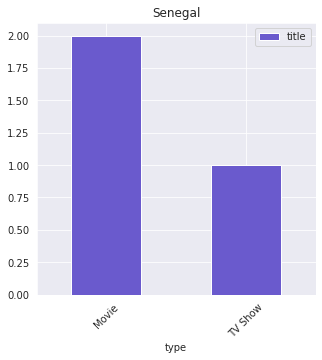

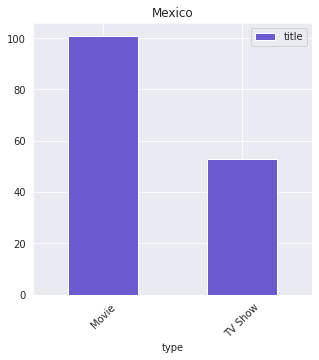

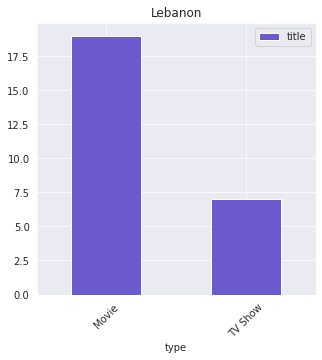

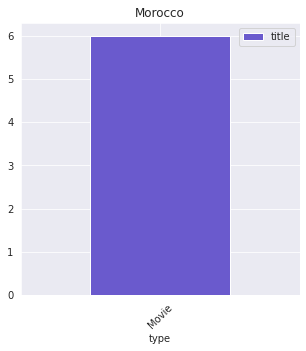

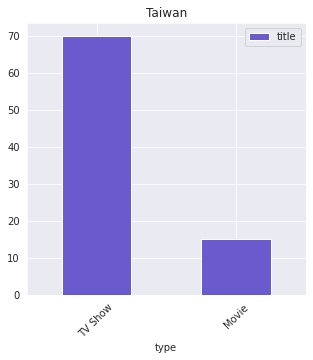

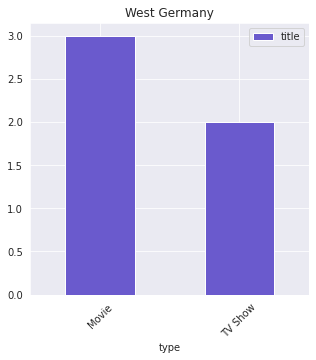

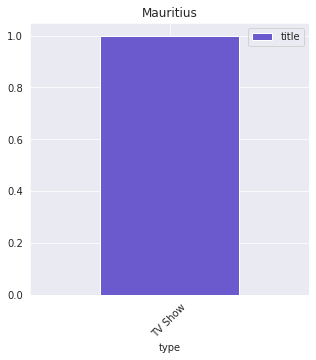

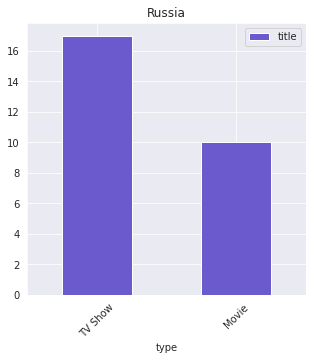

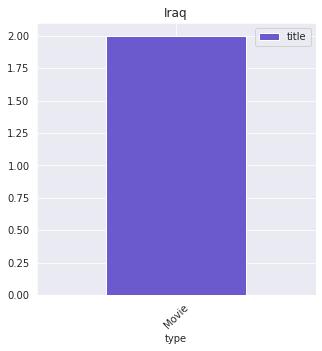

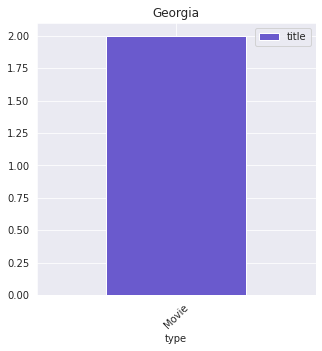

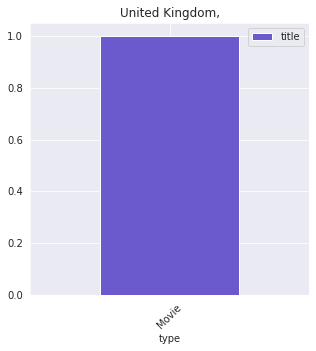

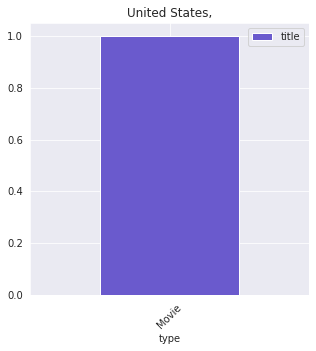

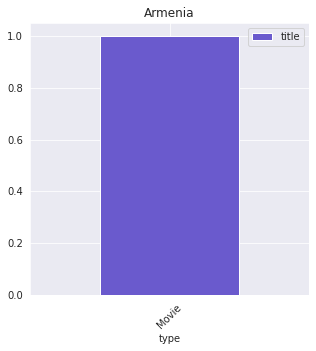

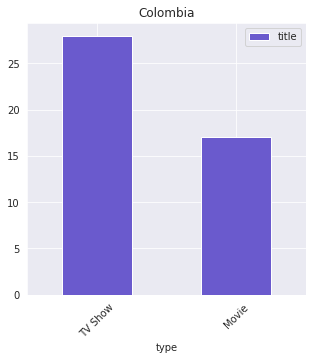

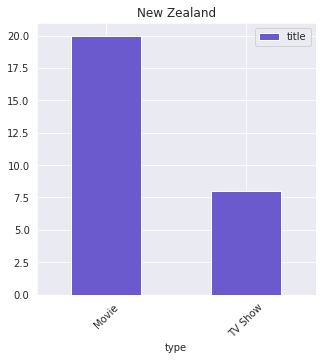

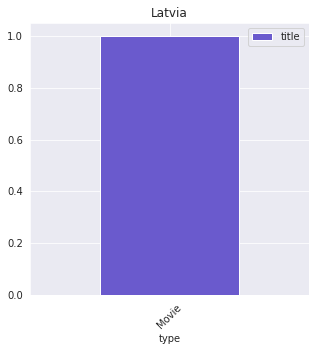

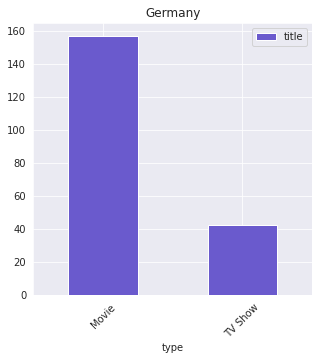

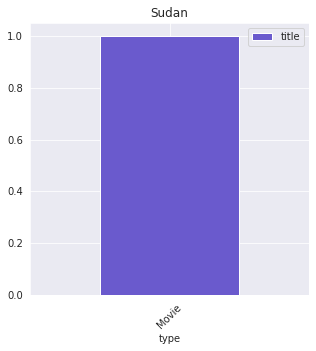

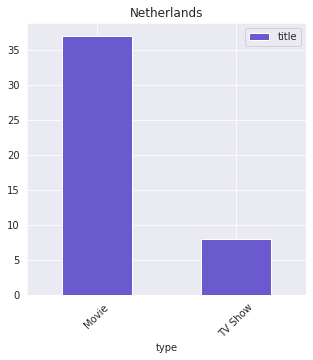

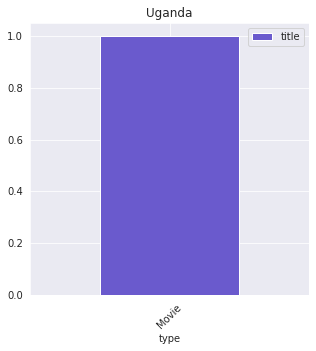

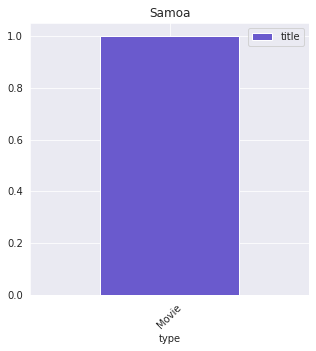

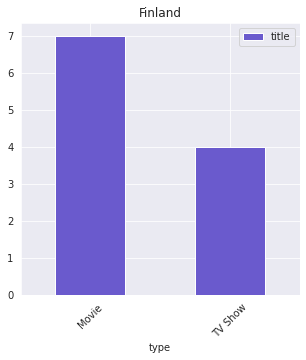

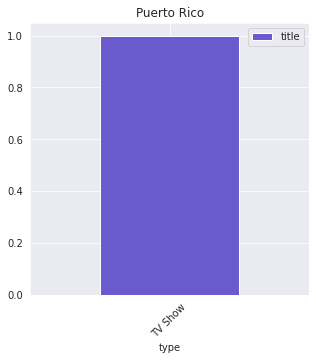

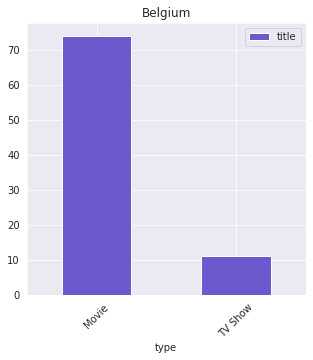

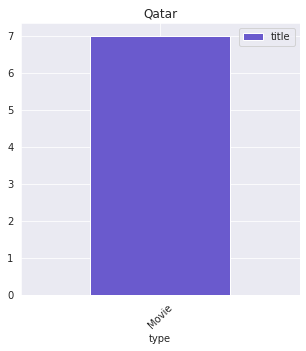

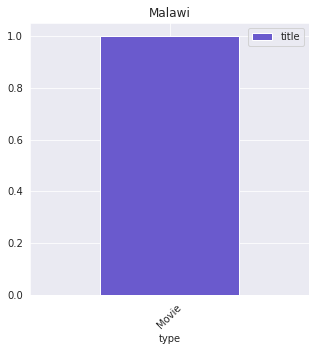

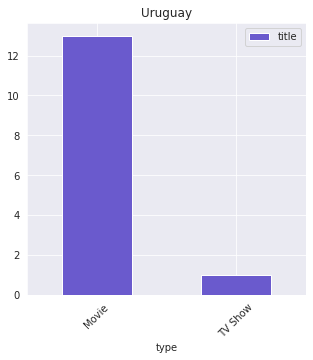

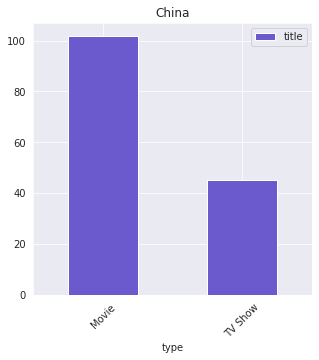

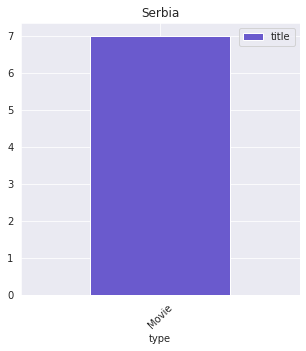

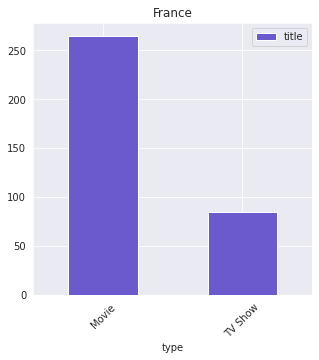

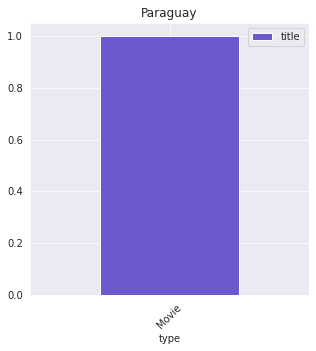

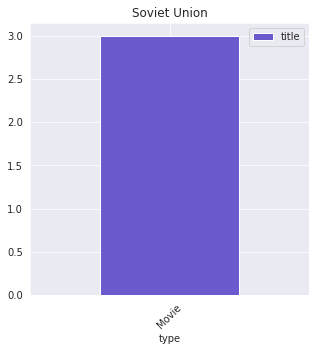

In [632]:
get_country_type_trends(Dataset)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [633]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [634]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [635]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [636]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [637]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [638]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [639]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [640]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [641]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [642]:
# Expand Contraction

#### 2. Lower Casing

In [643]:
# Lower Casing

#### 3. Removing Punctuations

In [644]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [645]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [646]:
# Remove Stopwords

In [647]:
# Remove White spaces

#### 6. Rephrase Text

In [648]:
# Rephrase Text

#### 7. Tokenization

In [649]:
# Tokenization

#### 8. Text Normalization

In [650]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [651]:
# POS Taging

#### 10. Text Vectorization

In [652]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [653]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [654]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [655]:
# Transform Your data

### 6. Data Scaling

In [656]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [657]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [658]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [659]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [660]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [661]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [662]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [663]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [664]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [665]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [666]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [667]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [668]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [669]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***